### Controller Demo

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

We want a notebook that does the following:
1. create a list of chemical
2. create a new mass spec object, takes chemicals
3. create a new controller, takes mass spec
4. write mzml files

Load densities trained on 4 beer data (see [loader_kde](loader_kde.ipynb)).

In [6]:
ps = load_obj('../models/peak_sampler_4_beers.p')

c:\users\vinny\.virtualenvs\simulator-r22bo2kk\lib\site-packages\sklearn\base.py:251: UserWarning:

Trying to unpickle estimator KernelDensity from version 0.20.0 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.



Load chromatogram data exported from R

In [7]:
xcms_output = '../models/beer_ms1_peaks.csv.gz'
chromatograms = ChromatogramCreator(xcms_output)

0


../codes\VMSfunctions\Common.py:49: RuntimeWarning:

divide by zero encountered in double_scalars



5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000


Generate some chemicals

In [8]:
chemicals = ChemicalCreator(ps, chromatograms)

In [9]:
min_ms1_intensity = 2E5
min_rt = 3*60
max_rt = 21*60
dataset = chemicals.sample(min_rt, max_rt, min_ms1_intensity, 100, 2, "Unknown","Empirical",None, False)

Plot some chemicals

UnknownChemical mz=261.8989 rt=874.71 max_intensity=1.00


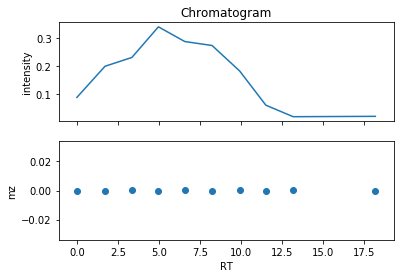

UnknownChemical mz=128.3444 rt=211.73 max_intensity=1.00


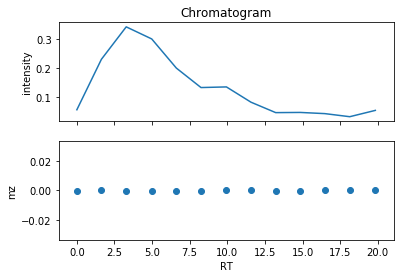

In [11]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in dataset[0:2]:
    print(chem)
    plot_chromatogram(chem.chromatogram)

Set up a simple controller

In [16]:
sampled_chemicals = chemicals.sample(min_rt, max_rt, min_ms1_intensity, 1000, 2, "Unknown", "Empirical",None, False)
initial_scan_parameters = {
    'isolation_windows': [[(0, 1e3)]], # TODO: change to dictionary?
    'ms_level': 1
}    

Acquisition open
Scan 182 -- num_peaks=1 rt=182.00 ms_level=1
Scan 183 -- num_peaks=2 rt=183.00 ms_level=1
Scan 184 -- num_peaks=2 rt=184.00 ms_level=1
Scan 185 -- num_peaks=8 rt=185.00 ms_level=2


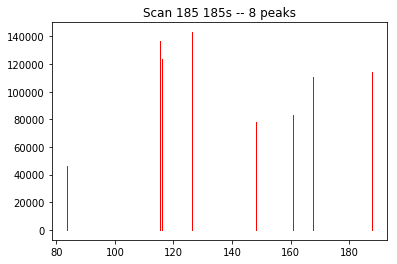

83.68538814889415 45974.926699037525
115.27066494318295 136652.53917176658
115.92377358277786 123985.7700527119
126.42103393005806 142988.80995312834
148.32180719336176 77790.5878246625
160.883098533349 82844.21650425498
167.57133633705172 110957.80139696228
187.66514095376183 114316.74083285026
Scan 186 -- num_peaks=26 rt=186.00 ms_level=2


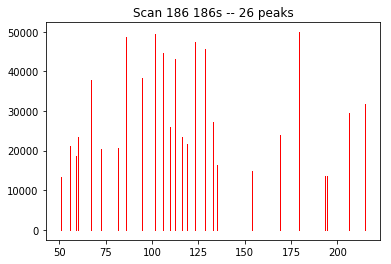

50.71358469964394 13245.426747099275
55.832917063417256 21229.097169939476
59.13554651847457 18545.238863707913
59.74393083834853 23330.288586114486
66.93138843960395 37910.35690256624
72.39049583483117 20379.154886237888
81.3597315359706 20777.564379764946
85.95332013582448 48557.21237294784
94.81341429995696 38282.62033241217
101.51027729935042 49411.27686295045
105.93708513651991 44569.06503987457
109.49222284845045 26000.589642103325
112.16964811782292 43002.74897673244
116.31016691778049 23430.938103721415
119.08570807972126 21777.0989635286
122.9914592289258 47341.764662841844
128.61608982125065 45704.24304822198
132.94818158350012 27221.799335811436
135.04072636661465 16410.563927202747
153.754051488185 14883.216359281872
168.88558593740646 23961.95364230269
179.5666618049282 49878.24780689781
193.2878892630177 13689.473795028924
194.16010532969 13559.27282784202
206.31628786544198 29599.393631120172
215.02689842984904 31656.96524486407
Scan 187 -- num_peaks=3 rt=187.00 ms_level

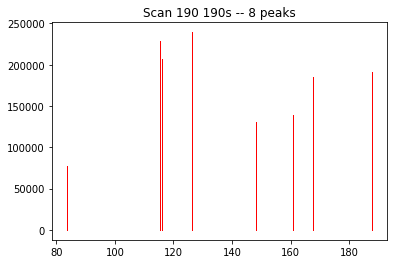

83.68538814889415 76957.69044314533
115.27066494318295 228743.46003189523
115.92377358277786 207540.4833929045
126.42103393005806 239349.7796144818
148.32180719336176 130214.10597107085
160.883098533349 138673.4036679353
167.57133633705172 185732.89280172327
187.66514095376183 191355.44056599739
Scan 191 -- num_peaks=11 rt=191.00 ms_level=2


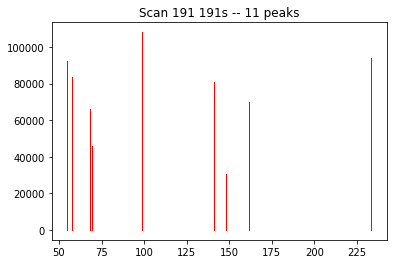

54.73972268668502 78035.99902148463
54.791018455509175 92414.17225370918
57.814638844062095 83441.70762040158
68.0670091562242 65823.89166213428
68.43424263148445 65921.02732496662
69.27641370673459 45700.81725996586
99.04303490468115 108011.4656495703
140.97937343940214 80693.54545697034
148.23771463983056 30305.286041316045
161.35759975245736 69719.10225291888
233.55089596632578 93737.63006433843
Scan 192 -- num_peaks=26 rt=192.00 ms_level=2


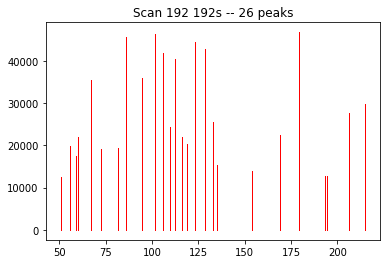

50.71358469964394 12419.053518423621
55.832917063417256 19904.628135822928
59.13554651847457 17388.213936616023
59.74393083834853 21874.727638705648
66.93138843960395 35545.15534039831
72.39049583483117 19107.713177143105
81.3597315359706 19481.266171458232
85.95332013582448 45527.76068896115
94.81341429995696 35894.1935062861
101.51027729935042 46328.54067227504
105.93708513651991 41788.431174369085
109.49222284845045 24378.43041535579
112.16964811782292 40319.83651250297
116.31016691778049 21969.097700888637
119.08570807972126 20418.44046763518
122.9914592289258 44388.143940564754
128.61608982125065 42852.78619348475
132.94818158350012 25523.449661089046
135.04072636661465 15386.719927621485
153.754051488185 13954.662542879427
168.88558593740646 22466.983538670316
179.5666618049282 46766.37761442574
193.2878892630177 12835.396770946158
194.16010532969 12713.318954163185
206.31628786544198 27752.70745416124
215.02689842984904 29681.90856462533
Scan 193 -- num_peaks=18 rt=193.00 ms_lev

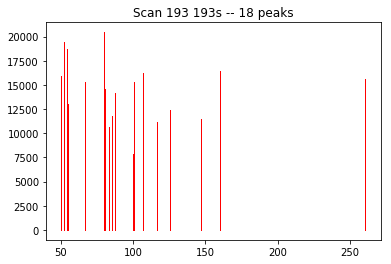

50.26264106939043 15923.66468443561
52.13278704473565 19470.65753089175
54.40119006486677 18726.0496035145
55.2914184160848 12988.307624997267
66.94660172107389 15285.995069827375
79.7269902572625 20447.20672792354
80.79399938453263 14567.129724661221
83.1746250434635 10607.443861420084
85.69333637863528 11762.644963084123
87.60809910538542 14164.178460155297
99.88734150421517 7874.216453778904
100.53177527626704 15312.42699265283
106.99410241223016 16233.282530505721
116.87415677044648 11167.379934465393
125.79058524897684 12396.361777045207
147.22849448266095 11517.327257508208
159.96428805501847 16419.40208708432
260.59504285437976 15606.810995531261
Scan 194 -- num_peaks=7 rt=194.00 ms_level=1
Scan 195 -- num_peaks=8 rt=195.00 ms_level=2


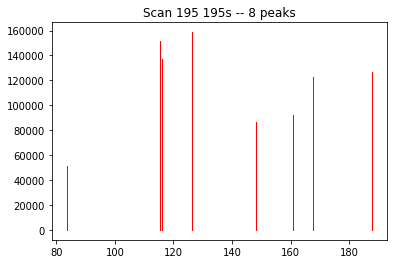

83.68538814889415 51013.3670866056
115.27066494318295 151628.43411846086
115.92377358277786 137573.5004999339
126.42103393005806 158659.10345363367
148.32180719336176 86315.73985011742
160.883098533349 91923.20099168886
167.57133633705172 123117.78310903569
187.66514095376183 126844.83223705999
Scan 196 -- num_peaks=11 rt=196.00 ms_level=2


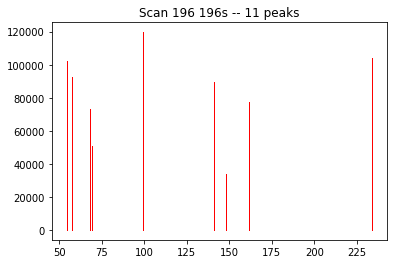

54.73972268668502 86439.5332827301
54.791018455509175 102366.06205452883
57.814638844062095 92427.3713858109
68.0670091562242 72912.32950783883
68.43424263148445 73019.92550796212
69.27641370673459 50622.243120167965
99.04303490468115 119642.99550214004
140.97937343940214 89383.2653607589
148.23771463983056 33568.79919855682
161.35759975245736 77227.00721719537
233.55089596632578 103832.0402813044
Scan 197 -- num_peaks=7 rt=197.00 ms_level=2


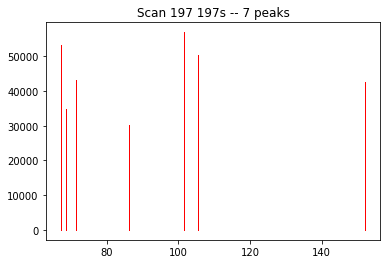

67.18908087490725 53330.78943367682
68.5825496096273 34786.05607237655
71.38270368226794 43189.14133881648
86.29134794365281 30170.094564094114
101.65344750804157 56932.918439755005
105.55699270416937 50465.281321003546
152.13414270204592 42552.61367231717
Scan 199 -- num_peaks=18 rt=199.00 ms_level=2


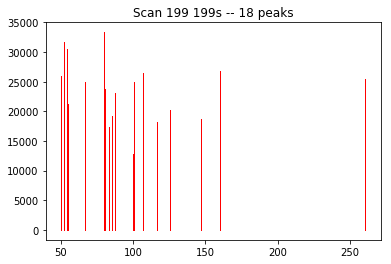

50.26264106939043 25974.91861351157
52.13278704473565 31760.826087402307
54.40119006486677 30546.21056416133
55.2914184160848 21186.720530250437
66.94660172107389 24934.742456201006
79.7269902572625 33353.78765860296
80.79399938453263 23762.118615847474
83.1746250434635 17303.020156351984
85.69333637863528 19187.40137089059
87.60809910538542 23104.818521417365
99.88734150421517 12844.538966711485
100.53177527626704 24977.85860174889
106.99410241223016 26479.97184794841
116.87415677044648 18216.396204789962
125.79058524897684 20221.12966100853
147.22849448266095 18787.235481752265
159.96428805501847 26783.57283618307
260.59504285437976 25458.062164648647
Scan 205 -- num_peaks=9 rt=205.00 ms_level=1
Scan 206 -- num_peaks=9 rt=206.00 ms_level=1
Scan 207 -- num_peaks=8 rt=207.00 ms_level=1
Scan 208 -- num_peaks=8 rt=208.00 ms_level=1
Scan 209 -- num_peaks=8 rt=209.00 ms_level=1
Scan 210 -- num_peaks=28 rt=210.00 ms_level=2


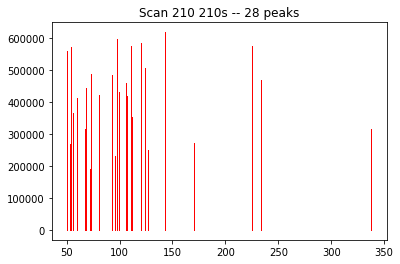

50.41732159723138 557944.6389284197
53.054274676913764 268228.99315984146
54.0949114166766 571994.3480601063
54.576620696539564 561400.1043478927
55.64605302366071 366087.4024428775
59.77860688972361 411308.39468022354
67.40816881364134 316711.8056449138
67.8960711856705 444553.1607747373
72.5477812281733 190892.17587313993
72.81878942734446 487221.54964577657
80.47297968504465 422242.59283974575
92.7870099563145 485472.40129274153
95.2476898710071 232139.8248511781
97.76622679017083 595285.79641662
99.12265597547454 431416.2821449969
106.41998371594285 459264.00081552466
107.10285964605787 418712.1008561664
111.25400292247224 575902.5906675941
111.62257924546037 352133.2263505162
111.77986767787462 165181.2508835256
120.4535847065527 583677.3349164939
124.44406163959803 506873.53068947943
126.45091974673991 250631.94492016078
143.34081415266027 617818.8854168387
170.3721576253094 271720.5088918934
225.2379493607001 574167.3881275894
233.5172166227771 468583.76076185727
337.91982889598

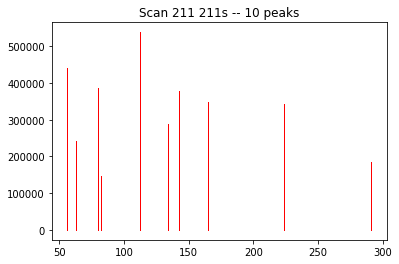

55.92326725424103 440578.33210811135
62.97084862701045 241958.47640587235
79.7033251277561 385919.8737522257
81.95134008390804 145525.3241554316
112.29643143710469 538173.378168935
133.76599708175854 287857.04907088616
142.80359234879535 378116.6046128081
164.55282008042394 349403.8015227387
223.63542244061097 343078.1196584846
291.2396904558377 185202.83767593594
Scan 212 -- num_peaks=17 rt=212.00 ms_level=2


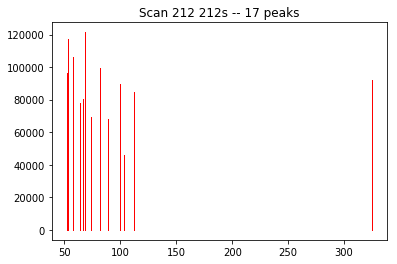

52.40857345451955 96129.55570792675
53.438662907070636 117537.90766373009
53.51316546852591 106609.54892315151
57.26917980914553 106409.49739040552
64.21401133350248 77816.16197256392
66.65590326502554 80223.34427030606
66.97969330729369 32915.36325052732
68.2221264400771 121401.27402108547
68.63431700039868 114128.1059231837
73.81489262972899 69382.63671299831
81.96230291740241 98780.20159920317
81.98072390847504 99473.67541654753
88.56755482932789 68372.81985189227
99.25768249507591 89503.70259556496
103.57324880357164 46165.63510879345
112.14391428445612 84647.53115915667
324.500970291974 92243.27114671638
Scan 213 -- num_peaks=5 rt=213.00 ms_level=2


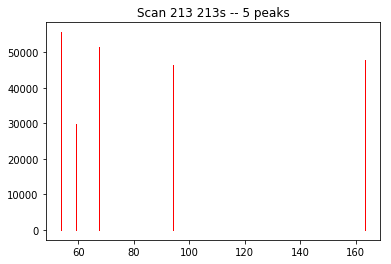

53.72989853881908 55599.675751274015
59.385031505858485 29680.97643347448
67.63049496713329 51402.01456074465
94.13953056581717 46415.913578304004
163.4454737002824 47766.67571700097
Scan 214 -- num_peaks=1 rt=214.00 ms_level=2


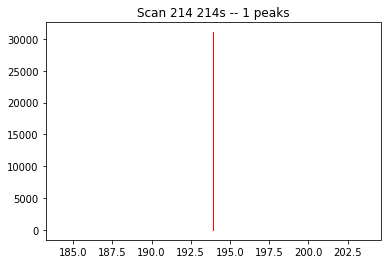

193.92430372359425 31047.988547986315
Scan 216 -- num_peaks=13 rt=216.00 ms_level=1
Scan 217 -- num_peaks=12 rt=217.00 ms_level=1
Scan 218 -- num_peaks=12 rt=218.00 ms_level=1
Scan 219 -- num_peaks=11 rt=219.00 ms_level=1
Scan 220 -- num_peaks=10 rt=220.00 ms_level=2


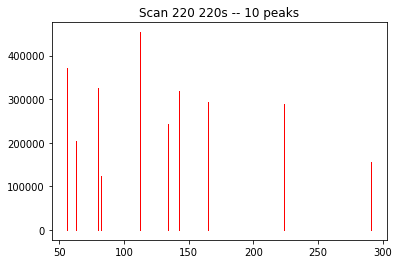

55.92326725424103 371259.03179780825
62.97084862701045 203889.44062658589
79.7033251277561 325200.3746875728
81.95134008390804 122628.79722089956
112.29643143710469 453498.760055513
133.76599708175854 242566.46672312336
142.80359234879535 318624.8489877592
164.55282008042394 294429.6339747692
223.63542244061097 289099.2163095454
291.2396904558377 156063.5673406253
Scan 222 -- num_peaks=11 rt=222.00 ms_level=2


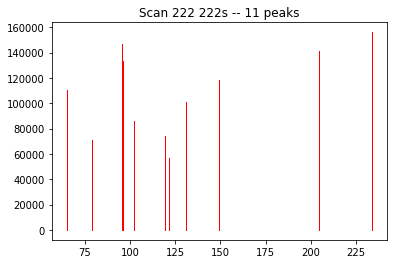

65.36343820482142 110378.78532915062
79.13637355278306 70791.36147520857
95.39214828042995 146678.69870629662
96.17167995229514 133321.5181086237
102.46920879995909 85771.94451432994
119.31072929077762 74405.19651852935
121.45572633242482 56971.01541151533
130.8464587276127 100980.21503428435
149.08401863907923 118323.71087414965
204.68316390453572 141604.30387615447
233.507440616181 156045.11322718774
Scan 223 -- num_peaks=1 rt=223.00 ms_level=2


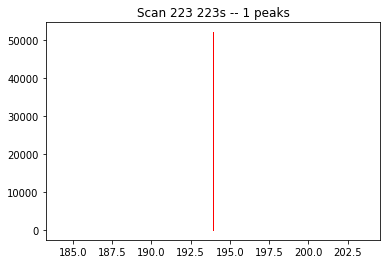

193.92430372359425 51979.62820625181
Scan 224 -- num_peaks=18 rt=224.00 ms_level=2


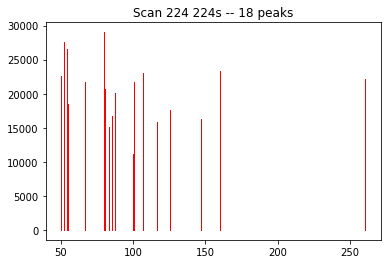

50.26264106939043 22601.95254489456
52.13278704473565 27636.532560325453
54.40119006486677 26579.640609091213
55.2914184160848 18435.524635583297
66.94660172107389 21696.848182656646
79.7269902572625 29022.640535246668
80.79399938453263 20676.495095625378
83.1746250434635 15056.141128919247
85.69333637863528 16695.82652779236
87.60809910538542 20104.54852812637
99.88734150421517 11176.61481471008
100.53177527626704 21734.365492723795
106.99410241223016 23041.42222744629
116.87415677044648 15850.91097630964
125.79058524897684 17595.320308897302
147.22849448266095 16347.624072532875
159.96428805501847 23305.599191030444
260.59504285437976 22152.21235115067
Scan 230 -- num_peaks=11 rt=230.00 ms_level=1
Scan 231 -- num_peaks=11 rt=231.00 ms_level=1
Scan 232 -- num_peaks=13 rt=232.00 ms_level=1
Scan 233 -- num_peaks=13 rt=233.00 ms_level=1
Scan 234 -- num_peaks=14 rt=234.00 ms_level=1
Scan 236 -- num_peaks=1 rt=236.00 ms_level=2


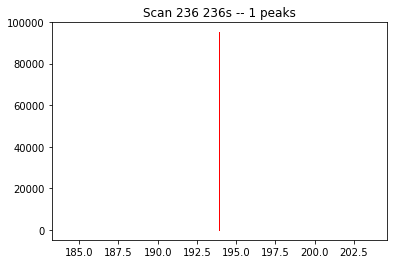

193.92430372359425 95057.82668099152
Scan 237 -- num_peaks=7 rt=237.00 ms_level=2


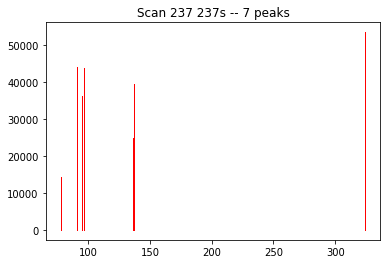

77.8807261765838 14441.999647904871
91.06221930288737 44155.6937385916
94.68025792820657 36365.65096363416
96.72254436357468 43923.552551523295
136.3246270460703 24842.07273263061
136.74641437620653 39532.79601037608
324.18440810696296 53485.482187393405
Scan 238 -- num_peaks=9 rt=238.00 ms_level=2


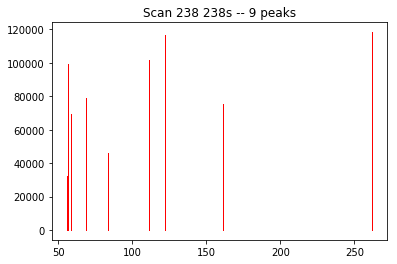

55.88955640860909 31994.164013816902
56.594600427888565 99509.42668684764
58.745122004951526 69363.04597051999
68.39879226377425 78934.88377696117
83.1852066030109 45748.44471525896
111.19618696560605 101499.67142770716
122.11587952233099 116430.02431097162
161.20882030891164 75532.56193736856
261.51706238037315 118326.02540029678
Scan 239 -- num_peaks=3 rt=239.00 ms_level=2


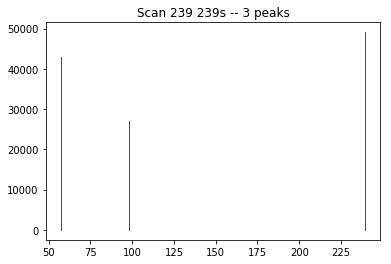

57.24836443007546 42865.399010586705
97.83912774884838 26970.6881128155
239.4510942451183 49101.048973501674
Scan 243 -- num_peaks=13 rt=243.00 ms_level=1
Scan 244 -- num_peaks=15 rt=244.00 ms_level=1
Scan 245 -- num_peaks=21 rt=245.00 ms_level=2


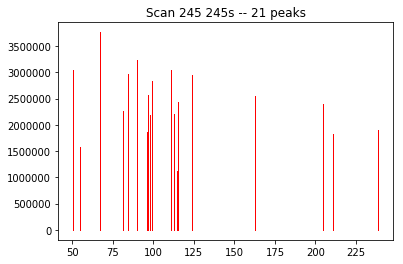

50.7426758330649 3047752.8113927287
55.005381127425714 1579181.003956046
67.16931804374958 3760841.0745955235
81.34057674005942 2269083.786844411
84.48420572453054 2968216.639829904
89.94146585214908 3227402.6890029465
95.82566609009803 1209932.629829957
96.28594747150427 1868947.0985262438
96.45937854141897 2477054.548935811
96.94341592059631 2559905.652876436
98.110380794319 2192366.925047287
98.91430973965377 2836705.982538237
110.7069940319122 3043760.827299698
112.54791966289032 2196998.0481368676
114.68736418034207 1112659.537768518
115.14706238887584 2433058.2906918107
123.88770587389587 2952239.300131031
162.46640909818183 2543816.255180603
204.6329998734999 2401478.7811682457
210.56060139099202 1832030.9282352906
238.4117905737523 1894468.038849072
Scan 246 -- num_peaks=18 rt=246.00 ms_level=2


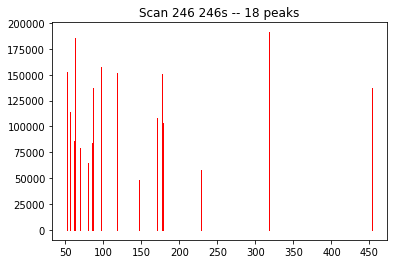

52.544342742149546 152245.5632854673
55.75732265002652 61021.01972974784
56.2872185515522 114258.39328142138
61.981544424485165 85660.89267187694
62.85602926693677 185536.59265392946
68.7520508791292 78877.49947749158
79.59846259582699 64399.607402775415
84.43070015315557 84128.3609648854
86.549890848462 136822.11783879375
96.48069616831675 157395.1239924338
118.02103973842685 152063.34828515863
146.8246189681267 48314.52075591574
170.58836891214645 108471.40313734942
176.7352347579601 150409.25475063227
178.10810257301074 103491.4527177042
227.83461175313406 58347.34059466566
318.41044585074616 190991.96357866476
452.88601750409765 137058.37414493228
Scan 247 -- num_peaks=9 rt=247.00 ms_level=2


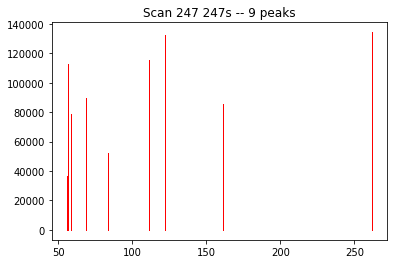

55.88955640860909 36333.29802213182
56.594600427888565 113005.16101196868
58.745122004951526 78770.24759519805
68.39879226377425 89640.24361980885
83.1852066030109 51952.971022174424
111.19618696560605 115265.32806229075
122.11587952233099 132220.5752957854
161.20882030891164 85776.48980171437
261.51706238037315 134373.71711874375
Scan 248 -- num_peaks=8 rt=248.00 ms_level=2


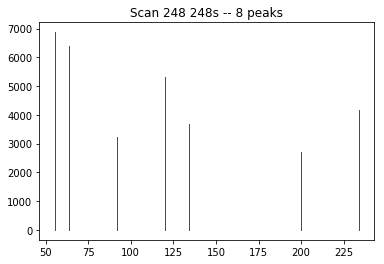

55.23677546672945 6873.007044452022
55.788366461115764 6372.674196139543
63.964431099799235 6388.817036119274
91.84011666188363 3216.3670788868944
120.05833690927541 5324.293913773352
134.1151371297442 3688.403918304502
199.78870397316626 2696.5976090162444
233.94388509830205 4170.336153976368
Scan 249 -- num_peaks=1 rt=249.00 ms_level=2


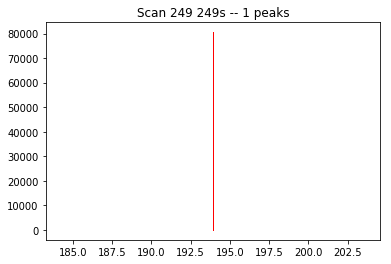

193.92430372359425 80530.97740559358
Scan 251 -- num_peaks=15 rt=251.00 ms_level=1
Scan 252 -- num_peaks=16 rt=252.00 ms_level=1
Scan 253 -- num_peaks=18 rt=253.00 ms_level=1
Scan 254 -- num_peaks=18 rt=254.00 ms_level=1
Scan 256 -- num_peaks=23 rt=256.00 ms_level=2


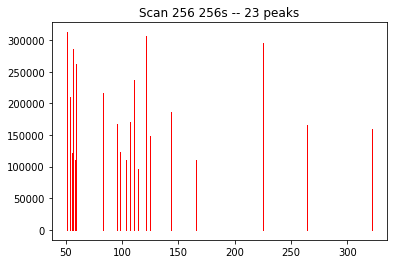

51.211769413947884 312332.04665737366
53.47043036464739 209628.80772673243
55.4277554026861 121918.90340752399
56.40305279289795 285946.3376665552
57.72764619084406 105949.86548704543
57.90118254894932 109747.96493914968
59.13292132370911 261489.62376577492
83.08201593732163 216085.59548930152
95.63247399865388 166951.1385378223
95.76646061054667 164910.50573744814
97.96791332881008 81895.73103310983
98.12565371537863 123738.03326723336
103.80394734883392 110230.88303203507
107.38875817101032 169926.5312957023
110.75976954953757 236445.16509724208
114.43621952726451 96990.30686456551
121.56598576607878 306130.98170092393
124.56468987277677 148474.3380830137
143.81997919973958 186881.85246009752
166.05000721849083 110447.56928473302
225.65138314674212 295871.262266089
263.9734754826599 166282.3819808032
321.648981997052 158985.42882999155
Scan 257 -- num_peaks=14 rt=257.00 ms_level=2


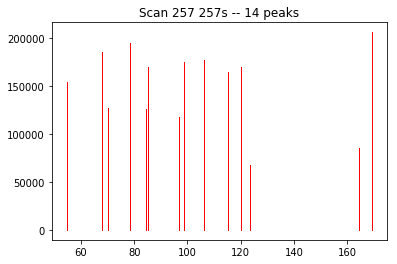

54.81765237469777 154530.21135985997
68.02743606688232 186336.59035755257
70.04016030283196 127593.42419833553
78.42239255793189 195743.24447926
84.44612481615393 126182.14765590732
85.19060959552341 170006.02584550943
96.73293470738552 118460.69456762966
98.50842616653416 175838.4101363954
106.09235175581608 177660.9875923335
115.03504122771727 165345.48915784867
120.24447073513194 170239.50589155682
123.55697588963505 67957.4686384521
164.21777425857428 85394.3723030239
169.10164349808716 206534.1706652582
Scan 258 -- num_peaks=1 rt=258.00 ms_level=2


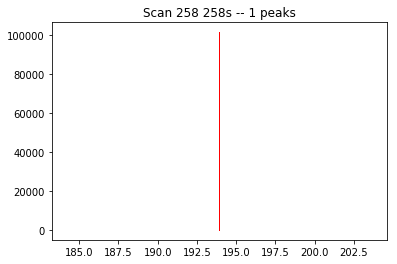

193.92430372359425 101279.65496380246
Scan 259 -- num_peaks=1 rt=259.00 ms_level=2


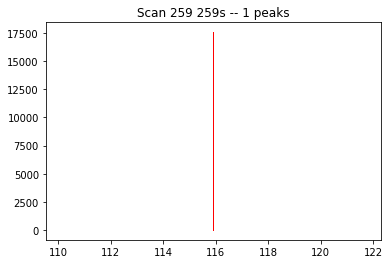

115.90533338488879 17573.95468265658
Scan 261 -- num_peaks=19 rt=261.00 ms_level=1
Scan 262 -- num_peaks=19 rt=262.00 ms_level=1
Scan 263 -- num_peaks=16 rt=263.00 ms_level=1
Scan 264 -- num_peaks=15 rt=264.00 ms_level=1
Scan 265 -- num_peaks=4 rt=265.00 ms_level=2


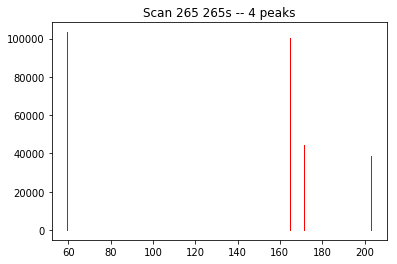

59.42506425320176 103350.24121962486
165.00007136775733 100116.47033473957
171.28485569750418 44622.26639944955
203.25834686164646 38578.44180469573
Scan 266 -- num_peaks=23 rt=266.00 ms_level=2


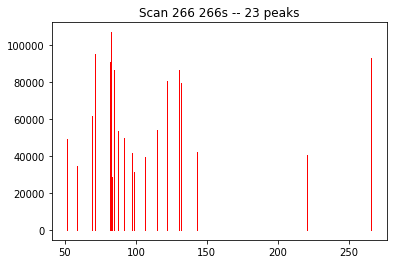

51.5178892267994 48903.3823777108
58.503924615141976 34289.68646477006
69.28654734445514 61382.81864287907
70.93115310255955 95036.04223138299
81.88813577888446 90944.00737804356
82.39869814108222 106874.65856845783
83.12748766497009 28698.897792620366
84.8257686412683 86547.75818535942
87.6753418409773 53648.213325251956
91.39597629569782 49692.29702920704
97.09105898047981 35215.32770599079
97.59111056704519 41425.31840981463
98.67968517470321 31110.67325305436
106.34433964319449 39619.5632676151
114.78714796049421 53950.469058762974
122.17134141703215 80779.15641909213
122.26998258058438 46411.46767271478
130.6446654789695 86684.29550198858
131.44830107661022 79653.72590989016
131.77056495627227 65736.51202099916
142.92631660754893 42230.062557694306
220.33210579029245 40373.81898816879
265.924536869982 92991.70419015283
Scan 267 -- num_peaks=23 rt=267.00 ms_level=2


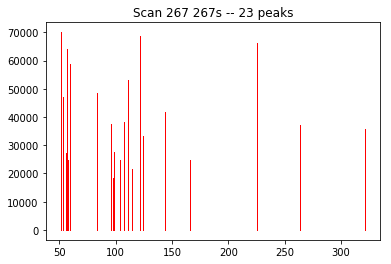

51.211769413947884 70062.7739726909
53.47043036464739 47024.23568476941
55.4277554026861 27349.023783685523
56.40305279289795 64143.89377798301
57.72764619084406 23766.826227085847
57.90118254894932 24618.821359466536
59.13292132370911 58657.72853658899
83.08201593732163 48472.631603279726
95.63247399865388 37450.719543647894
95.76646061054667 36992.96185856887
97.96791332881008 18370.96818628874
98.12565371537863 27757.093610499054
103.80394734883392 24727.15024070449
107.38875817101032 38118.16392697758
110.75976954953757 53039.71954346542
114.43621952726451 21757.005149229873
121.56598576607878 68671.7421618876
124.56468987277677 33305.9770881167
143.81997919973958 41921.60595954801
166.05000721849083 24775.75761259681
225.65138314674212 66370.26714041914
263.9734754826599 37300.703110820614
321.648981997052 35663.840083904055
Scan 268 -- num_peaks=6 rt=268.00 ms_level=2


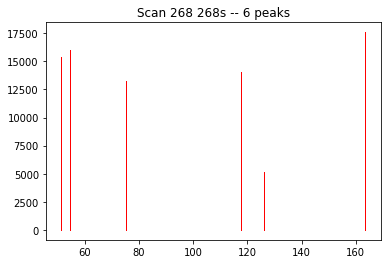

51.298425171372195 15366.197250131914
54.42002632241723 16044.815973109611
75.20417255735065 13235.080089525276
117.63949144454774 14046.065868124526
126.27914906408019 5171.177803480746
163.51723448302542 17590.173479420377
Scan 269 -- num_peaks=1 rt=269.00 ms_level=2


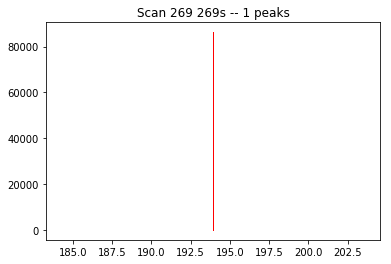

193.92430372359425 86257.32504046295
Scan 271 -- num_peaks=15 rt=271.00 ms_level=1
Scan 272 -- num_peaks=15 rt=272.00 ms_level=1
Scan 273 -- num_peaks=14 rt=273.00 ms_level=1
Scan 274 -- num_peaks=14 rt=274.00 ms_level=1
Scan 275 -- num_peaks=11 rt=275.00 ms_level=2


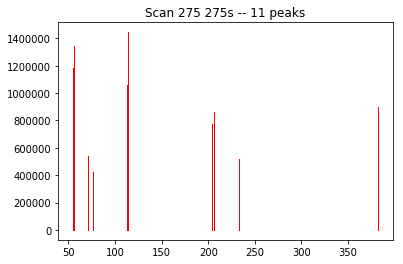

55.314697251749955 1180886.7027425002
55.53636469848715 1342939.1622981245
71.46743236314985 540923.9839243077
76.82828984214882 421780.9512605508
112.69090565558794 1060201.0299575832
113.75040282234076 563538.1180803212
114.32096748158695 1444863.0897713134
204.5475745754582 777721.7171979337
205.96164419165123 863912.6325889509
232.64310274881035 514828.59434049734
382.05531397035196 897813.3349327031
Scan 276 -- num_peaks=6 rt=276.00 ms_level=2


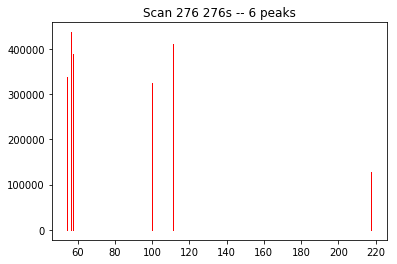

54.35094660146382 336699.7063355681
56.617159716958206 436484.7552695596
57.734632531627824 388581.06708419
99.73642342522311 324700.4533527906
111.09131373362756 410546.7856825937
217.76705147597656 126861.78918378038
Scan 277 -- num_peaks=7 rt=277.00 ms_level=2


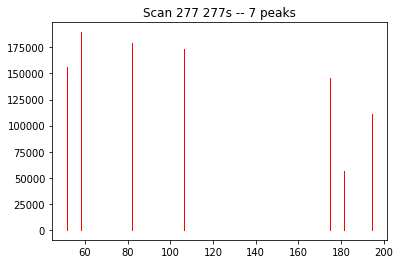

51.77118809889827 156304.30991625632
58.41149797257565 189551.25623744854
82.30482929912196 178857.37704317062
106.2305035917709 173384.06536717212
174.807717543781 145382.52473619505
181.5363260397171 56438.06610985055
194.36329294061423 110911.71705610484
Scan 279 -- num_peaks=5 rt=279.00 ms_level=2


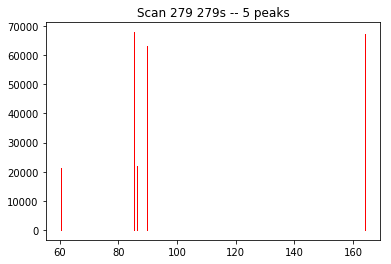

60.38046871269889 21119.298883340114
85.23337110203889 67906.27025673875
86.32790107896922 21877.56848141435
89.78632765555567 63120.636301332226
164.10200969008386 67412.16364367312
Scan 285 -- num_peaks=16 rt=285.00 ms_level=1
Scan 286 -- num_peaks=17 rt=286.00 ms_level=1
Scan 287 -- num_peaks=16 rt=287.00 ms_level=1
Scan 288 -- num_peaks=15 rt=288.00 ms_level=1
Scan 289 -- num_peaks=15 rt=289.00 ms_level=1
Scan 290 -- num_peaks=3 rt=290.00 ms_level=2


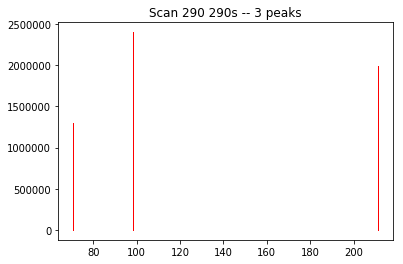

70.87131547032722 1302410.0759665312
98.46958815958129 2399621.881294595
211.13233028799672 1989546.5757109132
Scan 291 -- num_peaks=1 rt=291.00 ms_level=2


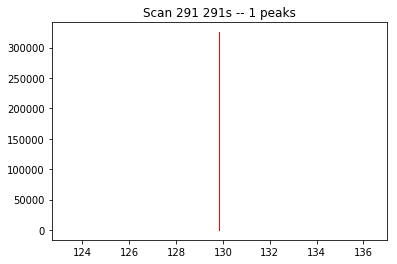

129.8516926536956 325112.8251193082
Scan 292 -- num_peaks=25 rt=292.00 ms_level=2


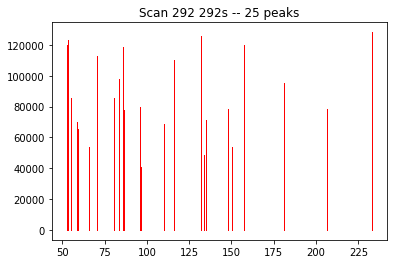

52.89142494179774 119762.23464218591
53.565014308165075 123300.95461001154
55.16830257439296 85653.07829833346
58.73252170016604 70128.15482629003
59.24466063292818 65223.48030814614
65.98576063232264 54043.49995771247
70.73682423809076 112864.13926131824
80.57814017826803 85505.19911456679
83.28231234649347 97674.34123439275
86.18795578989183 118902.34890745392
86.6489654625014 77961.85539425982
95.6887209326917 79449.41988385748
95.93737402526006 54215.12437014098
96.71165127942429 41098.63535894455
110.40921119305344 68833.85763080564
116.32621835517173 110016.8146431532
131.8015167845429 125754.31123175153
133.8497704128689 48670.06952080151
135.2200017714045 71304.86162270427
148.07287342831344 78364.29822222234
150.13898013646977 53816.641927902834
157.57689837407287 119998.9541868275
181.30222472567405 95285.36563185426
206.63695017702292 78227.18082055455
232.81348767324096 128217.44667541709
Scan 293 -- num_peaks=12 rt=293.00 ms_level=2


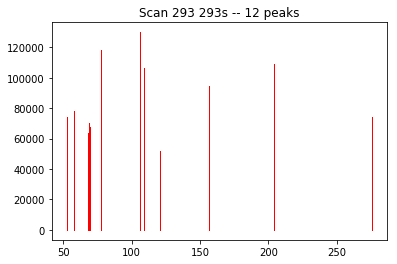

52.825518348899095 74434.67549757373
57.52458492580407 77858.10293877969
68.13370570797184 63639.578520562274
68.72396773599829 70539.62104235195
69.40078036251556 67860.89942547726
77.53827131770774 117957.15665909166
106.36987492579766 129957.61574353231
108.82327263804981 106553.36926012875
120.96599485091457 51647.29937170071
156.27142581084618 94756.10532660561
204.2426638104639 108916.80831129586
275.5293402307377 74393.32723613955
Scan 294 -- num_peaks=41 rt=294.00 ms_level=2


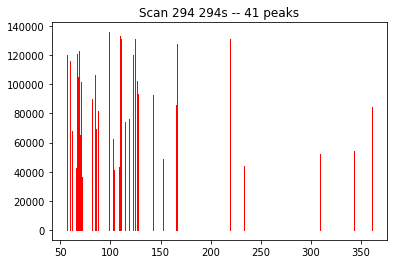

56.84795092985296 120053.15999073835
59.325989495122805 115913.62222473072
62.0180221423299 67725.29834332158
65.33446740360948 42797.678303662
67.14202274519172 120604.2347930743
67.9535513087758 104980.81892905619
68.85274408961142 123062.2546328146
69.79046083392673 65191.587315392244
70.53835722911256 101850.43849366547
70.61716848281665 70567.2337138313
70.7744463868363 50962.85149887795
70.96194502018776 49765.477511821686
71.16935270017235 36582.28709881667
81.4928525852411 90166.55841139016
85.08970555159847 106446.59257053585
85.54759631153226 69050.91330681014
87.46572037105723 81779.94686297083
98.58704350746028 135785.9639542276
102.33313603214992 51535.399412951265
102.69854948270095 62496.28777440253
103.35671744027923 41075.98403333639
108.91016719233369 43042.26939257597
109.33041915941673 133058.73882966017
110.5236254774666 131424.97220260577
114.24870896717732 73844.05666028008
118.91193578728017 76296.44603109571
122.56343722070052 119836.18349504482
122.87375953016

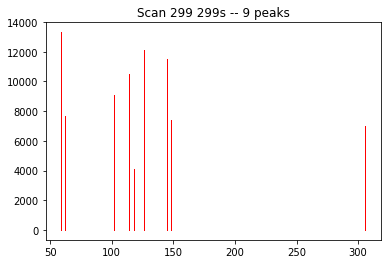

58.67659679079492 13311.36173609538
61.99506488541186 7665.192685064795
101.82275706642722 9093.592372463163
114.1077093232761 10466.055663145227
118.19129248124571 4100.511937031301
125.96411562106876 12115.060350904358
144.5402573699431 11516.370826667262
148.3070150601294 7405.728108774701
305.8273824453926 6987.599613219347
Scan 303 -- num_peaks=12 rt=303.00 ms_level=2


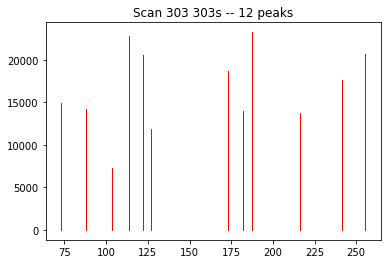

72.85188821050387 14925.779382679511
87.74153656754878 14211.176425087713
103.39686647319284 7280.43279734928
113.43602981913901 22854.425809890483
122.0493451326233 20534.53960031345
126.87253919384457 11812.323494068787
173.21650307212315 18660.5550722593
182.0317955610029 13970.319611085934
187.56388410775958 23242.745583597934
216.04586988492468 13692.960619366302
241.27931549004745 17647.149970835024
255.4467239243058 20730.070804257986
Scan 304 -- num_peaks=6 rt=304.00 ms_level=2


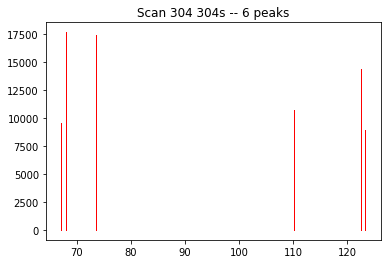

67.14066581679158 9526.544235397627
68.08277629289897 17628.56336112765
73.66283516582413 17396.70388125566
110.18448844701943 10650.338723600233
122.62185219851887 14350.173287356738
123.37725630873491 8940.981713474506
Scan 307 -- num_peaks=19 rt=307.00 ms_level=2


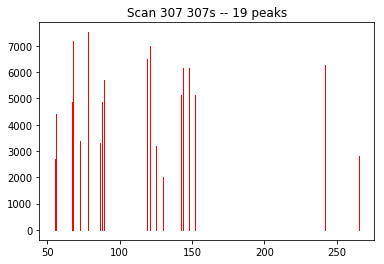

55.088857793279814 2685.8552901866497
56.00440942174552 4422.577446744917
67.16198956030756 4883.440028818568
67.73261487540672 7192.397602608241
72.36767407440934 3393.2662350713344
78.10654943181576 7519.537313220352
86.20036855188529 3314.1922891117906
87.60000815722658 4868.1977066253885
89.51717793405014 5691.5102506730655
119.0189699902959 6504.144314106536
121.14895138446133 7009.522424351978
125.2618091029732 3184.374815890785
129.85381316520787 1997.5863042144135
142.62778813096884 5148.895261590509
143.63957997108758 6156.130835419883
147.93342096460643 6170.659654024598
152.1344654858939 5127.911308791928
241.73185959664303 6272.54565598362
265.2777787831426 2803.558416630597
Scan 310 -- num_peaks=14 rt=310.00 ms_level=1
Scan 311 -- num_peaks=14 rt=311.00 ms_level=1
Scan 312 -- num_peaks=12 rt=312.00 ms_level=1
Scan 313 -- num_peaks=12 rt=313.00 ms_level=1
Scan 314 -- num_peaks=12 rt=314.00 ms_level=1
Scan 315 -- num_peaks=4 rt=315.00 ms_level=2


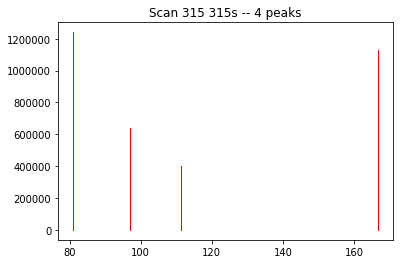

81.03374679225448 1240633.8042978577
97.03810650878671 639426.0785236815
111.4498705753246 400280.5935175424
166.71742372096483 1127749.923220793
Scan 316 -- num_peaks=13 rt=316.00 ms_level=2


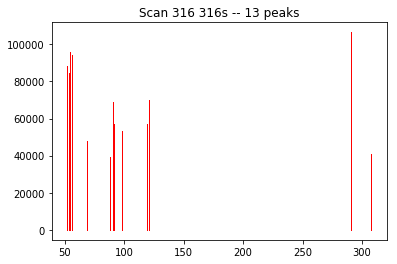

51.931406781589345 88319.65092639829
53.99435911825814 84400.47807487445
54.43558749542214 95685.80296135436
56.22071081126512 94137.72568837243
68.88494551678974 48017.09454917905
87.85366983261962 39474.421878376066
90.70810202189816 68865.77047733433
91.33407490677845 57311.40776408475
98.4827448107672 53151.04018807057
119.23930038673343 57074.83095927593
121.17324173072494 69780.22741646615
290.27062064415776 106476.46098500122
307.79064148632744 40828.283232917325
Scan 317 -- num_peaks=10 rt=317.00 ms_level=2


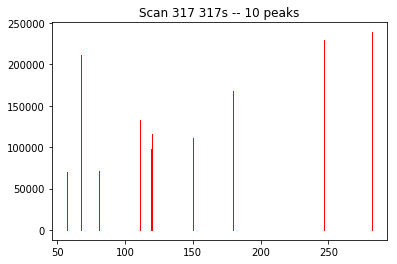

57.289866599528416 69848.55001322241
67.84382812599407 211010.63857022146
81.13017775547755 70796.62482239935
110.76631514350986 132599.3778176759
119.41015877921079 97692.1931236975
119.7363514853625 116097.95834632547
149.9478358373496 111318.75473458608
179.28096415433785 167484.87348440377
246.9797189359482 229003.33791038874
281.79677193165907 238812.72790071167
Scan 318 -- num_peaks=19 rt=318.00 ms_level=2


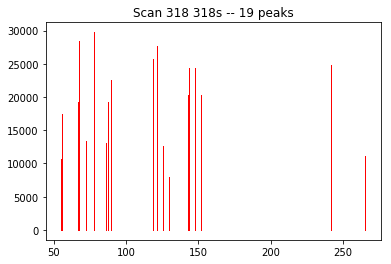

55.088857793279814 10627.216226865326
56.00440942174552 17498.96466065751
67.16198956030756 19322.475528299154
67.73261487540672 28458.407566400878
72.36767407440934 13426.253501884794
78.10654943181576 29752.812538169648
86.20036855188529 13113.378893675674
87.60000815722658 19262.165706568136
89.51717793405014 22519.794834933135
119.0189699902959 25735.172050890116
121.14895138446133 27734.81904361014
125.2618091029732 12599.725621667469
129.85381316520787 7903.918600631715
142.62778813096884 20372.811399903112
143.63957997108758 24358.175121316286
147.93342096460643 24415.661798799378
152.1344654858939 20289.783470401606
241.73185959664303 24818.797655472466
265.2777787831426 11092.936245314637
Scan 319 -- num_peaks=58 rt=319.00 ms_level=2


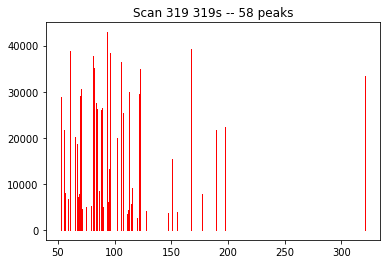

52.49268275453235 28944.864538741076
55.00973082254759 3377.329176038581
55.351987356799384 20022.899928976705
55.543705032426956 21757.95746978087
56.239088121950395 7950.430879453468
58.60222911046194 3422.8597671055795
59.14544105129708 6688.694567349911
60.86435470707675 38908.01012336483
64.80800712908459 20257.869953443198
66.95265920243766 18575.086429841922
67.73833208063434 7229.16305435531
68.15515772947504 4566.863737615741
68.36092613696711 6901.51616044025
68.67695531563965 7889.054264743556
69.06342123811868 29062.860314753976
69.090569396445 20102.249486324323
69.72523832179799 12841.182409859537
70.02609494685751 30664.65238583789
71.05751239034703 4549.785827275533
74.6585529921572 4944.768554477396
78.92950897352489 5271.278430993561
81.12449083460555 37701.87954896298
81.38336977567228 5703.361865713928
81.83872429839371 33412.86922290442
81.97911491185653 35198.49035890316
83.23484264972876 27548.521585573035
84.11862959780368 26224.950599594333
86.38937922069549 85

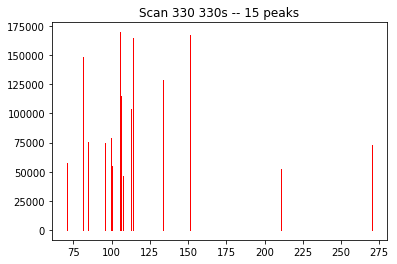

70.9623445133587 57626.62503983473
81.5611770420302 148717.4444725266
84.79248027353896 75905.23247472811
95.68726293144658 74838.40550898634
99.30764186800376 78921.52981485572
100.47127946172677 54875.94809266937
105.60328804044893 169789.27435538542
106.11177505100046 114674.40214328676
107.33258972457712 46504.78775802033
112.62990824963227 103849.83726107428
113.9459710247285 165045.6980215815
133.83206141380182 129174.19014312308
151.43610436091762 167039.1530363437
210.5464623244473 52387.80035302685
270.10212510651786 72555.34444796435
Scan 331 -- num_peaks=24 rt=331.00 ms_level=2


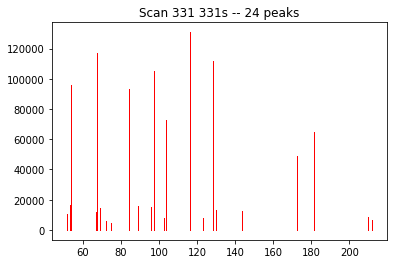

51.68250445027267 10289.168370505144
53.10406734170732 16204.358896693377
53.71468788121965 96027.57916034631
66.81059683506763 11802.585051103755
67.50589073894572 117227.96855097108
69.15932925007246 14771.057145983905
71.87354420601551 5957.03225285449
74.72712374135679 4785.64529366829
84.21192522598948 93321.50284661533
88.8112497763009 15538.774694246813
95.67381301805948 15046.21179688847
97.26736321694023 105360.40406712661
102.5030218176699 8109.619557692151
103.60197454310199 73069.03170096174
116.31649858850254 130844.96600690618
123.30266168677178 7600.7010691148425
128.50735397683727 111900.76854558807
129.6373149704012 7087.894857847392
129.7686144170368 12881.512474016205
143.43249473235613 12849.425518543256
172.317619646097 48930.65738661028
181.32519035310867 64702.0980734994
209.97483090055977 8555.078554564934
211.59431634422282 6467.225013060356
Scan 332 -- num_peaks=3 rt=332.00 ms_level=2


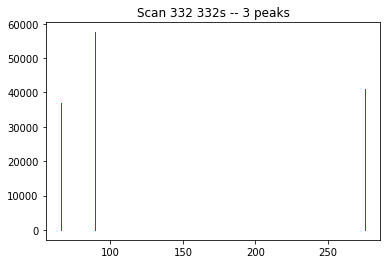

65.75300585337574 37027.346200328924
89.50411867144342 57534.638205626834
275.61032381250266 41142.95176423544
Scan 335 -- num_peaks=17 rt=335.00 ms_level=1
Scan 336 -- num_peaks=16 rt=336.00 ms_level=1
Scan 337 -- num_peaks=16 rt=337.00 ms_level=1
Scan 338 -- num_peaks=16 rt=338.00 ms_level=1
Scan 339 -- num_peaks=19 rt=339.00 ms_level=1
Scan 340 -- num_peaks=19 rt=340.00 ms_level=2


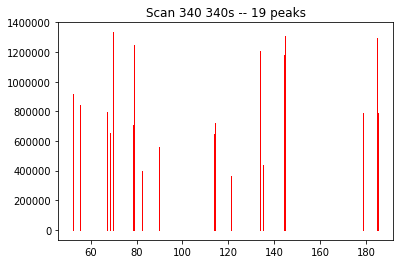

52.42911753189113 918811.741878581
55.101683862877266 843907.6473663583
67.20912883946117 795737.2241689954
68.56927325174638 653525.4264314971
69.84678133260263 1333516.3088667062
78.3142719968035 710850.2888010155
78.63639463157456 1247988.5020514273
82.13987145675041 395052.22786403116
89.73111387738234 560591.1375354186
113.59519766749762 649757.6125845239
114.07145891046692 718025.5240863408
120.94917578407762 366984.4430358802
133.80339555030105 1207838.4418528317
135.05733021569878 441181.8000533366
144.20861777854526 1180483.8872822
144.66735248732184 1305619.620104887
178.7424850919695 786229.3315796674
184.72400556475242 1298005.965938635
185.18629164661428 791868.204027197
Scan 341 -- num_peaks=8 rt=341.00 ms_level=2


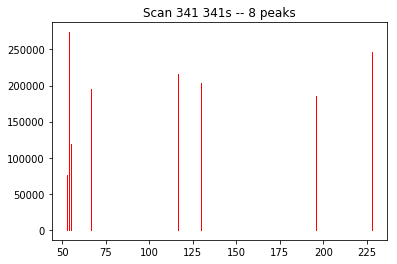

52.91279588598656 76556.04107795547
53.935497753697234 273805.15325348213
54.86837926677789 119122.54153659451
66.75359864242138 194914.5659040904
116.78436373059368 216638.35212409464
130.06097702987506 204189.27290243757
195.90786845121494 186105.87787141572
227.72008591670732 246130.7790261189
Scan 342 -- num_peaks=10 rt=342.00 ms_level=2


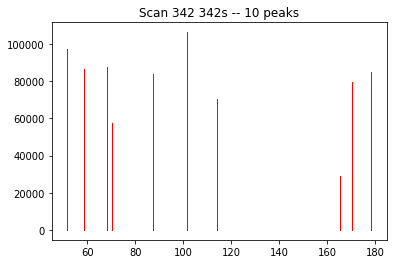

51.47642115953078 97542.3757369476
58.561990073857 86505.48074348527
68.11248175545728 87461.99766343841
70.34597775838317 57692.08827264962
87.4186935781153 84177.3029704169
101.36093412512284 106426.65338355643
114.23264731701 70493.73307700513
165.26752394074003 28914.74538749582
170.2314158178073 79837.68801511172
178.43806576224142 84884.75688515695
Scan 343 -- num_peaks=24 rt=343.00 ms_level=2


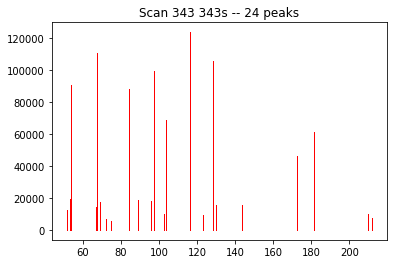

51.68250445027267 12306.588465241848
53.10406734170732 19381.583535589023
53.71468788121965 90781.6986903817
66.81059683506763 14116.74411571694
67.50589073894572 110823.9342502802
69.15932925007246 17667.251127242384
71.87354420601551 7125.040797291721
74.72712374135679 5723.977395357336
84.21192522598948 88223.45233350854
88.8112497763009 18585.496760300503
95.67381301805948 17996.355961670663
97.26736321694023 99604.6816919909
102.5030218176699 9699.690675903887
103.60197454310199 69077.35129299009
116.31649858850254 123697.05019177694
123.30266168677178 9090.987408958868
128.50735397683727 105787.75329080243
129.6373149704012 8477.634144901187
129.7686144170368 15407.21923474695
143.43249473235613 15368.840918649017
172.317619646097 46257.6296771609
181.32519035310867 61167.4939981145
209.97483090055977 10232.491807661792
211.59431634422282 7735.268185133675
Scan 344 -- num_peaks=42 rt=344.00 ms_level=2


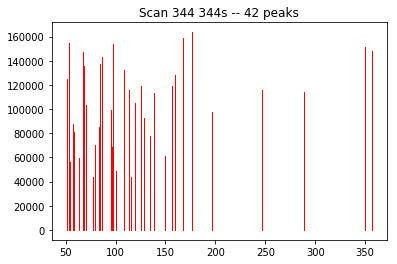

51.57803978361418 124900.37925792631
53.334926554534206 88370.83913765394
53.586238990342274 155097.68864541384
54.14819649943687 56396.87666270171
57.69868690377398 87404.69740552263
57.99772053993145 81094.26687315058
63.548768979959526 59927.99810213252
67.68387043866916 147286.82419453198
68.41095111093837 135971.97235326996
69.9382804046996 103550.17454081288
70.12091655073972 83098.9275721686
77.19999480756502 43920.10469187271
79.0403478588763 68233.96171770351
79.21737333180538 70585.45604822406
82.96287575706948 85356.81805229902
84.128483037409 137051.74987035044
86.68641244861632 143179.33823467148
94.97436551287088 47936.63096601652
95.86141493458145 99650.60641639604
96.75786043188437 68492.79830259943
97.59950491798575 153576.96656272575
100.51953239633305 48433.35840950557
108.5329921640931 55217.29917807309
108.65539186558732 132693.00837551153
113.28998013817534 78865.91855777783
113.83059442067741 116022.48405439747
115.18221232255588 43901.952517068356
119.8270360089

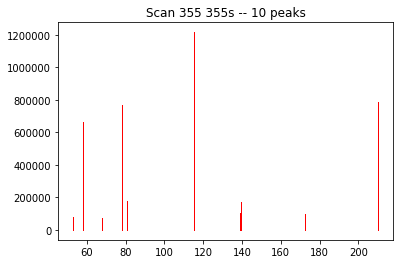

53.09000501876841 77477.01852623049
57.81074656645048 662803.7250769516
67.8448086115282 74432.62467333386
78.25036860732823 769125.7488696459
80.45001124350166 179333.92372963036
115.04290741549572 1215927.6379097
139.17494146323975 102050.40393290293
139.4606668827923 170153.74196853413
172.30997910849706 100352.13080348412
209.94832390986124 787993.559801498
Scan 356 -- num_peaks=19 rt=356.00 ms_level=2


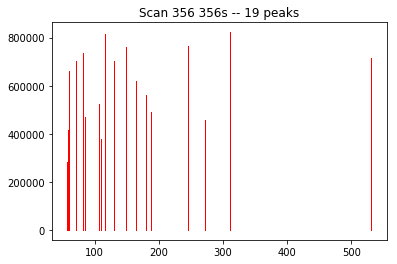

56.891229146516636 282005.6750302808
57.829555914237545 415229.2232720113
60.69722399113035 659543.618272643
71.00695424288934 704713.7534630874
82.20108021677498 737460.003771556
84.45694233248707 469575.8565663015
107.30322965078051 524282.33049062674
110.1906446421971 376361.6816092766
115.48699517924196 814564.4673532026
129.91229747849718 702061.0507165719
148.19482124572542 762815.4325531997
163.73485826978356 420459.7261192634
164.92360129169097 617831.1059657484
180.41637855276878 559590.5643325621
187.98510815505375 490221.44911736005
246.12371307295902 765864.9018483957
271.46956478380804 455816.06037645356
310.11282707111053 822336.2692359134
531.289712503548 714066.8489334249
Scan 357 -- num_peaks=28 rt=357.00 ms_level=2


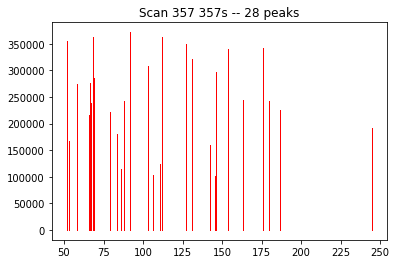

52.01900600345591 354902.271979835
53.458811610907894 167679.31913536863
58.42500629527593 273800.5763711776
65.80522617203248 215625.10837156858
66.47554782671351 275745.95776494086
67.3475177406116 238215.62066919604
68.48793273342844 363193.61257577915
69.07620515798774 285920.379011042
79.01699794791867 221473.113967469
83.84562347620928 180431.4933103296
85.77660333866979 115355.23895582913
88.27654369375462 242898.33215849445
91.76486513343087 371599.8037018234
103.3103266827377 307648.4212783186
106.5952179397881 103641.40127065335
110.53213411130335 123179.46518443487
112.21973803910097 362766.7560483926
127.28095577769791 348911.0645467911
131.053597258606 320530.20867844875
142.3319241612404 160571.731640821
145.55512308762127 100834.63067355515
146.36402732914354 297213.67991098936
153.6106303532323 340892.65363590233
163.32817250692042 244530.8923217799
176.08450495795336 342049.60606189526
179.66462680255995 242242.99012450775
186.4769463481764 224562.6440378923
244.503764

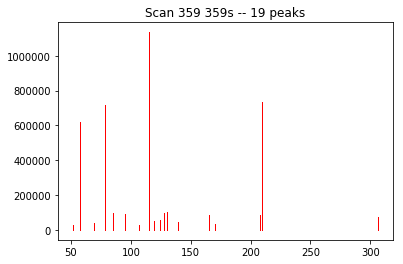

51.92203263342621 31015.4390706796
57.38291070826077 96635.83286080557
57.81074656645048 618402.0295404489
69.50289987098819 40290.50031772496
78.25036860732823 717601.4649247574
85.45582181112039 96410.27784029169
95.07462214532642 88789.12918771277
106.39617336157714 30589.188490292217
115.04290741549572 1134471.7758947164
119.3364171161251 49643.102331218775
124.11780443515445 55452.548245266764
127.66015099609068 94817.04665354636
130.0728431451884 105409.32888970396
139.18489307017023 44486.58501457448
164.87339247493517 84983.51609885352
170.4569937359748 35020.69660128186
207.96320339236937 88347.69238742112
209.94832390986124 735205.3077092683
306.13863635515963 71586.08404430054
Scan 364 -- num_peaks=76 rt=364.00 ms_level=2


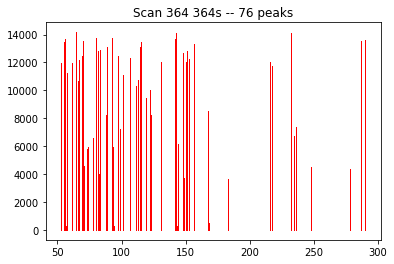

52.7052905913142 11923.67926002563
54.764102966933436 7458.772189154246
55.16975384588986 13452.330002301034
55.64509604222497 12701.685972803662
56.23928986083763 13647.721930826778
56.54232558492761 247.32003547608286
57.0979141806535 10909.193612235818
57.12520147410576 11215.630220669955
61.719492973037475 11987.262905020769
64.71866480656017 14162.147495774158
66.30572361509189 10690.750209876958
66.82792655542848 705.3314774569661
67.11950404999132 12158.835055930349
69.091495481459 12434.060528397109
69.29709988407082 392.52663500976763
69.54369736700576 13510.2834028392
69.76637584515632 9628.35062467664
69.83846728582328 656.2090665130588
70.45992543309471 4590.459826005131
72.77833523089468 5787.4747526423635
73.84672502258474 5918.633994964892
77.9176031186978 6572.044896493947
79.78343443285762 4780.602226452138
79.94679233763044 13742.186313329554
80.09525986436839 897.5575048195446
81.2792414488307 12803.91440332723
81.29785008411636 11388.749920369517
81.33101528407809 3

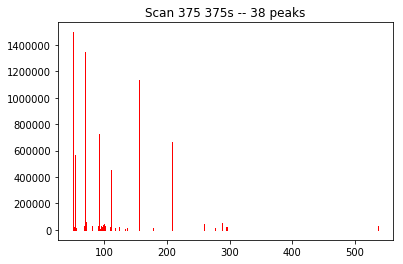

51.155462677877715 1496236.2625686803
51.88350731017362 25325.459539899086
52.70377557853673 14132.189603795841
53.128740953398946 8912.677317470358
53.30137269237507 566705.3615494041
55.74226344206913 15827.607177509673
67.31359751199841 30483.402173436425
68.85538576975243 13141.494932097612
69.32271657011859 60066.44294839756
69.54311613929114 31949.637334628922
69.68866441560415 1345808.4444025804
71.50849724815694 57858.9483011216
80.32331093704141 26139.48596601678
90.4603845979596 33273.6307456757
91.80548728168891 723514.3081708305
93.88261821969706 8466.605632250248
94.8939555512946 28936.957812438195
95.6362294786641 15007.413316140903
96.9227047470665 23441.246321912236
99.01546071364024 35162.6947556277
100.60888258913047 44731.84201096256
102.12145949096957 30919.18024821122
108.89472732995291 24275.339499288773
110.11638156508135 13313.000278069914
110.6932667995299 450494.08362675214
117.90047839074103 15105.917754364356
123.96125470377392 21981.348528652507
132.8036005

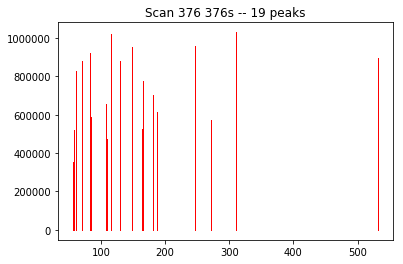

56.891229146516636 352893.68979377457
57.829555914237545 519605.758624996
60.69722399113035 825333.6781509024
71.00695424288934 881858.2699844815
82.20108021677498 922835.97405737
84.45694233248707 587613.552968255
107.30322965078051 656071.6413974651
110.1906446421971 470968.0488019475
115.48699517924196 1019322.2545195463
129.91229747849718 878538.7550135738
148.19482124572542 954565.0192905794
163.73485826978356 526151.057577031
164.92360129169097 773135.8549086303
180.41637855276878 700255.3370597743
187.98510815505375 613448.8462918366
246.12371307295902 958381.036366757
271.46956478380804 570394.9446983172
310.11282707111053 1029047.6610825225
531.289712503548 893562.4612961153
Scan 377 -- num_peaks=9 rt=377.00 ms_level=2


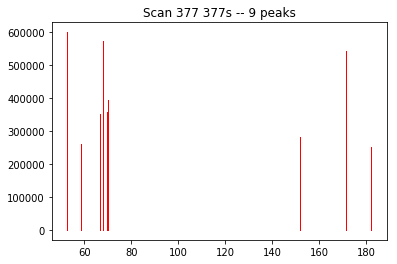

52.67018290896417 600672.5793186147
58.599346954009285 262505.18944000016
66.55603222184034 351469.78455083224
68.10826307375459 575155.9578259758
69.51973445984136 358055.82755082403
69.87505101291971 395797.51030641363
151.59094796437907 282367.9868911715
171.32392249205975 543962.4217446353
182.08663606547228 253355.6296995559
Scan 379 -- num_peaks=9 rt=379.00 ms_level=2


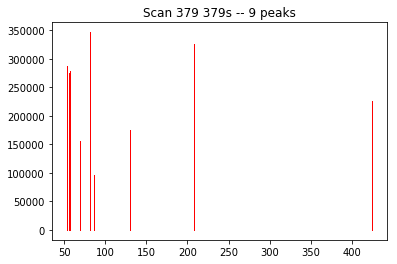

53.63050888319746 287105.19056101545
55.43873244632861 275577.39305221516
57.284838159702666 278792.10647457297
68.71811646440491 155066.40432751967
81.07895672754842 346551.65710847004
86.51343496745073 95805.21488209517
129.5157357162107 175488.3645100476
207.42892254195007 325917.86075451167
423.92510385337556 225197.5033067975
Scan 385 -- num_peaks=30 rt=385.00 ms_level=1
Scan 386 -- num_peaks=30 rt=386.00 ms_level=1
Scan 387 -- num_peaks=29 rt=387.00 ms_level=1
Scan 388 -- num_peaks=29 rt=388.00 ms_level=1
Scan 389 -- num_peaks=27 rt=389.00 ms_level=1
Scan 390 -- num_peaks=19 rt=390.00 ms_level=2


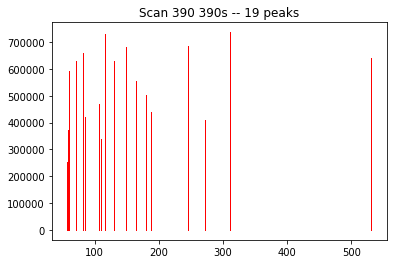

56.891229146516636 252644.05427265324
57.829555914237545 371996.7493869098
60.69722399113035 590873.8314296816
71.00695424288934 631340.9819057576
82.20108021677498 660677.7867032861
84.45694233248707 420684.9673458722
107.30322965078051 469695.5603621959
110.1906446421971 337175.9845060961
115.48699517924196 729754.3550372166
129.91229747849718 628964.470948707
148.19482124572542 683393.2810795186
163.73485826978356 376682.66730353516
164.92360129169097 553504.3060753419
180.41637855276878 501327.6023275769
187.98510815505375 439181.0001097542
246.12371307295902 686125.2483920046
271.46956478380804 408357.8016071142
310.11282707111053 736716.9792341979
531.289712503548 639720.2599446535
Scan 391 -- num_peaks=10 rt=391.00 ms_level=2


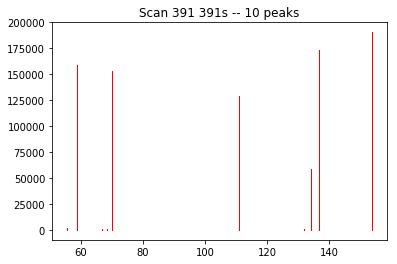

55.62222873609317 1659.4322683859536
58.86409768712237 158817.31447903064
66.83234344477374 481.6266691525378
68.54560985961125 1085.8748820497503
70.0267947638642 152879.832015965
110.86752425903353 128463.13876180221
131.84748922201734 886.656180103385
134.2163159986743 59112.69068398073
136.7415352769899 173335.2066829081
153.65675871317057 190267.0768317933
Scan 392 -- num_peaks=7 rt=392.00 ms_level=2


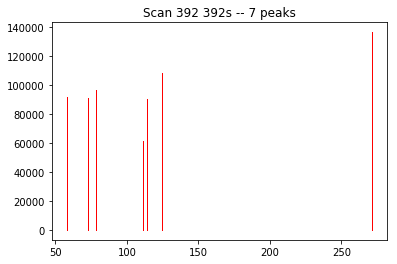

58.263940070761066 92020.04255120593
72.9352939696511 91267.72956404171
78.75772265464512 96751.82767473311
111.16705169746 61340.67105562606
114.2460256017471 90379.51248801827
124.61361343270356 108818.64254769155
271.0788639399484 136678.3806106025
Scan 393 -- num_peaks=9 rt=393.00 ms_level=2


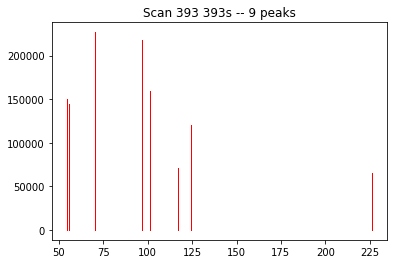

54.6523225385276 150079.56842575423
55.56934078295257 101691.44524416716
55.94613764521333 144879.55661822064
70.17539194049097 226731.45396864775
96.73622933008564 218353.79527697072
101.41503251815516 159340.32673844325
117.11864675981597 71372.60487320115
124.14635597080046 120532.01279484449
226.02541879081062 65146.03580412881
Scan 394 -- num_peaks=7 rt=394.00 ms_level=2


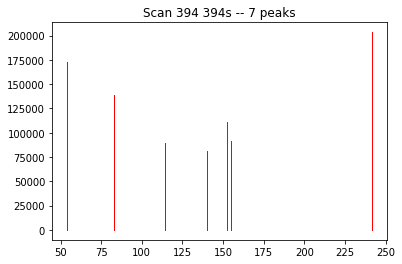

54.16225702665803 173107.19364852633
82.65717441060636 139165.0968065997
114.28201310429627 89877.89141680449
140.3356102523777 81209.59069303343
152.6057156809999 110581.90877842058
155.15195749794347 91885.31732090571
241.40883858167086 203350.5304406311
Scan 400 -- num_peaks=27 rt=400.00 ms_level=1
Scan 401 -- num_peaks=27 rt=401.00 ms_level=1
Scan 402 -- num_peaks=28 rt=402.00 ms_level=1
Scan 403 -- num_peaks=26 rt=403.00 ms_level=1
Scan 404 -- num_peaks=27 rt=404.00 ms_level=1
Scan 405 -- num_peaks=16 rt=405.00 ms_level=2


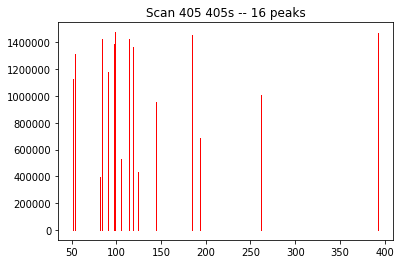

51.96379528778958 1127830.9303000218
54.28177146880761 1315692.1227075101
81.72012631537991 392079.35986575816
83.45106292858638 1424328.6408790837
90.71951399785478 1181758.329631122
97.4484940402174 1386943.7031308715
98.05197159067113 1476570.2911925549
104.72314031683128 530266.4510573001
114.10283527345278 1425331.2270425465
118.53993952538936 1369392.635487504
124.09687500528823 431620.7127382995
144.67867933043118 952898.0776496674
184.09585053981124 1456512.4703461865
193.93577477814338 685517.1597333673
262.2801312112714 1010175.6237346604
392.43340845597965 1468486.6904930077
Scan 406 -- num_peaks=4 rt=406.00 ms_level=2


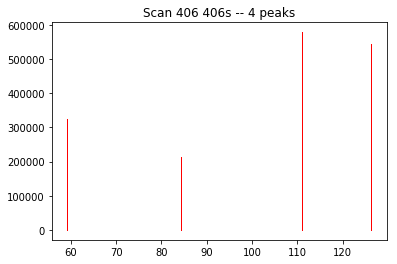

59.1604672032005 323954.60412450513
84.27788777983501 213363.98671267304
110.94268532467692 578746.6654932814
126.31866339599848 545497.8164961858
Scan 407 -- num_peaks=7 rt=407.00 ms_level=2


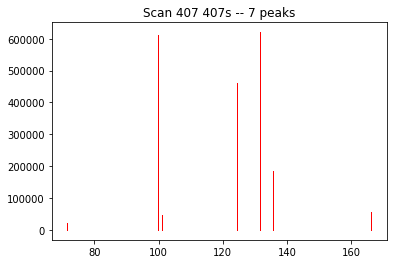

71.47532937039875 21187.334380357246
99.84935755531954 610981.7511752661
101.10275541978739 47582.96619939512
124.57099603673797 462543.7105030584
131.48864672630543 620316.46833283
135.77696823938365 184181.79591737315
166.29132270041737 55444.326342813656
Scan 408 -- num_peaks=10 rt=408.00 ms_level=2


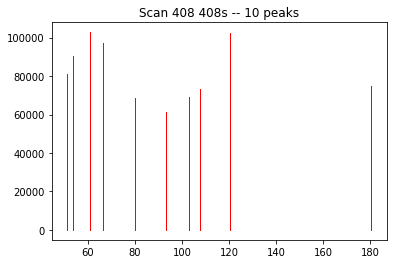

51.24107651841826 81085.8972114599
53.95369147631679 90596.02400989452
61.19698628684325 102795.65515467768
66.46264589700868 96971.05732643367
80.19120828433044 68489.9077568071
93.07673158626831 61332.9807542072
103.06588332875931 69014.49508207368
107.78607551992721 73503.93482902437
120.28896032858755 102613.25114748803
180.47111824772108 74750.9013602933
Scan 409 -- num_peaks=4 rt=409.00 ms_level=2


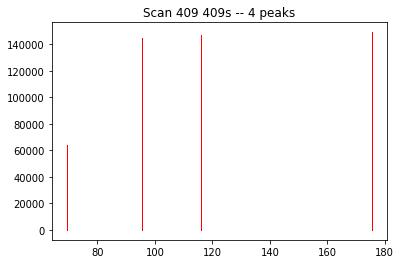

69.45049330416875 64028.1099876149
95.49520076253538 144757.69760786445
115.8640406977339 147161.35007106795
175.3824628947928 149010.92284259194
Scan 411 -- num_peaks=3 rt=411.00 ms_level=2


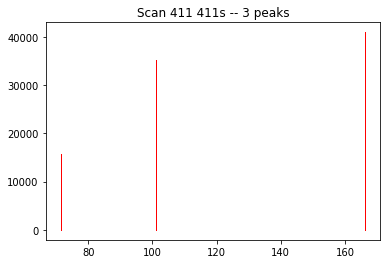

71.47532937039875 15635.400375851432
101.10275541978739 35114.314724172684
166.29132270041737 40915.68223622104
Scan 414 -- num_peaks=38 rt=414.00 ms_level=1
Scan 415 -- num_peaks=16 rt=415.00 ms_level=2


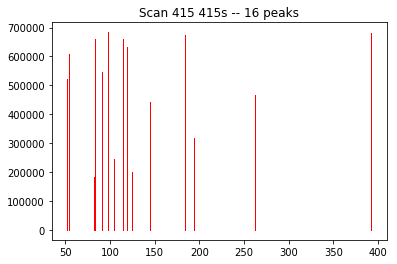

51.96379528778958 522163.9574648927
54.28177146880761 609140.064473656
81.72012631537991 181525.1778325893
83.45106292858638 659436.6760753484
90.71951399785478 547131.3027415702
97.4484940402174 642128.1712988459
98.05197159067113 683623.5520860307
104.72314031683128 245503.13451794352
114.10283527345278 659900.8541225615
118.53993952538936 634002.3656553025
124.09687500528823 199832.06120024933
144.67867933043118 441173.42229112063
184.09585053981124 674337.1680812265
193.93577477814338 317381.21682941145
262.2801312112714 467691.82086852234
392.43340845597965 679881.000947875
Scan 416 -- num_peaks=5 rt=416.00 ms_level=2


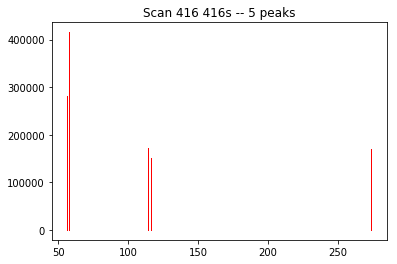

56.14250400458142 280645.6590584332
57.86178965167133 415266.50163965015
114.4116391531146 172157.09443792107
116.0421776275849 151128.10444593168
274.2866745862863 169507.8466262057
Scan 417 -- num_peaks=17 rt=417.00 ms_level=2


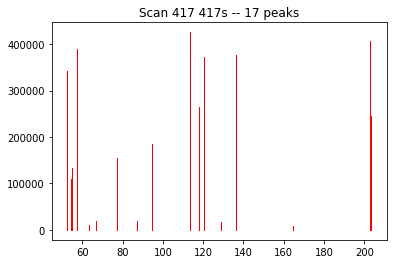

52.43588441414988 342928.5084205363
54.25476675419586 108987.5389151393
54.74952569533862 133873.2798251636
57.13543983897164 388575.86000681756
63.399443409385334 10749.635758405946
66.71541395548202 20105.074352302036
77.33703278526124 154280.18726975613
87.33523661422129 19257.555562104222
94.81393349798682 184030.43932090324
113.42442514564208 425626.1697080904
117.71026477326892 264171.36190145207
120.25122992052006 371723.0896057303
128.8276914455845 16323.631249362761
136.16823250208938 376823.95137262053
164.69621266551 7708.716550269667
202.65080623997974 405787.8673997995
203.51887438046344 244232.88652702584
Scan 418 -- num_peaks=99 rt=418.00 ms_level=2


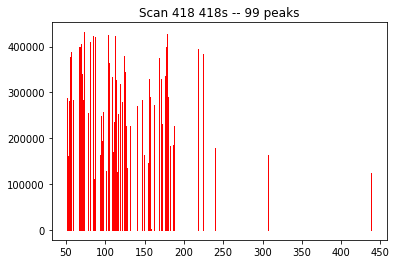

51.36080312051724 287151.1121693046
51.4819057818368 249386.2728885456
52.31872824739768 160911.04656308627
53.234024992148356 194331.37344868988
54.18481481455731 280485.03049689165
54.63567159953089 330284.33439679473
54.65850723837923 185223.8300297491
55.28391084443521 140800.42584719343
55.37010823034273 378291.1827885353
55.5253071903383 211543.83655713458
56.237950877059106 387507.4431215054
58.551833194788635 955.0028788670554
58.92674570354745 283615.22846517764
66.72836937845015 399216.3683061848
67.17110546123692 253563.34574799117
67.23783004191483 297599.25208912854
68.0606986054136 397738.1011565231
68.15356096592592 357675.7692546417
68.15884948097876 400164.72895597696
68.25297902701011 145634.94498027366
68.60488770828346 164839.30837554697
68.81100236805754 398936.07035721955
69.5523122265834 259330.85184219346
69.67297337330186 406357.1468989528
70.1233281769279 189072.03311470064
70.90630085506717 340789.87174118
71.70229002053057 283900.18916429754
72.7842245343560

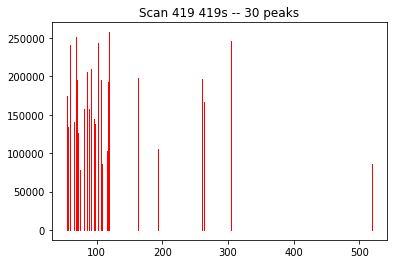

54.98478442965637 175083.10452179136
55.48697508033555 157151.64048180953
55.6672977193825 134496.4124981599
59.938565331998454 241353.40685840312
66.13458150074433 140152.7479629813
68.16153348036546 146006.34242006493
68.68526413373851 251888.60719197302
70.42848922984543 196051.68123184372
70.43813361652761 81094.74149613794
71.82600191064316 125783.5391665615
74.22968765126255 78491.75220267482
80.01847057140431 157222.33889190096
85.2178773686842 205416.45775323448
87.9409711297183 157216.09707421897
91.19985079962767 209783.58480386177
95.3481421269557 145115.25216023237
97.01664621559488 137827.39360391983
101.2123445591845 243550.24484151028
106.50685798670959 195262.86341876257
108.1315028585309 85436.92170618265
115.58545527411991 102937.27697632891
117.0369976254212 193010.46812149766
118.0370948367691 257677.357228302
119.20242160179313 199983.64561078855
163.38752127229193 197976.41330063742
192.89207769062475 106093.20192074928
260.6341245251742 197250.9221903936
263.0376

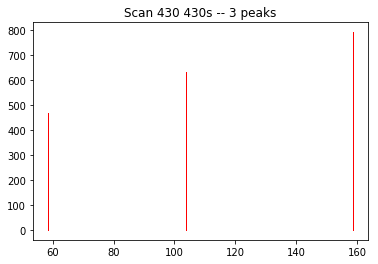

58.551833194788635 467.75875897295884
103.96171321703139 633.8222700110646
158.56600138513392 792.1402404557772
Scan 431 -- num_peaks=4 rt=431.00 ms_level=2


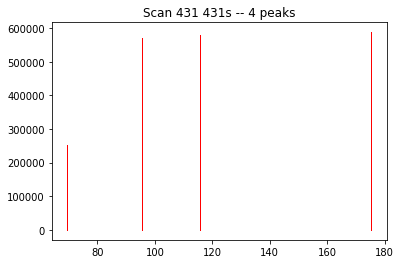

69.45049330416875 252560.9500008898
95.49520076253538 571001.4185153316
115.8640406977339 580482.7033712501
175.3824628947928 587778.4029688524
Scan 432 -- num_peaks=10 rt=432.00 ms_level=2


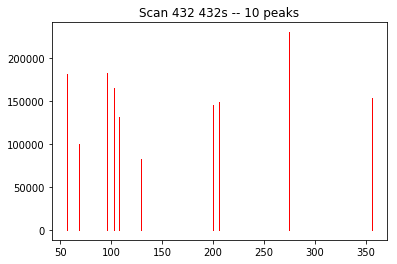

56.780246571845936 181620.46429231451
68.75616536377456 100035.31907302082
96.31717816105787 182653.69063481243
103.11224364960438 165246.94010935831
107.46231592502798 131743.17773566334
129.0570034430017 83154.84375783487
200.00490426465504 146001.93001742597
205.7010022157093 149528.3688489625
274.371198506616 230230.00489219726
355.9209729703169 153710.91319592204
Scan 433 -- num_peaks=26 rt=433.00 ms_level=2


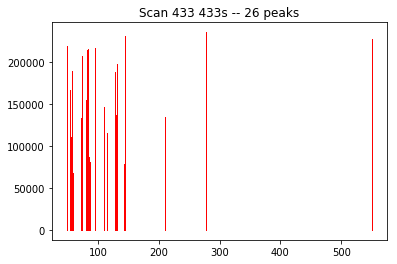

49.59293594492447 218638.2322344285
54.908148123969234 166491.2576257528
55.34138727768213 110750.15957618364
56.63985440199468 93807.13014998798
57.09787523926094 188814.98847306034
57.89271950667884 67577.96926177014
59.431237140934016 68132.6463249661
72.51630948535202 132950.7839088711
73.97628971856003 206912.35474309584
80.26399755815225 154305.19468194077
81.47626568965433 213919.2005103678
83.89592516668704 215922.10926905
84.68478278384598 59951.002341143736
86.03214402251868 86269.10663384202
87.33446516885182 81264.99191723808
95.57028853100478 216096.35169596437
109.96486532688725 146868.53270179516
114.31550641960226 115320.91777023759
128.77718632623228 187383.06644569658
130.45230842900384 136725.78618824878
132.19902313280136 197827.4065749427
142.4107122432697 78860.22018511564
144.0264609755354 230386.92087291117
210.27895929325942 134629.2613891935
277.25816944206446 235292.06633810795
549.7874472952437 226810.23235616751
Scan 435 -- num_peaks=39 rt=435.00 ms_level=1

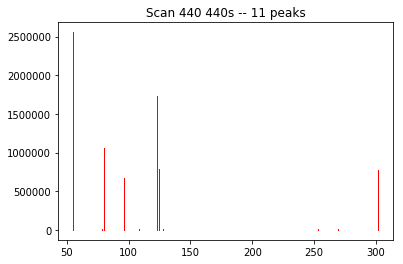

55.37883502483729 2555516.809058449
78.59503840132705 13925.856248448734
80.03074402228408 1054162.0069699152
95.93223819488462 671613.4498347245
108.14892768349273 14284.19087809549
123.17354374382316 1735325.8217320137
124.80803092746073 782145.4094989053
127.89400556528928 13597.586841898526
253.32257057011586 13774.207488825612
268.89348722728266 8875.54152042827
301.43486799698155 772884.797010467
Scan 441 -- num_peaks=31 rt=441.00 ms_level=2


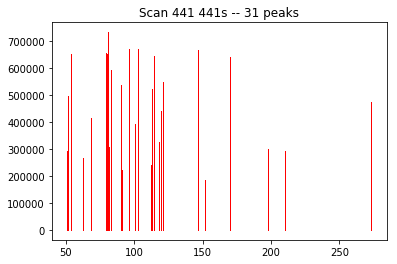

50.9596390821577 238621.16805807606
51.23571361180252 293001.6845153871
51.38033919817732 497235.6127782379
54.17973016811296 653055.5376967211
62.68784383811318 265638.03731101006
68.3992759637027 416103.71790015226
79.30154268440275 657863.3509932705
80.05105235526518 543709.5172007566
80.46579855580985 651858.5865726473
80.78707883750664 277214.9321263206
80.81857549752831 733903.2849354326
81.46468128177057 308038.2198382483
83.36547830494032 593790.923608894
90.37552507483483 536967.6989116331
91.24115931505908 223510.2988889691
96.4328434936987 671881.4445460568
96.52944530406738 402608.3118392768
100.6278198970667 392996.98958371
102.75662940851043 672222.7429651091
112.67029019034626 241391.62933634667
112.80757825263119 523136.1496018893
114.56131246770774 647179.4890912909
118.47258131763274 326491.2477504389
119.36267213789696 442366.0651947638
121.24166861379148 550132.5389518149
146.5283061320687 666474.1733816916
152.1272092835013 186496.6589844355
169.7231554185987 64219

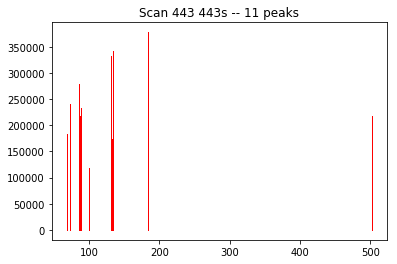

68.82083480879764 183088.74967524727
72.76574197208235 240545.4632365892
85.89948298673423 279367.2181719695
87.68150957597258 218532.74952575297
88.2637570471254 233087.19487900528
100.19034118186885 118945.5114689994
130.4835036403033 332545.3029867208
133.17739063922846 173470.76877375436
134.2842577242374 341000.0266758225
183.93339357641133 377794.2013824185
501.6834951078358 218318.52977083824
Scan 444 -- num_peaks=4 rt=444.00 ms_level=2


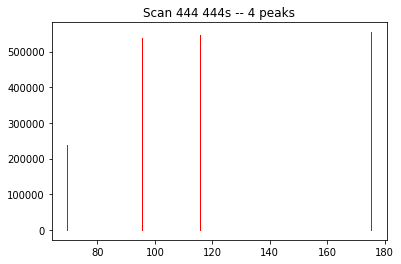

69.45049330416875 238242.16523117633
95.49520076253538 538628.8509632484
115.8640406977339 547572.6003165812
175.3824628947928 554454.6747980197
Scan 446 -- num_peaks=3 rt=446.00 ms_level=2


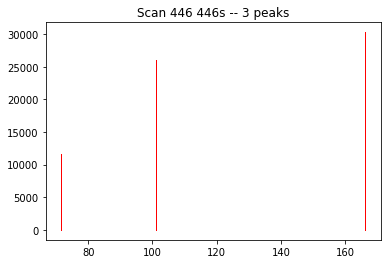

71.47532937039875 11572.15991270042
101.10275541978739 25989.002868171796
166.29132270041737 30282.743415133176
Scan 449 -- num_peaks=44 rt=449.00 ms_level=1
Scan 450 -- num_peaks=11 rt=450.00 ms_level=2


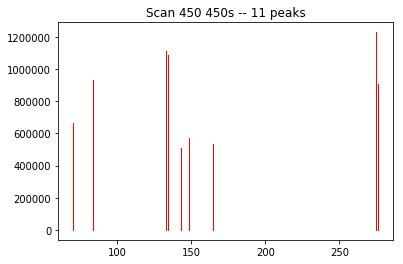

70.44550058102087 664920.0817730986
83.18706111803155 1838.552226028123
83.95255323932705 934393.7290920273
113.29876465751448 1383.1745155103065
133.03831865385104 1109103.8595708872
134.61154032771492 1088722.476043251
143.31579986534783 510524.8721019893
148.1549681531099 573298.481822532
164.38614291235308 536272.1493431882
274.6444531183585 1228416.1802174668
275.92542458729986 907810.789072122
Scan 451 -- num_peaks=4 rt=451.00 ms_level=2


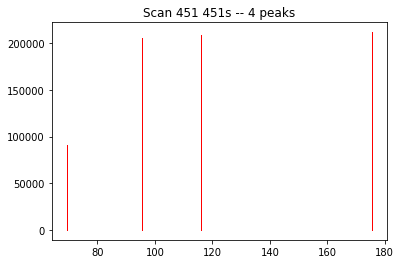

69.45049330416875 91062.45636720488
95.49520076253538 205878.1920125866
115.8640406977339 209296.72955171953
175.3824628947928 211927.24042948015
Scan 453 -- num_peaks=11 rt=453.00 ms_level=2


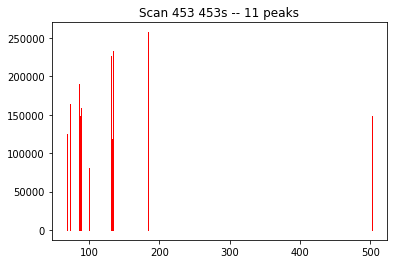

68.82083480879764 124734.62527275909
72.76574197208235 163878.7105766917
85.89948298673423 190327.1792176364
87.68150957597258 148881.8983704369
88.2637570471254 158797.54469174775
100.19034118186885 81035.14731122855
130.4835036403033 226556.3221543625
133.17739063922846 118182.09134723815
134.2842577242374 232316.35270247326
183.93339357641133 257383.47235012118
501.6834951078358 148735.95482719512
Scan 454 -- num_peaks=2 rt=454.00 ms_level=2


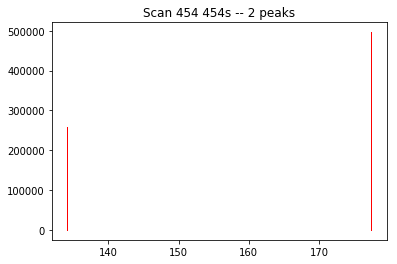

134.13364698396097 257988.45477011843
177.4520436108104 496486.3726209025
Scan 457 -- num_peaks=38 rt=457.00 ms_level=1
Scan 458 -- num_peaks=40 rt=458.00 ms_level=1
Scan 459 -- num_peaks=41 rt=459.00 ms_level=1
Scan 460 -- num_peaks=10 rt=460.00 ms_level=2


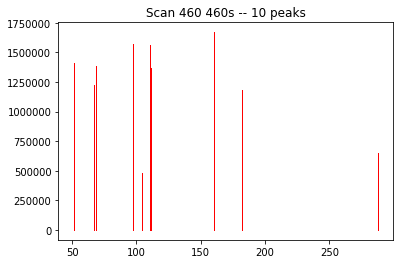

51.17784196656487 1409872.208409201
66.81211371064354 1224218.099678244
68.94423729329982 1385306.9092093506
97.1096898565268 1573564.8264380745
104.0578084331055 481129.36732607346
110.95962240018181 1563167.178222674
111.15649968076268 1363523.8781524256
160.6773292598635 1669354.9469741727
182.20252509068897 1184254.3952507463
287.62985866685244 646752.2980309326
Scan 461 -- num_peaks=4 rt=461.00 ms_level=2


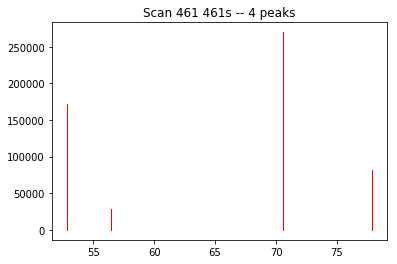

52.86275586994765 172381.70353378233
56.43490089029834 28134.492788231062
70.54584119780569 269777.76286549907
77.83536848713042 82398.20958957449
Scan 462 -- num_peaks=2 rt=462.00 ms_level=2


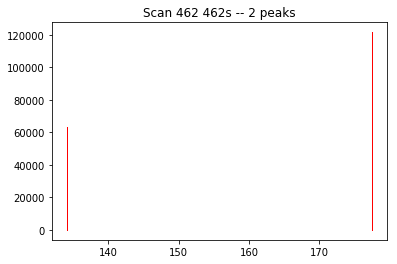

134.13364698396097 63169.43773249809
177.4520436108104 121566.54462795962
Scan 463 -- num_peaks=4 rt=463.00 ms_level=2


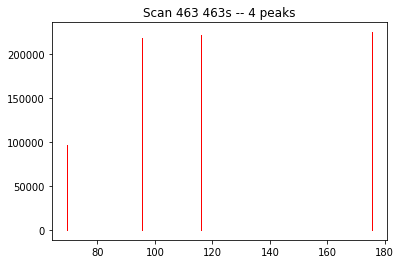

69.45049330416875 96596.17651285864
95.49520076253538 218389.08117745564
115.8640406977339 222015.3577871523
175.3824628947928 224805.72061288726
Scan 464 -- num_peaks=2 rt=464.00 ms_level=2


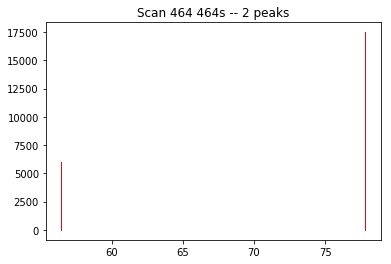

56.43490089029834 5971.534350850622
77.83536848713042 17488.985592040244
Scan 467 -- num_peaks=40 rt=467.00 ms_level=1
Scan 468 -- num_peaks=37 rt=468.00 ms_level=1
Scan 469 -- num_peaks=37 rt=469.00 ms_level=1
Scan 470 -- num_peaks=16 rt=470.00 ms_level=2


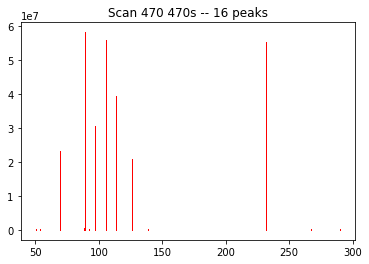

50.25422956735028 288074.7419512028
53.28941558879637 406936.7727747736
68.99005095998338 23095077.71900006
69.27018330932431 222829.03387557145
69.34138641894772 401182.87524550984
88.20469339052897 441815.9419564385
89.09513253650009 58134675.02292532
92.16335328786371 364641.3789264505
96.9308274386678 30639516.92091675
105.94794534497294 55954892.397461414
113.35289518537455 39469263.06632036
126.15666533956524 20997592.234600965
138.87261326097754 177663.19577959186
231.71712896134338 55385132.112107486
267.2100886726778 375603.86893919914
290.1698250641449 296709.69935549557
Scan 471 -- num_peaks=3 rt=471.00 ms_level=2


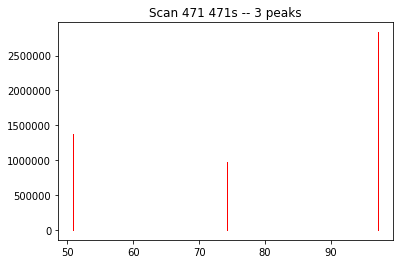

50.9130764652777 1373781.5596900377
74.28840538797029 967162.4180928168
97.13903854780008 2833425.8503722325
Scan 472 -- num_peaks=14 rt=472.00 ms_level=2


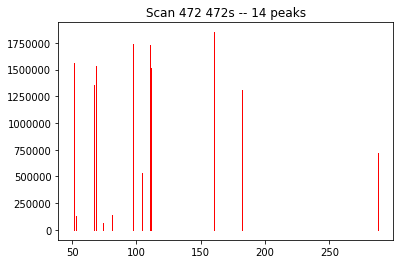

51.17784196656487 1561952.1299641195
53.44092927542861 130581.27904090253
66.81211371064354 1356271.906721685
68.30153652848246 97225.60713253733
68.94423729329982 1534737.0240988112
73.89099832069134 64813.50993263335
81.34536508334048 139796.00979217963
97.1096898565268 1743301.923133029
104.0578084331055 533027.7706028334
110.95962240018181 1731782.7026818453
111.15649968076268 1510604.3037334464
160.6773292598635 1849424.7205812447
182.20252509068897 1311997.4023520881
287.62985866685244 716516.0951774751
Scan 473 -- num_peaks=4 rt=473.00 ms_level=2


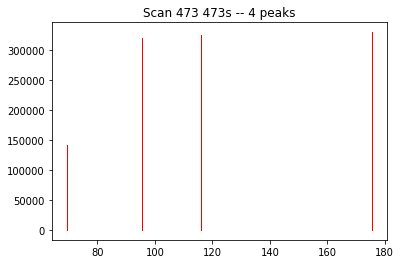

69.45049330416875 141934.5794583415
95.49520076253538 320892.2290116683
115.8640406977339 326220.53561941895
175.3824628947928 330320.58376318956
Scan 474 -- num_peaks=16 rt=474.00 ms_level=2


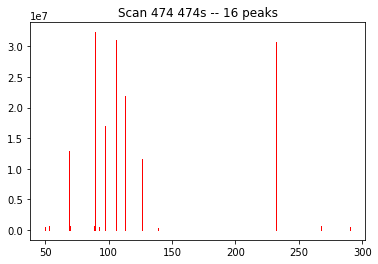

50.25422956735028 428276.16304024035
53.28941558879637 604986.4644970499
68.99005095998338 12830470.001527345
69.27018330932431 331276.4006861762
69.34138641894772 596432.2360365165
88.20469339052897 656840.7737154721
89.09513253650009 32296717.638518475
92.16335328786371 542106.5713521523
96.9308274386678 17021783.061232
105.94794534497294 31085739.44107961
113.35289518537455 21927148.36972371
126.15666533956524 11665211.97929165
138.87261326097754 264129.0634735321
231.71712896134338 30769209.125042565
267.2100886726778 558404.331885501
290.1698250641449 441113.61765385186
Scan 478 -- num_peaks=14 rt=478.00 ms_level=2


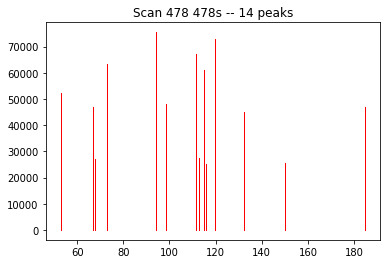

52.91420143948255 52287.56568579451
66.84748709272156 47089.03477929317
67.6213686808235 26906.33113881616
73.00013984512283 63448.25822170104
94.01301250469619 75505.236659019
98.66345737810703 48130.46506730351
111.66298626259271 67038.52502825386
112.6451212670127 27501.437957906666
115.14333106502494 60914.79992528399
115.79086958438096 25022.618328773624
119.71528468224987 73075.27667811651
132.5126902749954 45035.96065315279
150.09938987372502 25540.462591119012
184.79384260371953 46852.49591829994
Scan 479 -- num_peaks=1 rt=479.00 ms_level=2


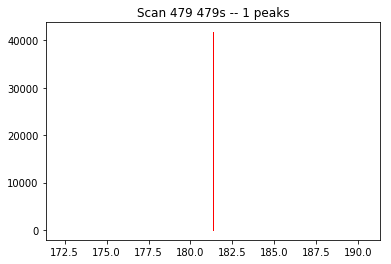

181.33916310341502 41696.57386817261
Scan 480 -- num_peaks=10 rt=480.00 ms_level=2


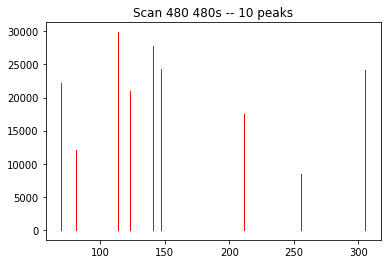

69.59569350820577 22168.972753183618
81.15404632618142 12076.83906372594
113.56587308335632 29858.946668347846
122.96396382426578 20955.65484119442
140.77463888304698 27713.86788112611
141.0211368450741 22657.76051676795
147.4645990842647 24327.47744484655
211.31999992031243 17535.658617082314
255.60446379843995 8413.93627717881
305.32316477905033 24112.366472430986
Scan 481 -- num_peaks=37 rt=481.00 ms_level=1
Scan 482 -- num_peaks=35 rt=482.00 ms_level=1
Scan 483 -- num_peaks=35 rt=483.00 ms_level=1
Scan 484 -- num_peaks=32 rt=484.00 ms_level=1
Scan 485 -- num_peaks=16 rt=485.00 ms_level=2


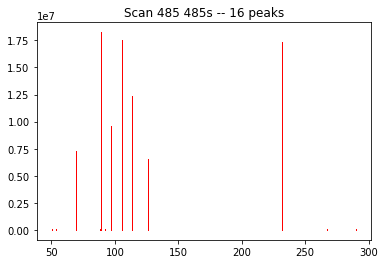

50.25422956735028 55983.996277268656
53.28941558879637 79083.45805605441
68.99005095998338 7249837.6054375125
69.27018330932431 43304.24707998346
69.34138641894772 77965.25457984458
88.20469339052897 85861.82142243144
89.09513253650009 18249211.294680197
92.16335328786371 70863.83714895237
96.9308274386678 9618132.689934883
105.94794534497294 17564949.90175288
113.35289518537455 12389901.914108148
126.15666533956524 6591410.3281330615
138.87261326097754 34526.78851246575
231.71712896134338 17386094.92697852
267.2100886726778 72994.2703688397
290.1698250641449 57662.10043836927
Scan 486 -- num_peaks=3 rt=486.00 ms_level=2


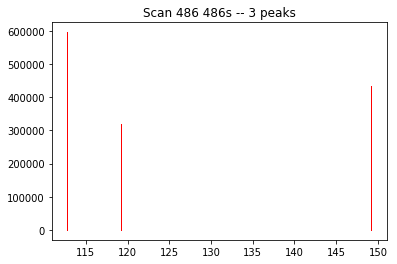

112.75026607818356 596007.1712488342
119.18552736036037 318134.0814142644
149.2203665827505 433912.6240544562
Scan 487 -- num_peaks=10 rt=487.00 ms_level=2


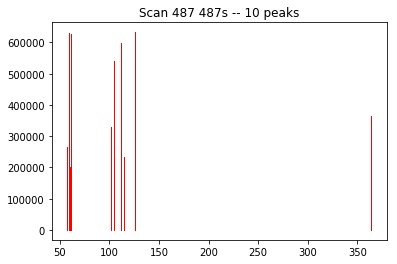

57.386484766482 266446.6903324281
59.03531373034858 630903.2544064799
59.89510842670941 202457.58163456855
61.425709487594055 626895.5313058712
101.47245730433042 328241.8815974379
104.42327620183622 541578.2145022431
111.52578099983342 596737.6631078856
114.3187004212254 233307.96848222084
125.48082070103172 632561.4562075781
364.07105142520555 363235.5197508804
Scan 488 -- num_peaks=1 rt=488.00 ms_level=2


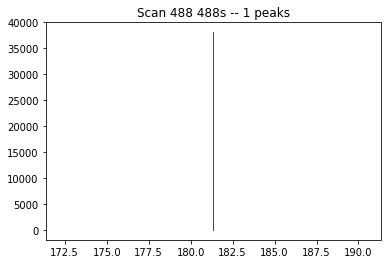

181.33916310341502 38107.36864558751
Scan 490 -- num_peaks=25 rt=490.00 ms_level=1
Scan 491 -- num_peaks=25 rt=491.00 ms_level=1
Scan 492 -- num_peaks=24 rt=492.00 ms_level=1
Scan 493 -- num_peaks=24 rt=493.00 ms_level=1
Scan 494 -- num_peaks=23 rt=494.00 ms_level=1
Scan 495 -- num_peaks=10 rt=495.00 ms_level=2


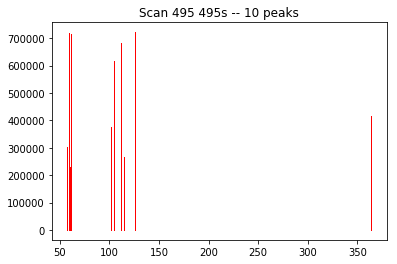

57.386484766482 304049.5115509653
59.03531373034858 719940.735983157
59.89510842670941 231029.81211355806
61.425709487594055 715367.414957284
101.47245730433042 374565.6725769595
104.42327620183622 618009.5214566456
111.52578099983342 680953.4573901031
114.3187004212254 266234.0214076729
125.48082070103172 721832.9548245613
364.07105142520555 414497.85779071035
Scan 496 -- num_peaks=7 rt=496.00 ms_level=2


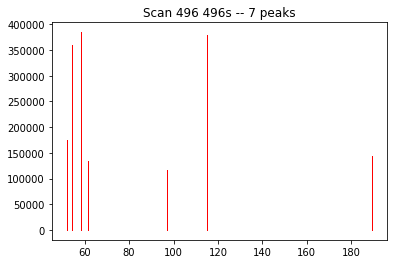

52.1497076956069 174448.7390480593
54.28709548893077 359635.7516578158
58.24432057657471 384710.9130032165
61.45456850081067 133614.0286908566
97.25972141610978 117021.2564421115
115.22645505368048 378532.83461928304
189.10553766747395 143805.72214000794
Scan 498 -- num_peaks=9 rt=498.00 ms_level=2


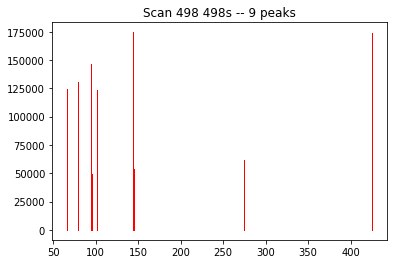

66.70795700616445 124694.9622488378
79.82047292545052 130504.07557380141
94.28695921155887 146204.80845391273
95.41149945259119 49556.9995225963
102.01490402933668 123748.95823611497
144.4702556509492 174531.90982077544
144.754633045539 54188.30745937703
274.9252492310809 61425.0763381545
424.7607976947891 174146.96329552753
Scan 499 -- num_peaks=34 rt=499.00 ms_level=2


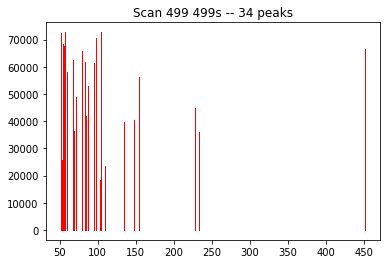

51.684530024227705 72557.05427523053
52.52664893634628 34293.20873007524
53.50310488757262 25845.698382269722
54.56333923571744 68209.13317439551
55.27181601131173 63990.59737197681
56.0054822993529 67739.8870261486
56.07299050608237 53428.23595602356
57.09470015115666 72621.93575204769
59.95088441658106 58229.11198409068
68.04262654641667 62431.32389529513
68.21111481207154 53416.17347896357
68.90341303026771 36533.890377445336
71.9248816057111 49018.21193675461
79.530265967414 65881.99145464241
83.36562376030835 51292.42599557722
83.4528526679165 61700.95452057019
84.61575050012729 38862.70487333773
84.65872075113573 41828.75989911404
86.95707589549451 23124.938254835077
87.70051611548536 52923.58661565701
94.7271479844635 36690.38783281025
95.76522177550397 61228.50585431905
97.65228668701957 70653.84611408263
97.88435598669369 48459.03198506645
103.70528711362307 18479.535369036148
103.90224914215415 72699.05864416016
104.11895993866335 61112.763924502215
109.41406772010109 23533.1

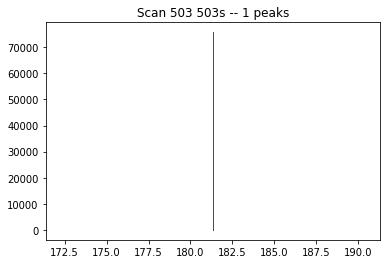

181.33916310341502 75752.8211493338
Scan 505 -- num_peaks=18 rt=505.00 ms_level=1
Scan 506 -- num_peaks=16 rt=506.00 ms_level=1
Scan 507 -- num_peaks=17 rt=507.00 ms_level=1
Scan 508 -- num_peaks=17 rt=508.00 ms_level=1
Scan 509 -- num_peaks=17 rt=509.00 ms_level=1
Scan 511 -- num_peaks=4 rt=511.00 ms_level=2


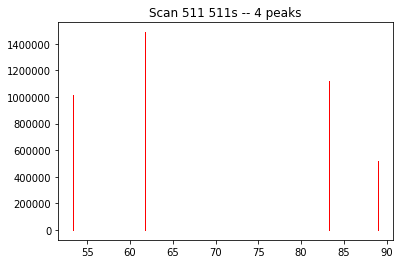

53.38534199769207 1017114.2654731423
61.73577530766763 1486912.5387164268
83.25804771405406 1116998.9744581054
88.96386640867789 515944.86393374775
Scan 512 -- num_peaks=10 rt=512.00 ms_level=2


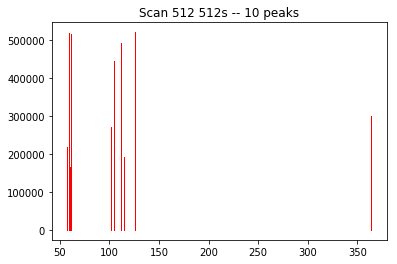

57.386484766482 219588.5672775529
59.03531373034858 519950.6946512195
59.89510842670941 166852.77730470797
61.425709487594055 516647.7818899095
101.47245730433042 270516.2687911129
104.42327620183622 446334.62717404595
111.52578099983342 491793.56785753137
114.3187004212254 192277.72155671674
125.48082070103172 521317.2800544982
364.07105142520555 299355.81960841327
Scan 513 -- num_peaks=7 rt=513.00 ms_level=2


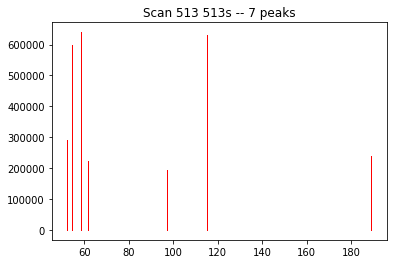

52.1497076956069 290132.2063557945
54.28709548893077 598123.6361024156
58.24432057657471 639827.0724560851
61.45456850081067 222218.4760732778
97.25972141610978 194622.4174926459
115.22645505368048 629552.0798000714
189.10553766747395 239168.66168676948
Scan 515 -- num_peaks=15 rt=515.00 ms_level=1
Scan 516 -- num_peaks=17 rt=516.00 ms_level=1
Scan 517 -- num_peaks=18 rt=517.00 ms_level=1
Scan 518 -- num_peaks=19 rt=518.00 ms_level=1
Scan 519 -- num_peaks=20 rt=519.00 ms_level=1
Scan 521 -- num_peaks=7 rt=521.00 ms_level=2


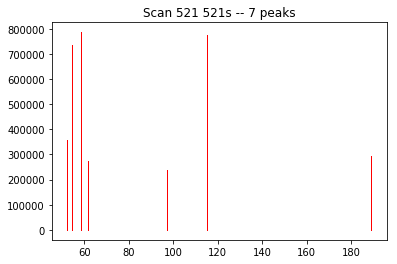

52.1497076956069 356410.49523868685
54.28709548893077 734760.0048779228
58.24432057657471 785990.2443286198
61.45456850081067 272982.43825898314
97.25972141610978 239082.289671903
115.22645505368048 773368.0150797484
189.10553766747395 293804.75276440475
Scan 522 -- num_peaks=9 rt=522.00 ms_level=2


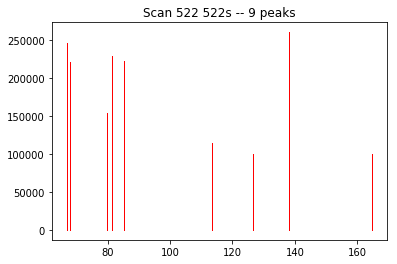

66.9828068646589 246943.94914826468
68.02132561805789 220832.94203687058
79.79645341678342 154480.95773127934
81.4325200910214 229939.66097281754
85.32717475127069 222568.25370271446
113.36372054772289 114938.6515478474
126.61877864919452 99676.1330396521
138.22867425512678 260657.76716114752
164.58609544839243 100078.18202736539
Scan 524 -- num_peaks=9 rt=524.00 ms_level=2


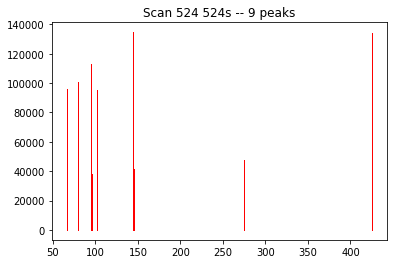

66.70795700616445 96166.31997038264
79.82047292545052 100646.38107852793
94.28695921155887 112754.98334030347
95.41149945259119 38218.980036673565
102.01490402933668 95436.74980218911
144.4702556509492 134601.19945642064
144.754633045539 41790.70284646157
274.9252492310809 47371.78983664355
424.7607976947891 134304.32386456954
Scan 530 -- num_peaks=16 rt=530.00 ms_level=1
Scan 531 -- num_peaks=17 rt=531.00 ms_level=1
Scan 532 -- num_peaks=18 rt=532.00 ms_level=1
Scan 533 -- num_peaks=18 rt=533.00 ms_level=1
Scan 534 -- num_peaks=21 rt=534.00 ms_level=1
Scan 535 -- num_peaks=7 rt=535.00 ms_level=2


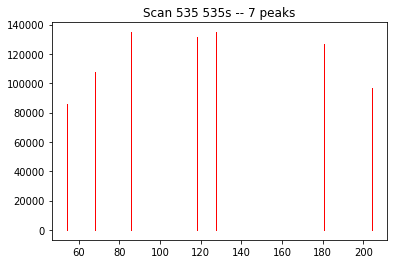

54.301453627996615 85843.3113713372
67.9356712303182 107862.80204634927
85.9041510981136 134730.1585431152
118.35502926638534 131200.8564575106
127.52707577613315 134581.73503667966
180.56736132112948 126709.51061822324
204.00259703744337 96639.43656326892
Scan 537 -- num_peaks=6 rt=537.00 ms_level=2


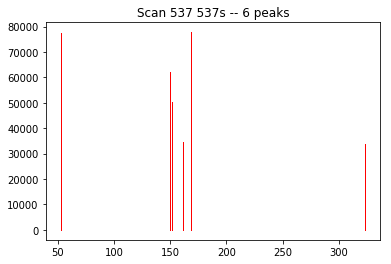

52.84813862273231 77363.33556109802
149.75300468003653 61928.79276560424
151.62860127168182 50319.42697812445
161.38673032751387 34752.537461417705
168.79722863841613 77756.81487415092
323.16528643142226 33638.28121057374
Scan 538 -- num_peaks=13 rt=538.00 ms_level=2


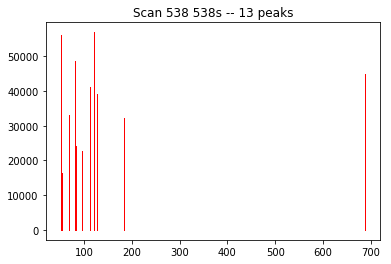

51.68463828661644 56049.857037387235
52.85347440026676 26460.691165315762
53.56888065884089 16280.165859325847
69.12598134613283 33192.04809075779
81.44016134387415 48717.80055486035
84.42991875886545 24078.207514607995
95.7903032590029 21928.371838872194
95.96878429960222 22628.035382405258
113.55422575800382 41039.79950225532
120.65825578807436 56889.24754962528
126.70671794297941 39046.21826656856
183.3150140420318 32170.440754792682
687.8881378370481 44920.089564478905
Scan 539 -- num_peaks=16 rt=539.00 ms_level=2


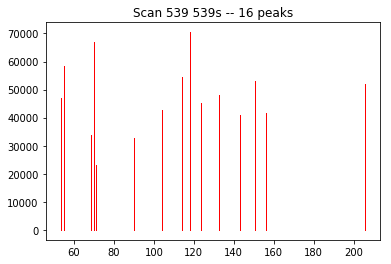

53.449542556093874 47060.42481529745
54.906101291758425 58349.82931776104
68.72519707153275 33725.976850904415
70.10695797641625 67075.30829546096
70.23795246160118 27445.68499283994
71.06991071841598 23011.283032762512
89.86755166489867 32793.4756118725
104.0727161674609 42864.240067764105
113.95562062299422 54318.74336089312
117.9820468328777 70423.0819464331
123.48872464699556 45391.21185985604
132.59591358688857 48026.233882269655
143.11033815361645 40927.984665175376
150.70909908467343 52926.744241172055
155.9307809911229 41659.69478014241
205.71761668659005 51907.94608942651
Scan 545 -- num_peaks=17 rt=545.00 ms_level=1
Scan 546 -- num_peaks=16 rt=546.00 ms_level=1
Scan 547 -- num_peaks=16 rt=547.00 ms_level=1
Scan 548 -- num_peaks=17 rt=548.00 ms_level=1
Scan 549 -- num_peaks=16 rt=549.00 ms_level=1
Scan 550 -- num_peaks=20 rt=550.00 ms_level=2


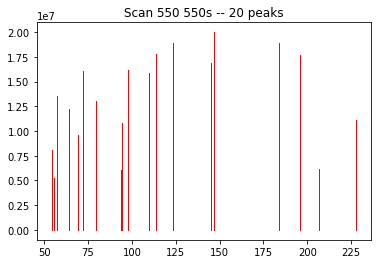

54.397737163419634 8123734.4750308795
55.42586737316282 5236512.390152146
57.63192220605118 13525466.848879082
63.95009387631452 12199010.277506988
69.60249751643067 9564313.530358715
72.320301065126 16109503.54203734
79.35386051619331 13018721.03365743
93.85962075239334 6040162.3922317885
94.62011110185287 10814674.54625458
97.61712587155647 9215760.165581308
97.90752150472109 16129468.255276581
109.62653927316106 15883610.9303354
113.77387316397092 17786075.060683127
123.25290061907943 18874801.030530874
145.330146958757 16822489.249482084
146.72128543174486 19979966.736836694
183.96815008736934 18926658.41528349
195.64929632522313 17718270.08997858
206.81665423863961 6184351.108899319
227.8322530803515 11152254.430675842
Scan 551 -- num_peaks=7 rt=551.00 ms_level=2


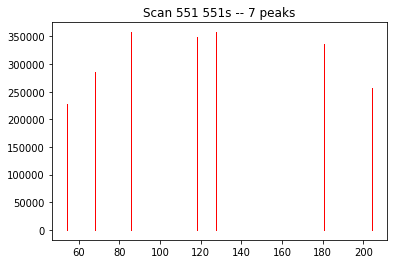

54.301453627996615 227814.66080703732
67.9356712303182 286250.92938912916
85.9041510981136 357552.6721727397
118.35502926638534 348186.458956202
127.52707577613315 357158.7795067388
180.56736132112948 336267.1327722637
204.00259703744337 256465.8807954063
Scan 552 -- num_peaks=1 rt=552.00 ms_level=2


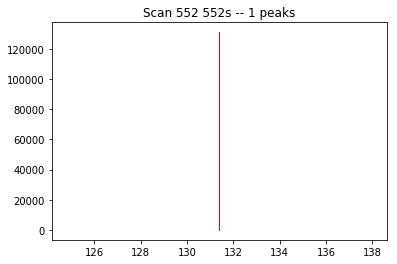

131.3975436443291 131053.64983051366
Scan 553 -- num_peaks=6 rt=553.00 ms_level=2


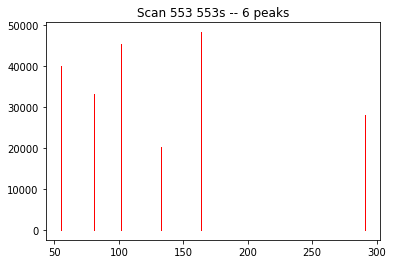

54.97207732625471 40110.782910928785
80.61884294838163 33314.64484233809
101.79868643735344 45540.21058799361
132.82631336113135 20333.957711189454
163.8210583050502 48331.48463356854
291.1057699235705 27986.72849852934
Scan 554 -- num_peaks=21 rt=554.00 ms_level=2


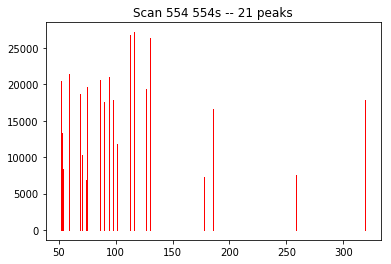

51.82752187627102 20514.967816753982
52.84481966716834 13364.441574912778
54.041080566509066 8336.317105988257
59.23415424783591 21449.562267495014
68.25485143941223 18659.269176943908
70.76580110190723 10239.412481592986
73.80070721004633 6899.921029821175
74.46175814798023 19575.96973996265
86.01162412142561 20655.244888105408
89.74429690332444 17557.504462320485
94.01092008034746 21068.685295280236
97.28112601199471 17826.472452518916
101.5656242356873 11753.727008723445
112.42394584789318 26823.724648100742
116.50185327391875 27152.098968296934
126.79740579884835 19317.31762577165
129.95940452294926 26339.87463541703
177.72001842855423 7214.763418580115
185.75000362745973 16630.45016321343
258.4468100028102 7520.079111775197
319.46097407776455 17841.354895112614
Scan 560 -- num_peaks=18 rt=560.00 ms_level=1
Scan 561 -- num_peaks=19 rt=561.00 ms_level=1
Scan 562 -- num_peaks=19 rt=562.00 ms_level=1
Scan 563 -- num_peaks=20 rt=563.00 ms_level=1
Scan 564 -- num_peaks=20 rt=564.00 ms_l

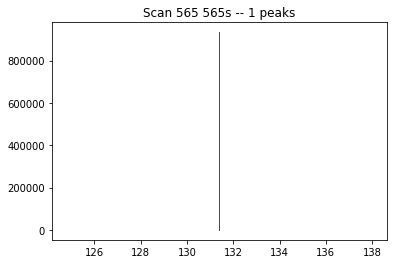

131.3975436443291 933540.1629594414
Scan 566 -- num_peaks=14 rt=566.00 ms_level=2


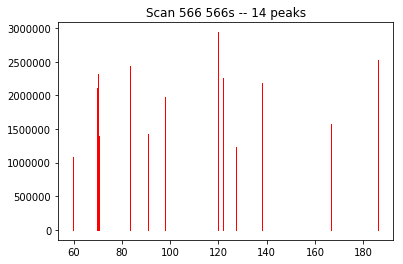

59.94795888156793 1084819.7356565408
69.59187720916562 2113318.862815095
70.27148914349257 2315371.7560831713
70.3772123731989 1390659.0186445704
83.19001332418992 1212993.7767794733
83.56440046672576 2429825.563143551
90.91068900344267 1424590.1554902277
97.87365639544036 1973800.8326113066
119.70001974206325 2938688.7354152347
121.86084159093868 2257569.374590515
127.44580238047071 1232391.8386984095
138.14894252275045 2185651.1917181113
166.6085037051687 1569306.7477905648
186.01782206524712 2520120.8226400735
Scan 568 -- num_peaks=7 rt=568.00 ms_level=2


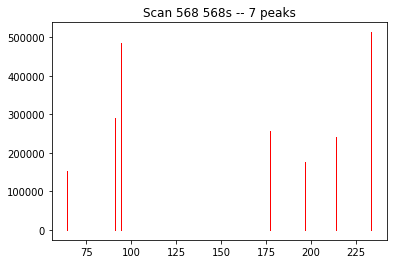

64.23448466841684 152574.14866728373
90.84046548047188 289546.1580654278
94.09763343971656 484384.445354721
177.39607177221643 256034.0055906785
196.53180940454476 177458.48763425997
213.9915339819628 240245.82351552433
233.59010684662007 513614.43185626145
Scan 569 -- num_peaks=4 rt=569.00 ms_level=2


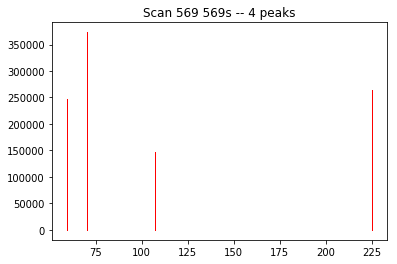

59.4845559300982 247222.6085554571
70.1516862424781 373188.62020539166
106.96041336803646 147839.13336233707
224.81803956378812 264575.34982044576
Scan 574 -- num_peaks=22 rt=574.00 ms_level=1
Scan 575 -- num_peaks=14 rt=575.00 ms_level=2


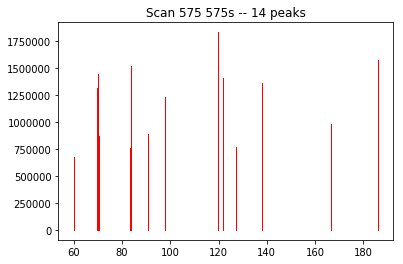

59.94795888156793 676228.8799294395
69.59187720916562 1317349.971210023
70.27148914349257 1443300.8524580318
70.3772123731989 866875.6288551961
83.19001332418992 756126.9361831213
83.56440046672576 1514646.3186292015
90.91068900344267 888026.8062441149
97.87365639544036 1230380.5714160833
119.70001974206325 1831849.2249852195
121.86084159093868 1407269.3917376231
127.44580238047071 768218.8342682031
138.14894252275045 1362438.761678212
166.6085037051687 978236.7608585887
186.01782206524712 1570932.4094748085
Scan 576 -- num_peaks=1 rt=576.00 ms_level=2


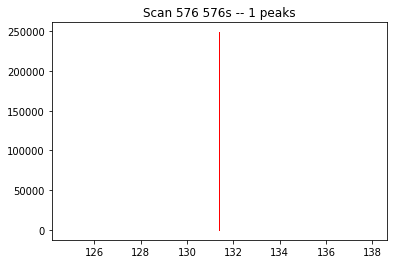

131.3975436443291 248746.25778841716
Scan 577 -- num_peaks=34 rt=577.00 ms_level=2


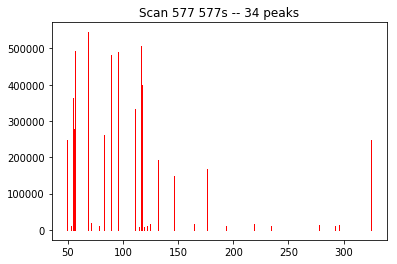

49.44022221023552 249110.92697641902
52.78998539761376 10508.201273943787
54.39672805931151 363982.60672213696
54.481385566465114 5556.809945036582
54.486717501920005 334433.2511069897
55.1029221245918 331157.9327491847
55.7680684684941 278098.9672310898
56.263788350549405 13319.750343499061
56.35065441351781 493238.46152786055
68.2729477300343 544779.9295506472
71.34640064236379 18765.83809613481
78.76900225768541 11093.369085956292
82.7357672502967 261399.10938794512
89.26832389345189 481686.6058197098
95.81563345483896 491172.79426295275
110.64393803369396 332647.7645594981
114.5765489761944 9361.941338315262
116.15596273782246 507165.30891847564
117.7694943145047 400282.7814108026
119.59096988524807 8254.61089518186
122.2604043866465 10212.973187482621
124.40124349318604 15241.677135474642
131.45781482676767 191554.72527052142
146.01104679887683 13905.17082636883
146.41987338460189 149672.90965364792
164.7584977436198 15994.214423745003
176.2546939334353 169140.83935594492
193.8082

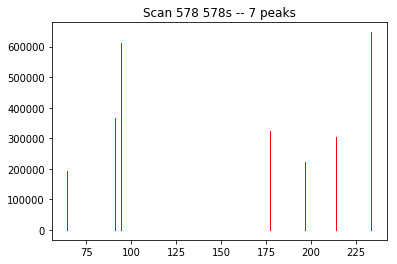

64.23448466841684 192155.8314311617
90.84046548047188 364661.9248853867
94.09763343971656 610046.3062876455
177.39607177221643 322455.85276843875
196.53180940454476 223495.81192970276
213.9915339819628 302571.80766684323
233.59010684662007 646859.3077560228
Scan 579 -- num_peaks=8 rt=579.00 ms_level=2


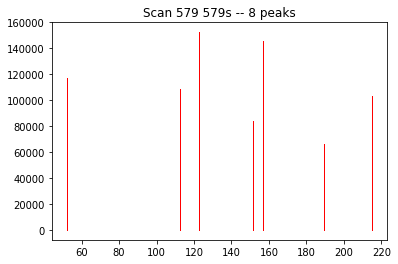

52.30153808463421 116999.08079042225
112.59366262543332 108427.39746666771
122.86829185596122 152363.8776360796
151.64593074795084 83937.50905972157
156.95632309392855 145452.481260945
189.12605819185364 66484.71041880242
214.74478646283492 103219.14476326645
214.75250099325527 53284.81111786211
Scan 585 -- num_peaks=17 rt=585.00 ms_level=1
Scan 586 -- num_peaks=19 rt=586.00 ms_level=1
Scan 587 -- num_peaks=19 rt=587.00 ms_level=1
Scan 588 -- num_peaks=18 rt=588.00 ms_level=1
Scan 589 -- num_peaks=19 rt=589.00 ms_level=1
Scan 590 -- num_peaks=10 rt=590.00 ms_level=2


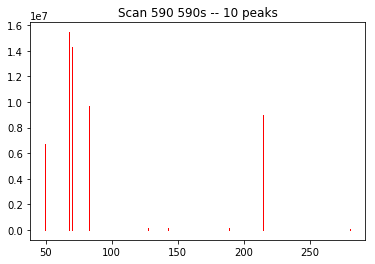

49.634277795378104 6730982.153941118
67.18868777326612 82749.62252878801
67.29138944823484 15453139.120704465
69.47421236036764 14301222.570658607
82.64851092607252 9649956.167368218
127.77545758251368 167365.72908232926
143.01536972219566 147433.93372116738
188.84030401147484 153348.4576661138
214.63037732834184 9018807.508388352
280.55707935034053 95197.64966747181
Scan 591 -- num_peaks=33 rt=591.00 ms_level=2


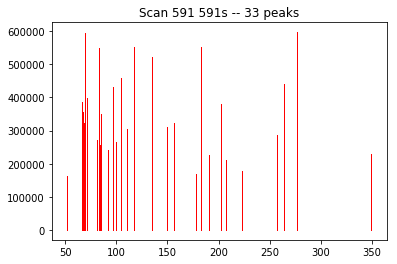

51.83993261825388 164164.72876556273
66.48383664622516 387247.92524829326
67.57526147387765 356993.2452087134
68.40171225925451 321784.9495944283
69.10490931333989 593469.4490408448
69.8112385563533 446480.8966145533
71.052294154691 204202.8360103658
71.68830067457128 398460.7346896568
81.2775431555241 271584.59759064496
83.2171772016156 403236.9369018103
83.5121148499692 548160.2430874734
84.49173253767009 255359.66141024855
85.38771695858264 349639.3923725528
91.49265918331558 242338.8983848164
96.68872221989126 433031.5415484163
97.27695828508959 327770.28203490505
99.86917709679304 266590.32711018587
104.55355236057092 457584.70022104686
110.19084525724567 305337.5163086597
117.44888688259061 552227.0670030608
134.45813247351188 520950.29533232737
149.89943718267227 311688.1536924407
156.19894706601394 323306.94005152077
178.04503301695883 168747.40543402027
182.48715504604607 552341.7145641843
190.76169108694265 226183.17893477183
202.06425579055136 379561.0979632906
207.792338787

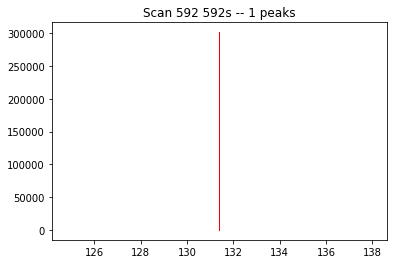

131.3975436443291 301472.70227640524
Scan 593 -- num_peaks=20 rt=593.00 ms_level=2


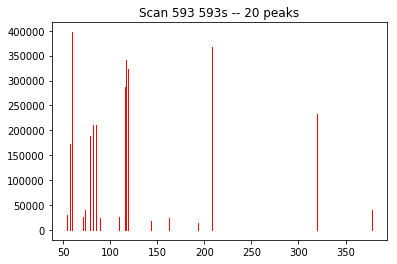

53.98700815281243 29130.155783243466
57.06380554593719 171611.02022431066
59.10656004154371 396931.1102123286
70.35437479979093 26409.045730046775
73.4046442117165 39105.113687006415
78.4335738672509 188979.279645119
81.60843062164244 210433.83463519218
84.35936739085615 210928.09614311578
88.39951728405285 24737.192949898126
109.16229326476919 26605.929429250096
115.08849163855191 149767.8184798919
115.54746497926526 286765.30998143594
116.28307892322252 341476.0975092281
118.42916219082782 323393.0772057766
142.96570434167455 17718.86126173454
162.81448427364464 23085.228942616093
193.39786276315758 14342.539675064998
207.5161696127593 367549.22622638755
319.95360098756845 232492.9926743565
377.6799880662645 40794.64101414028
Scan 594 -- num_peaks=4 rt=594.00 ms_level=2


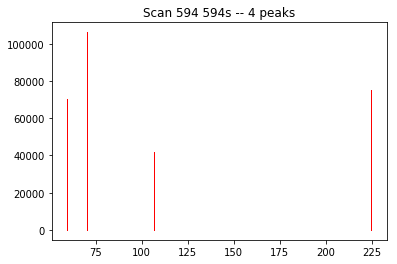

59.4845559300982 70317.46662778252
70.1516862424781 106145.94878879892
106.96041336803646 42049.84886790589
224.81803956378812 75253.10261969735
Scan 599 -- num_peaks=23 rt=599.00 ms_level=1
Scan 600 -- num_peaks=20 rt=600.00 ms_level=2


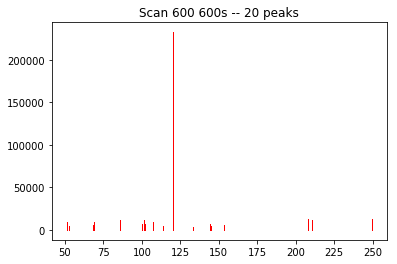

51.46424037294196 8824.451838108253
52.8497032442704 4464.471039606681
68.28246983088508 5912.028837394336
68.69478494089199 9118.813222530805
85.61296544262143 12127.257831682118
86.11761405406885 5767.36406250651
100.10671888366073 6490.739315688151
101.43287471688664 11563.764515031819
101.78270950326633 6731.050323366706
107.20588008572453 9106.884561603109
113.74396151095979 4832.25967517558
120.04431279376551 10753.311605558121
120.22400243288745 232668.25126962576
133.3499918278275 3991.56882813809
144.40504393992617 7143.087568655199
145.22951702657824 5121.448777379394
153.67581884683008 6015.576164449276
208.22404693835486 12511.666112413552
210.84597732522695 12062.466249820287
249.27150704560876 12385.758819998113
Scan 602 -- num_peaks=6 rt=602.00 ms_level=2


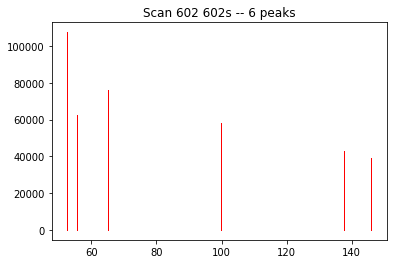

52.49409595304137 107557.66065311494
55.5916245508834 62698.970001063426
65.05496239146296 76321.10365188685
99.8686232031132 58035.07443917289
137.7151553861589 42895.339171973
146.08433221475153 38996.68120973831
Scan 603 -- num_peaks=14 rt=603.00 ms_level=2


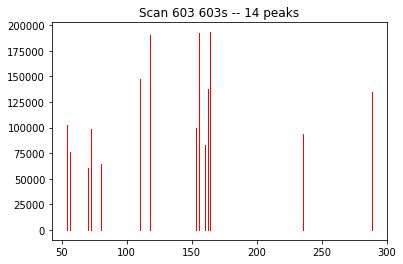

54.370184816683796 102223.4594333994
56.49361669077882 76057.5919532446
69.9124468708839 60706.53710911747
72.31150803075393 98831.05558768267
80.51398487965513 64592.70453058303
110.00639514896133 147371.77451989028
118.01288237977407 190850.36152769232
153.5840161856819 99836.54560667236
155.5841034229632 192865.07915604327
160.10552415944483 83392.04639171045
162.48004243435022 137264.87744008962
164.34611878780248 193161.26189884113
235.34746632821012 93254.4929949239
288.2308570549361 135048.50091929745
Scan 604 -- num_peaks=5 rt=604.00 ms_level=2


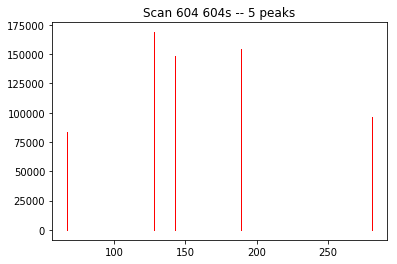

67.18868777326612 83376.74038205144
127.77545758251368 168634.1099344046
143.01536972219566 148551.26150089517
188.84030401147484 154510.60865404582
280.55707935034053 95919.10487017584
Scan 606 -- num_peaks=3 rt=606.00 ms_level=2


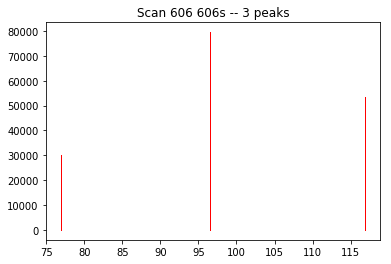

76.9293827115352 29986.878418821758
96.55930892681643 79482.02855229012
116.90296305846859 53410.23361901921
Scan 610 -- num_peaks=12 rt=610.00 ms_level=1
Scan 611 -- num_peaks=11 rt=611.00 ms_level=1
Scan 612 -- num_peaks=10 rt=612.00 ms_level=1
Scan 613 -- num_peaks=11 rt=613.00 ms_level=1
Scan 614 -- num_peaks=10 rt=614.00 ms_level=1
Scan 615 -- num_peaks=5 rt=615.00 ms_level=2


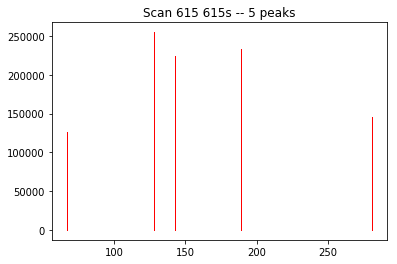

67.18868777326612 125985.77195802286
127.77545758251368 254813.25392655414
143.01536972219566 224467.2227502583
188.84030401147484 233472.04769322468
280.55707935034053 144937.81379816422
Scan 616 -- num_peaks=14 rt=616.00 ms_level=2


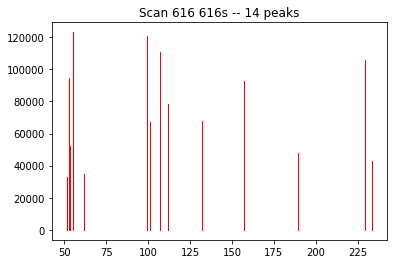

51.77519281008267 32874.05077674428
52.88379742386728 94289.94750358407
53.306400395522466 52222.433813895004
55.42819865443897 123028.75330752846
62.00543894085828 34777.610466353275
99.55618549968568 120642.38773829273
101.44995117865551 67063.7135951421
106.87552240665576 110874.40321151087
112.17938559405636 78159.03983709426
132.29185808140528 67877.90382807922
157.40630158484709 92944.93013731415
189.4615590819523 47983.7394023076
229.35196735292942 105767.13742315669
233.22029158281455 43119.28470607928
Scan 617 -- num_peaks=11 rt=617.00 ms_level=2


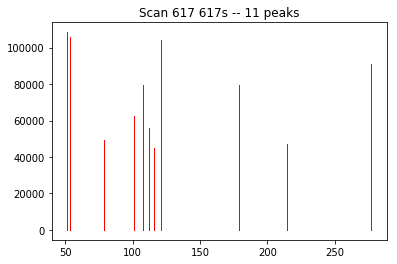

51.463384038297306 108453.047150264
53.9082084760459 106085.83327788791
78.5264999458044 49313.60647918989
101.04155344378796 62658.983521613736
107.86541271723993 79264.03351437744
111.90313753244301 55914.83348425771
115.8576955336522 45144.28093437273
120.75637771771271 104415.13991086248
178.76522994627547 79428.29018692428
214.39991337943923 47045.861125912365
277.04331563902156 91202.85819244223
Scan 618 -- num_peaks=3 rt=618.00 ms_level=2


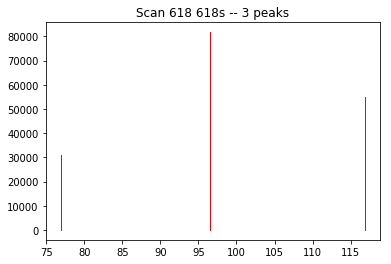

76.9293827115352 30834.781712625754
96.55930892681643 81729.44733548064
116.90296305846859 54920.45126741513
Scan 619 -- num_peaks=25 rt=619.00 ms_level=2


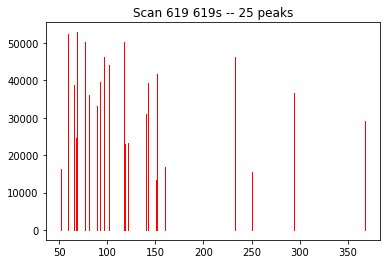

51.521715240792744 16331.456768178861
58.62746748557604 52247.02759120878
64.78878447093956 38654.57480062362
67.78586644343096 24588.06147758089
68.26880265750648 52832.6873386753
68.81195234705942 14331.782260091151
76.62641658213478 50317.50163698128
81.10227854056463 35929.93618098956
89.31447714388673 33190.22499632913
89.40198658654215 20973.796756981643
92.61180500983623 39574.80487153681
96.18976328391014 46175.81448954644
102.12542096871844 44044.21848971708
117.40227635130002 50352.99991935945
118.75461759800982 23007.991253193602
121.2522767456779 23115.68037734555
140.15349858923943 31090.67347364913
142.1932449107598 39217.24827746955
150.34269918363125 13403.695602722775
152.02700719937974 41653.36687357873
159.45284509505822 16864.720247033772
232.87448410626786 46338.73573010877
250.10670874664575 15549.469532176894
293.89085487587664 36666.98119652772
368.20406898053864 29057.42951757695
Scan 622 -- num_peaks=56 rt=622.00 ms_level=2


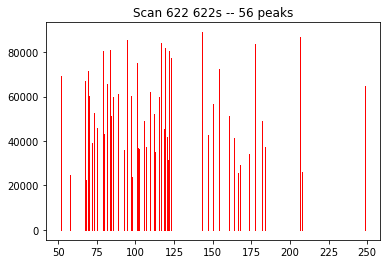

51.74910485789023 69445.01090437193
58.01682352600044 24839.07127195561
67.17594563654465 67180.81629766857
68.33993421406933 22442.17159475445
69.46622390678823 39015.03906998281
69.48893199347145 67783.56305706943
69.61295697108334 71395.1585599218
69.8595387245128 60450.58358972527
70.31434314148541 38348.65202221361
71.808439149432 39221.03806280559
73.05520812898762 52406.99996956068
75.39439685335115 45706.22639131266
78.95916065607571 80618.09817694897
79.53553455818215 41221.97383760421
79.86645763822354 43028.25468279378
81.89851478242205 65652.66893183814
83.73136511354082 81004.28920548977
84.17365092555636 51068.77399065493
84.21797990915574 40563.32080661013
85.62472504386345 59790.4686229223
88.96804554916864 60981.28207008988
92.70551333970086 36189.59609839653
94.4713475732843 85657.61784121917
97.4095123496787 60176.02668485659
97.54426381458292 24035.22015375027
100.84510811508508 74951.74481529671
101.47697530114402 36815.17874168499
102.05709333262598 36231.27833058

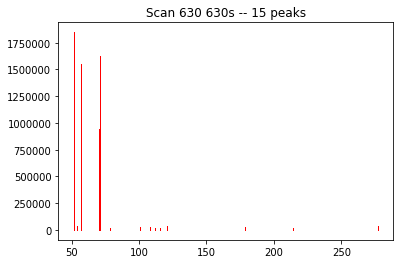

51.463384038297306 40236.287279243326
51.78718261497597 1847448.2961503325
53.9082084760459 39358.0464190454
57.120760553065914 1554075.0357371166
70.05340151751989 940039.8672625488
71.23168131324047 1624254.7133967965
78.5264999458044 18295.442029610225
101.04155344378796 23246.602357865486
107.86541271723993 29407.107565887312
111.90313753244301 20744.509834993332
115.8576955336522 16748.61430286578
120.75637771771271 38738.21599438224
178.76522994627547 29468.04710458898
214.39991337943923 17454.104179653637
277.04331563902156 33836.43428510403
Scan 631 -- num_peaks=97 rt=631.00 ms_level=2


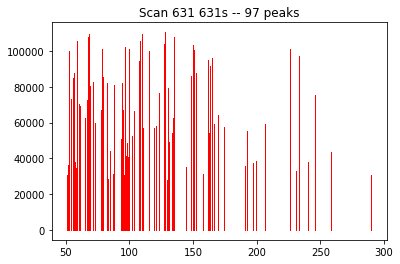

51.13982591495931 30708.544312164795
51.92443816361254 36321.384506989605
52.45672254933715 100233.19764909234
52.50131376712946 50507.61417550248
53.92256826723017 29488.441824393645
54.41969706629022 73342.63687337544
56.03307306175456 84929.6396079033
56.072626054151755 74651.21298487252
56.51127353300656 45859.18409462695
56.75458213956436 87673.90927785411
57.42971315132945 38230.14251084377
58.191267691080625 34530.25238422894
58.58098949126368 105803.81404650136
60.496365736653026 70377.72870775174
60.855634882730364 67362.21535368817
61.18349896010815 68997.57241932252
65.60119957809982 62716.631080487576
66.89357269470007 72809.56613484772
67.93347997118642 108081.91827531374
68.21666725169798 109527.7724465736
68.58115873591495 106403.71445174684
68.86030109071402 80495.17560434039
71.24029563456823 82759.92569206552
73.09531895076118 59670.410414390586
78.08741685409868 67013.59940350891
78.92651579374721 100879.62749756334
79.03617061229977 85671.29130587107
79.669451552400

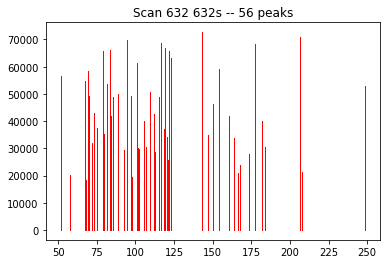

51.74910485789023 56702.459324968186
58.01682352600044 20281.319134754147
67.17594563654465 54853.724607837816
68.33993421406933 18324.229565862282
69.46622390678823 31856.120938249755
69.48893199347145 55345.872613333086
69.61295697108334 58294.77195731507
69.8595387245128 49358.43068535245
70.31434314148541 31312.010080194723
71.808439149432 32024.320919204503
73.05520812898762 42790.77424596596
75.39439685335115 37319.53396076197
78.95916065607571 65825.38289222095
79.53553455818215 33658.10249551713
79.86645763822354 35132.94661779493
81.89851478242205 53605.97890623693
83.73136511354082 66140.71124774034
84.17365092555636 41698.10101936068
84.21797990915574 33120.30652986256
85.62472504386345 48819.441036312135
88.96804554916864 49791.75064030406
92.70551333970086 29549.12201802491
94.4713475732843 69940.19481404712
97.4095123496787 49134.25256905633
97.54426381458292 19624.96765982769
100.84510811508508 61198.75576918083
101.47697530114402 30059.915722619702
102.05709333262598 29

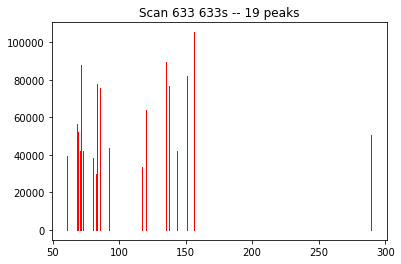

60.86971137507016 39343.55611737867
68.37214383847721 56677.497464577726
68.84245689831218 52294.59530078259
70.2448343432215 42322.1429604036
71.49125305415511 87841.69641658165
72.6657508410761 42129.555179731346
80.14493449586122 38521.26666558979
82.69014652295768 29829.48692079598
83.60917703431996 77655.44582438342
85.3771289135432 75723.87785473146
92.64209495358357 43545.665291651065
117.20278360423612 33591.50858838664
120.4994871018707 63709.188270927785
135.5169256758376 89356.3474720673
137.2192934753188 76502.84876229693
143.5466402024102 41959.36495907686
150.87777545339503 82051.46757553352
156.05486563461147 105374.69559115297
289.666197693495 50788.696963914335
Scan 634 -- num_peaks=41 rt=634.00 ms_level=2


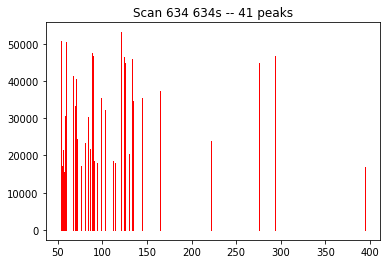

53.31203388750037 50596.53776475339
55.09768870583623 17239.31357845844
55.3359708320087 21484.74792750591
55.80509124243073 14886.165670283459
57.02318368960194 15586.855128082363
58.20010529360295 30643.270807273795
59.69298307003264 50438.281064751834
66.47688480685672 41275.66246355837
66.77557724759745 21620.405386406757
68.6911338114015 24962.507003394374
69.7834367550267 33260.27620055373
70.27123589283613 40468.752093822455
71.18657990637958 24335.742138756443
75.70224885453112 17131.61848974404
80.82818647235443 23243.842089674625
83.68989541102393 30323.47444295863
85.86762679593656 21692.762179674035
88.35035924373024 47599.91293608232
89.54209102527658 46828.083106689926
89.76962892578895 29454.62244065439
90.197012011657 18594.23613213242
94.12750931676311 17860.363225129637
98.00263042708197 35444.457726140674
102.6298193929045 32087.0782352524
103.15750696842744 19304.515127304257
112.12257821205662 18427.126510522437
113.57249991462695 17867.48817342183
121.318139387100

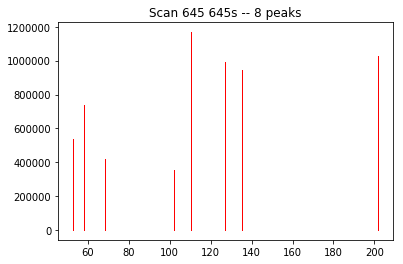

52.894505261987696 534585.7139337211
58.27169595395102 740773.4997349621
68.40835119130521 420476.58686288673
101.85206240205041 354405.58966632275
110.31449342105118 1167810.5497877712
127.10404788414364 993591.7635998463
135.1205078123216 944125.9462093039
201.68152564866247 1026834.698139014
Scan 646 -- num_peaks=11 rt=646.00 ms_level=2


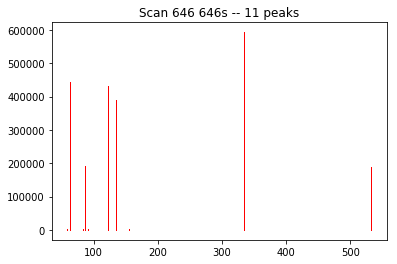

58.772019736201095 2491.018556002867
63.810569057207736 443938.8785600565
84.12762068392765 1346.61549928615
86.66222728754514 190636.76590783516
91.19032242667711 2255.6957299355818
122.89029405378609 432141.5767589289
135.0144489731766 390161.2725690176
154.77642177427217 2616.0197530181335
177.40029008186997 895.4875242979948
334.4084885485178 592892.8723859756
532.8029773955852 188978.3296239227
Scan 647 -- num_peaks=19 rt=647.00 ms_level=2


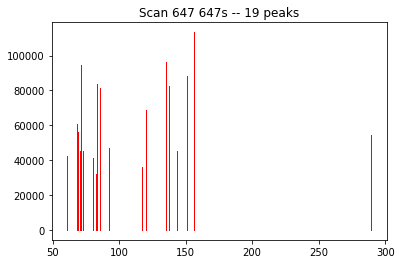

60.86971137507016 42340.497494483905
68.37214383847721 60994.828028078584
68.84245689831218 56278.06430872671
70.2448343432215 45545.97410132507
71.49125305415511 94532.91705359178
72.6657508410761 45338.71621084119
80.14493449586122 41455.571272529385
82.69014652295768 32101.70713759699
83.60917703431996 83570.742806037
85.3771289135432 81492.04029791905
92.64209495358357 46862.69656652555
117.20278360423612 36150.29564127975
120.4994871018707 68562.14822862193
135.5169256758376 96162.94457394294
137.2192934753188 82330.34824501087
143.5466402024102 45155.56198376247
150.87777545339503 88301.62547930026
156.05486563461147 113401.46837129573
289.666197693495 54657.45623331805
Scan 650 -- num_peaks=20 rt=650.00 ms_level=1
Scan 651 -- num_peaks=21 rt=651.00 ms_level=1
Scan 652 -- num_peaks=23 rt=652.00 ms_level=1
Scan 653 -- num_peaks=24 rt=653.00 ms_level=1
Scan 654 -- num_peaks=24 rt=654.00 ms_level=1
Scan 655 -- num_peaks=11 rt=655.00 ms_level=2


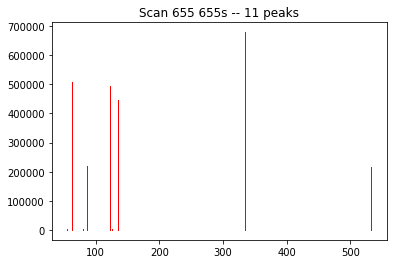

55.330009905903744 1942.591782793475
62.989744230326146 3210.241034131948
63.810569057207736 508509.82836974174
80.9354749440005 3752.6737647367277
86.66222728754514 218364.90065296603
122.89029405378609 494996.6079607167
126.35384317666059 3447.425467963982
135.0144489731766 446910.2647511223
162.9096101936277 1230.0839318171834
334.4084885485178 679129.1939929733
532.8029773955852 216465.24466241646
Scan 656 -- num_peaks=19 rt=656.00 ms_level=2


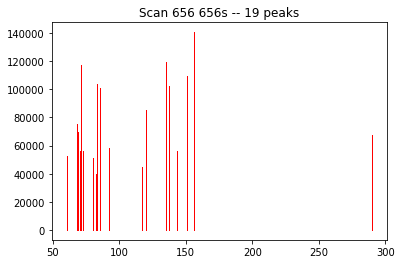

60.86971137507016 52493.58515585203
68.37214383847721 75621.15205603398
68.84245689831218 69773.32662615829
70.2448343432215 56467.72266446845
71.49125305415511 117201.54521165726
72.6657508410761 56210.765132858076
80.14493449586122 51396.457045940995
82.69014652295768 39799.57244232212
83.60917703431996 103610.68394621575
85.3771289135432 101033.51661043307
92.64209495358357 58100.19008794711
117.20278360423612 44818.99682217883
120.4994871018707 85003.08639444303
135.5169256758376 119222.44703164847
137.2192934753188 102072.8475633399
143.5466402024102 55983.691229981436
150.87777545339503 109476.01400058376
156.05486563461147 140594.70221205612
289.666197693495 67764.10299760246
Scan 657 -- num_peaks=9 rt=657.00 ms_level=2


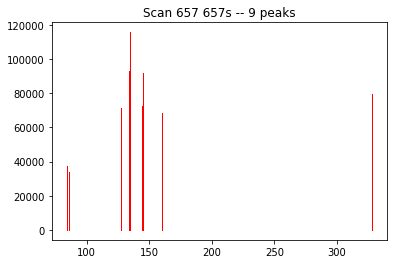

84.4696356050841 37128.31929930987
86.1530447902549 33816.005722882976
127.47953204919027 71029.66279684474
134.01751909675818 92934.61265352629
134.65180069026164 115621.62568096773
144.3474715177933 72606.62023211144
144.71512171707457 91603.83713340694
160.2322052765526 68508.55369747056
327.6254435463469 79631.68618543897
Scan 658 -- num_peaks=12 rt=658.00 ms_level=2


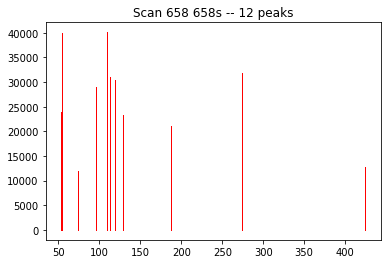

53.056827503062244 24004.508261851304
54.028478747676466 39940.46181577165
74.24560959941239 12036.20675547894
95.87551130485822 28944.343013640704
108.89972284187368 40125.59895846267
112.45111548194365 31017.34942035128
119.2851879277523 30515.181239641628
128.5910692899036 23392.539210598476
187.27372224849944 21008.52398501543
273.6118385388922 31778.468301617922
274.1401918757007 28866.993707359346
424.59267814289495 12759.244439114655
Scan 659 -- num_peaks=41 rt=659.00 ms_level=2


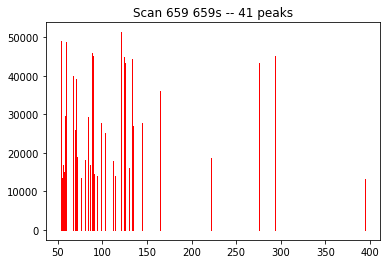

53.31203388750037 48908.741996062185
55.09768870583623 13489.225811483868
55.3359708320087 16811.1459297936
55.80509124243073 11647.960881953439
57.02318368960194 15066.909904662223
58.20010529360295 29621.074722477566
59.69298307003264 48755.76441199286
66.47688480685672 39898.79180138333
66.77557724759745 16917.293665189067
68.6911338114015 19532.384062570345
69.7834367550267 26025.129955418517
70.27123589283613 39118.79829133622
71.18657990637958 19041.960081863268
75.70224885453112 13404.9577596357
80.82818647235443 18187.582309882855
83.68989541102393 29311.946102920818
85.86762679593656 16973.91060175879
88.35035924373024 46012.078368880866
89.54209102527658 45265.99518496557
89.76962892578895 23047.324447445662
90.197012011657 14549.410499255815
94.12750931676311 13975.177812180587
98.00263042708197 27734.183954455304
102.6298193929045 25107.13909670486
103.15750696842744 15105.181685354486
112.12257821205662 17812.435712938593
113.57249991462695 13980.752862252686
121.318139387

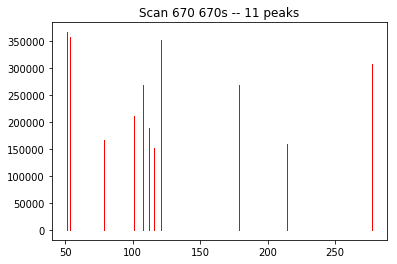

51.463384038297306 366329.46417258534
53.9082084760459 358333.55984130414
78.5264999458044 166570.02742311044
101.04155344378796 211647.64349376547
107.86541271723993 267735.6855197319
111.90313753244301 188867.45488310236
115.8576955336522 152487.00409710125
120.75637771771271 352690.3416743572
178.76522994627547 268290.50680342974
214.39991337943923 158910.1048854337
277.04331563902156 308062.2910147926
Scan 671 -- num_peaks=5 rt=671.00 ms_level=2


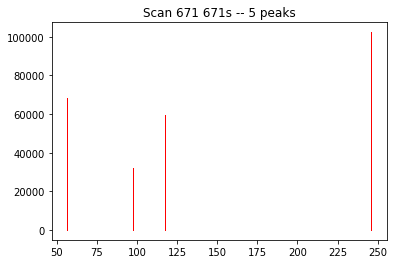

56.31988230214044 68595.34334965236
97.61288492422828 32150.24223193823
117.1645428354114 59346.57709202446
245.56338367506444 102408.8940263969
246.08929632912572 49433.01457672634
Scan 672 -- num_peaks=15 rt=672.00 ms_level=2


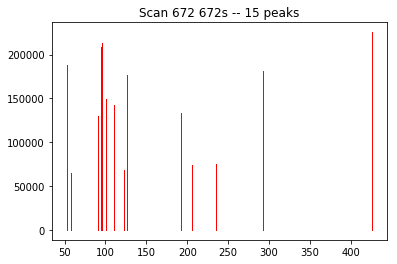

53.245853443172734 188607.14891727862
58.167322336923185 65388.11658525434
90.54193323881793 130077.10487611344
94.19718879731384 208895.25193693
96.14411401795762 212755.3427166641
100.12750041053783 149562.98544257015
110.02234594475587 141788.19985142525
110.44428849872423 142444.60969872604
122.98201447416872 68166.58785266979
126.66888552071826 176141.04693449018
192.78566658264637 133053.57960912943
205.3805441690509 73579.8279955116
235.3262895621813 75712.9270644466
292.32939909520593 181214.15960926597
425.31644201671156 225475.59988334804
Scan 673 -- num_peaks=11 rt=673.00 ms_level=2


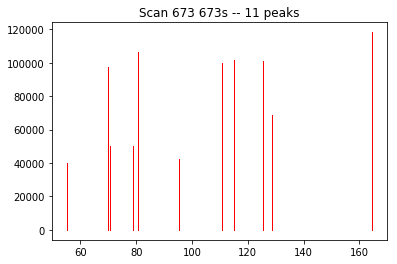

55.26720535592988 39834.39244035679
69.98049670608474 97435.78873961288
70.45020888287243 50105.29122661487
78.73361336272882 49890.3991133288
80.75503502601921 106273.76110063988
95.49064269831162 42356.01811124216
110.85996279477379 100070.05873237782
115.08792975593904 101783.94233215375
125.2851845668389 101269.22582994132
128.77398932536317 68826.42470263774
164.35759881423584 118186.40108739071
Scan 674 -- num_peaks=34 rt=674.00 ms_level=2


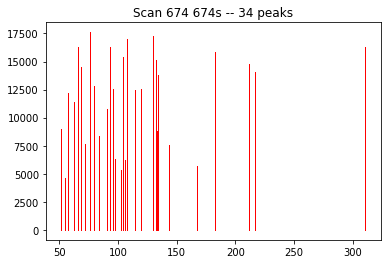

51.64003184612021 9000.353120291704
51.71188817543811 7516.376541309861
54.73807485913554 4643.046616930407
57.50801185562249 12197.643236995209
63.03005761034732 11367.258607404112
66.12698381390634 16312.516807738177
68.46530831734574 13576.545110407931
68.50288870225606 14493.683984427948
72.04716220289039 7641.57182791231
76.44323802867275 17608.970382114567
79.44548117162692 12797.391910595086
83.75804467958463 8335.364335996102
90.66313155953534 10812.725145511014
93.16521719934646 16265.656279474033
95.97167461216733 12517.500676473615
96.07308727081686 12015.959992468792
97.65091977956271 6340.3552419330745
102.52594196732741 5365.016859238336
104.21196283767502 15395.558258340916
106.30427055438962 6211.735256098772
107.59552651079638 16985.309025019946
114.8415724835789 12455.510853536764
119.55835223747106 12576.977463173322
130.30911303528313 17230.838598158043
132.49348118009732 15160.735707055572
133.1977904545607 8852.179968130307
134.1224045163529 13815.622500061008
143

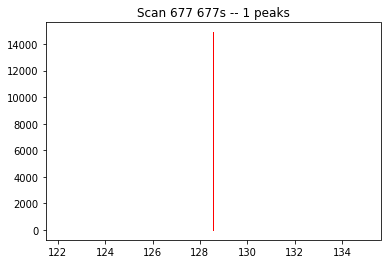

128.55876437874082 14890.528152272098
Scan 680 -- num_peaks=30 rt=680.00 ms_level=1
Scan 681 -- num_peaks=31 rt=681.00 ms_level=1
Scan 682 -- num_peaks=30 rt=682.00 ms_level=1
Scan 683 -- num_peaks=27 rt=683.00 ms_level=1
Scan 684 -- num_peaks=26 rt=684.00 ms_level=1
Scan 685 -- num_peaks=10 rt=685.00 ms_level=2


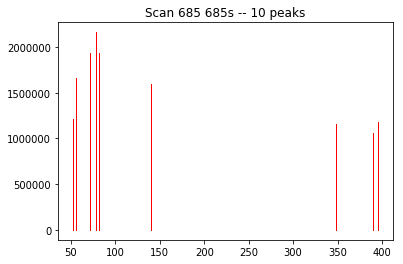

52.8303771007882 1209265.0626585989
55.610297512908716 1664502.2106406908
71.67666264158304 1291585.806096361
71.86008119400866 1939840.4334757593
78.79719651255898 2162055.2629521512
81.3291427312948 1937287.6817859
140.10394479461817 1593195.189644805
347.75329740759673 1159495.3462705906
390.1599954795591 1054836.7182152437
395.2416408136742 1184623.3404781865
Scan 686 -- num_peaks=2 rt=686.00 ms_level=2


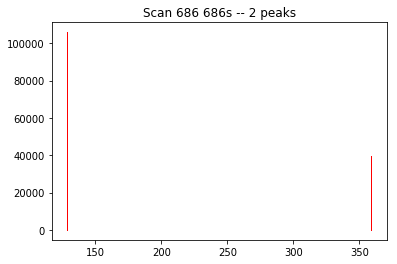

128.7105018041319 105949.63119737047
359.1269631156846 39807.15906827491
Scan 687 -- num_peaks=27 rt=687.00 ms_level=2


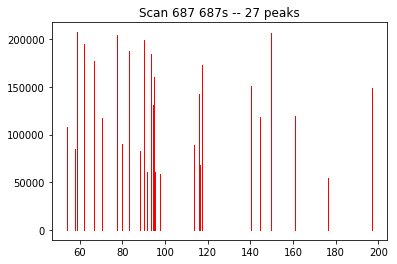

54.17456416990757 107686.96672302655
57.987629835532786 85142.64369649952
58.863251740763125 207476.88148946725
61.95352546625132 194729.2621559924
66.58445243076856 177710.22063370945
70.67187157238921 117103.7719119721
77.62187883519988 204198.77276739548
79.94936555414209 90636.59396440978
83.14444873769081 188011.00098702987
88.09701177031592 82821.14780121512
90.1066283101515 199836.03904281126
91.52768067338793 61245.46439675158
93.57591346784203 184116.77720042254
94.54315347306304 130717.95351168199
94.88280036302987 160067.0316079671
95.53359453693851 60477.17858173833
97.90023404287345 58200.45715848688
113.65813954487992 89259.50182400011
115.80894954108035 142533.64642428272
116.3940701263832 68466.28783665094
117.45935589193971 173273.0168755022
140.33890173699427 151060.17583448757
144.4193546709436 118961.96258887064
149.80614075303623 207137.3997739709
160.76955233538155 119473.65034254066
176.1900695452733 54076.66240593703
196.82003956972807 149139.11053340178
Scan 68

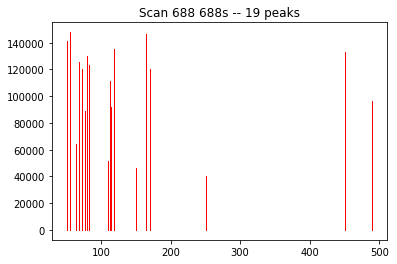

51.59661313196435 140954.43153239714
55.65171317372292 147846.8244672722
63.86935020301829 64522.31870531478
68.04331638627087 125313.27904666855
73.13907241968883 120333.14041791038
76.78062834500618 88883.38822381865
79.99015207579866 130448.97158684385
82.36227794651894 109297.34318591852
82.6136766798758 123618.45597142802
109.64937914730798 51390.27676319539
113.33776631560623 111635.9306993099
115.06716660294386 92156.69319740117
119.28098581004647 135333.76354528332
150.47378859596117 46409.97219114135
165.4986188367159 146402.70909838064
170.31758518299796 120459.56036218471
250.54420462621638 40294.50121679846
450.47813455555803 133028.8186379873
488.7023726187535 96692.97142806326
Scan 689 -- num_peaks=60 rt=689.00 ms_level=2


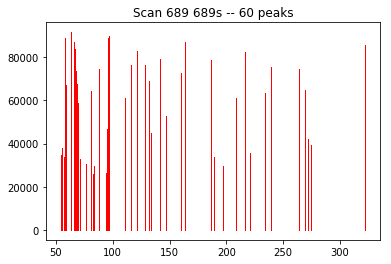

54.27220158371911 34804.7036725324
55.149271479365346 37990.922435342574
57.02430087211499 33799.7512011385
57.73059832337264 82182.66192024823
57.86686108381765 65214.00031965875
57.90215958883459 89037.61324913826
57.94295944223624 30550.12621082652
58.797103262214385 66971.36116462367
58.96192340225527 55926.42686156436
63.08185654081134 91580.71250615787
65.49619933200057 83338.50839938773
65.6971536003884 86983.58405709692
67.00957720923137 84000.04145233211
67.49561168035247 73768.1044658294
68.96302418596069 67522.4947494976
69.07001751211932 58912.15935731433
69.53276096887187 54691.487456598166
71.57198214681262 32822.365993807085
76.34141038660887 30530.459038418692
80.75543183962083 52300.65528529653
81.21314754788825 64212.33228335768
82.85363402607828 26094.020020356857
83.73981598537868 29781.219315583206
88.11519626738902 74752.40971316905
93.76799155218679 26391.586797450207
95.28337716021728 46615.89807765149
95.6044717895014 23159.55289847166
96.21312680975053 89142.0

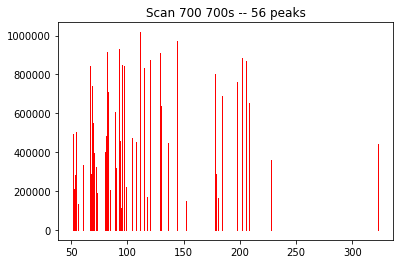

51.91257699746612 492538.2290921863
52.6036971659954 210607.05368847432
53.443661077164556 282699.6193558549
53.84996708319491 262203.2490257315
54.32994932088797 175151.35907492024
54.454862355608235 506000.2692462777
55.74417623085238 135439.74659247647
60.213530310118585 331762.2415599264
60.33017650687807 186867.42291358171
66.48739887865581 845444.1786845893
68.0694362894181 285932.1117010375
68.33225456374632 739021.630467617
68.5069751541823 315887.33879820595
69.11373227248686 552659.2650973098
69.92248646837783 351459.1723136094
69.95090268047352 397291.2786339072
71.66871580588074 321876.23073347897
73.155966663908 187884.50555680413
80.52484958174 401471.35745413316
80.67367035793775 233159.50722587152
81.08997102894429 480973.3944347349
82.06094507517473 470427.44552405144
82.17728499613234 917922.5649060073
82.7198935941159 709733.2347338037
84.97971459086966 203767.19138819483
89.22007895889655 608774.9261166843
90.1974697010499 317762.30181610666
92.89534338238404 930619

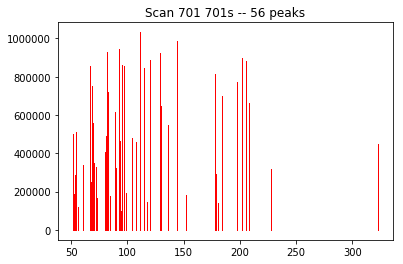

51.91257699746612 499812.9564603565
52.6036971659954 185125.57412162848
53.443661077164556 286875.056989782
53.84996708319491 266075.95786140166
54.32994932088797 215799.87431832697
54.454862355608235 513473.8292454111
55.74417623085238 119052.80667336093
60.213530310118585 336662.3279204306
60.33017650687807 164258.21616913468
66.48739887865581 857931.2823075362
68.0694362894181 251337.00610408853
68.33225456374632 749936.8865092476
68.5069751541823 320552.95485210954
69.11373227248686 560821.9725656954
69.92248646837783 308935.90653953474
69.95090268047352 349222.75755972444
71.66871580588074 326630.30196404335
73.155966663908 165152.24134520596
80.52484958174 407401.0386425174
80.67367035793775 204949.39215546145
81.08997102894429 488077.3106572484
82.06094507517473 579602.6028924956
82.17728499613234 931480.1651294264
82.7198935941159 720215.9048736105
84.97971459086966 179113.27105259115
89.22007895889655 617766.4548031773
90.1974697010499 322455.6108367182
92.89534338238404 94436

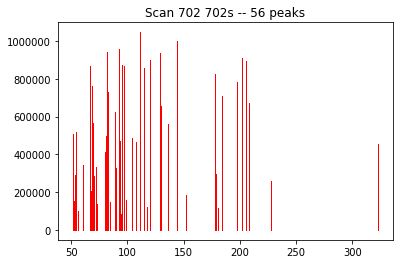

51.91257699746612 507087.68382852664
52.6036971659954 152064.3577059986
53.443661077164556 291050.4946237091
53.84996708319491 269948.6666970718
54.32994932088797 219363.27216945926
54.454862355608235 520947.3892445445
55.74417623085238 97791.39735705472
60.213530310118585 341562.4142809347
60.33017650687807 134923.66064605414
66.48739887865581 870418.3859304832
68.0694362894181 206451.21875952443
68.33225456374632 760852.1425508781
68.5069751541823 325218.57090601313
69.11373227248686 568984.680034081
69.92248646837783 253763.64353306414
69.95090268047352 286855.74414341775
71.66871580588074 331384.3731946078
73.155966663908 135658.02360383194
80.52484958174 413330.7198309016
80.67367035793775 168347.8786128122
81.08997102894429 495181.22687976196
82.06094507517473 589173.2973898019
82.17728499613234 945037.7653528457
82.7198935941159 730698.5750134172
84.97971459086966 147125.78015470743
89.22007895889655 626757.9834896702
90.1974697010499 327148.9198573297
92.89534338238404 958110.2

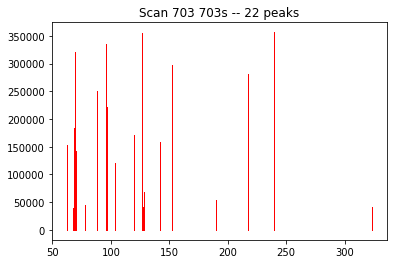

62.642572743686735 152684.69154723128
67.42557596448871 39690.59110539093
68.533895837512 36159.69586459305
68.83062073706321 184268.02167456082
68.95214291729661 321724.28451069427
69.6129213154809 207317.34866964095
70.60475736279709 142531.84103175462
78.25294157619219 45125.18539659116
88.21894999562691 249905.54063791336
95.73799309636094 335249.184161422
96.43048253628834 221160.17052224439
103.43817609455161 119814.98435044804
119.90117368305249 170790.7759889709
126.81282369031409 355903.31275426096
127.43274778073045 42185.65457594479
128.17813160695846 68830.06688381646
142.026452380105 157730.6915116341
151.92630763416904 297160.63119483064
190.30054553242945 54191.993358194246
217.52328986639006 281984.55008116295
239.97759684634207 356523.37387848296
323.00502646964844 40929.671416347905
Scan 705 -- num_peaks=28 rt=705.00 ms_level=1
Scan 706 -- num_peaks=27 rt=706.00 ms_level=1
Scan 707 -- num_peaks=24 rt=707.00 ms_level=1
Scan 708 -- num_peaks=27 rt=708.00 ms_level=1
Scan

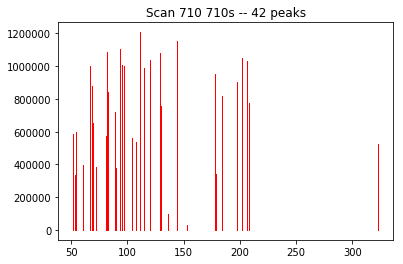

51.91257699746612 584774.6038195713
53.443661077164556 335640.05420140136
53.84996708319491 311305.3810093763
54.32994932088797 37583.03813959537
54.454862355608235 600757.6458104876
60.213530310118585 393890.5082110643
66.48739887865581 1003768.348201272
68.33225456374632 877416.3215052867
68.5069751541823 375042.75300174876
69.11373227248686 656154.3525061206
71.66871580588074 382153.1694159679
80.52484958174 476653.8719905237
81.08997102894429 571044.0521474406
82.06094507517473 100941.79525880962
82.17728499613234 1089819.576481014
82.7198935941159 842643.1627936899
89.22007895889655 722778.649875201
90.1974697010499 377268.83554967627
92.89534338238404 1104894.736854676
93.49154264351522 542599.5315879826
95.11041604410532 1009064.2889780088
96.57551980964084 488160.50622977916
97.25590554341792 998925.5811416517
104.07657965826088 562687.6116667863
107.67292319433044 539448.3624036277
111.27563706378798 1207538.0054260555
114.82334931636268 987237.743654101
120.20649113974383 103

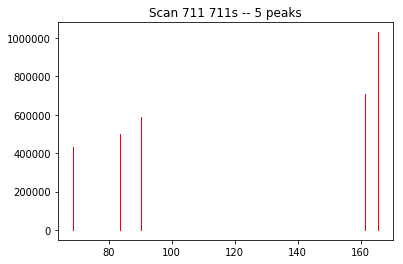

68.80769482740973 432114.0940860715
83.63590668592961 498496.25390976825
90.25274041760557 588865.7735985329
161.39463475281346 707347.8993119397
165.39614768887702 1030496.8198116113
Scan 712 -- num_peaks=19 rt=712.00 ms_level=2


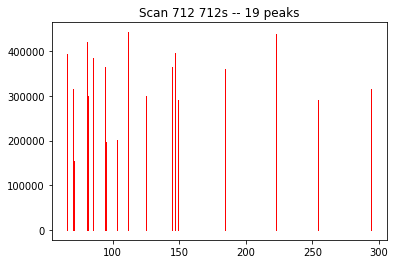

65.71659216376472 393590.50352920353
70.49200129521351 315297.9198236188
70.766882464569 155002.41066173775
80.98466490394199 419378.27274641686
81.28555185423318 199199.01283744114
81.537230620834 299186.54862417217
85.11926675766158 384241.1254985734
94.23069311569166 364334.1336139055
95.22703445732054 196069.82316160828
103.4383953775313 201124.45189021935
111.70310861192227 442294.93826516654
124.99237835609738 299405.1872005709
144.57552651242057 365476.3063313206
146.48548915314345 395219.6436582709
148.74766680176762 290989.90258570027
184.3027794389566 360414.1665125265
223.11872147787855 437568.7615795381
254.26996743887057 290294.95509167074
294.4422632395091 315150.4938562822
Scan 713 -- num_peaks=42 rt=713.00 ms_level=2


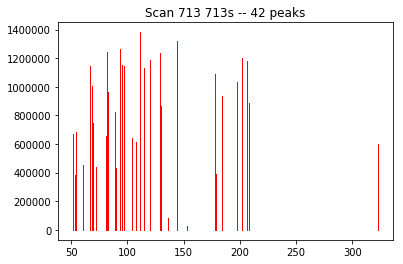

51.91257699746612 668749.5820579588
53.443661077164556 383838.73804197105
53.84996708319491 356009.54980365117
54.32994932088797 33505.91321767957
54.454862355608235 687027.8256438208
60.213530310118585 450454.0912382391
66.48739887865581 1147911.7919247474
68.33225456374632 1003415.3235535123
68.5069751541823 428899.7550262487
69.11373227248686 750379.6268474215
71.66871580588074 437031.24359331076
80.52484958174 545102.4644331556
81.08997102894429 653047.291581959
82.06094507517473 89991.31521555239
82.17728499613234 1246320.1745251094
82.7198935941159 963648.6592638461
89.22007895889655 826571.326571483
90.1974697010499 431445.50814861304
92.89534338238404 1263560.1626051215
93.49154264351522 620518.0724405515
95.11041604410532 1153968.2419790304
96.57551980964084 558261.4778173452
97.25590554341792 1142373.5923757732
104.07657965826088 643490.8470263503
107.67292319433044 616914.3881128351
111.27563706378798 1380943.2406489009
114.82334931636268 1129007.3545400198
120.2064911397438

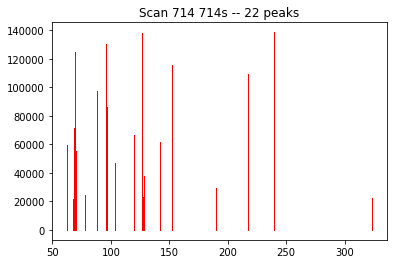

62.642572743686735 59358.22725562759
67.42557596448871 21677.186411638457
68.533895837512 19748.772845523872
68.83062073706321 71636.6715986062
68.95214291729661 125074.64238962387
69.6129213154809 80597.40745233788
70.60475736279709 55411.17007469433
78.25294157619219 24645.313371732344
88.21894999562691 97154.13983750311
95.73799309636094 130332.62902169638
96.43048253628834 85978.99061604244
103.43817609455161 46579.68652674875
119.90117368305249 66397.21108636679
126.81282369031409 138362.19928415745
127.43274778073045 23039.876017758215
128.17813160695846 37591.83597453093
142.026452380105 61319.92760412821
151.92630763416904 115525.1918129074
190.30054553242945 29597.18939243244
217.52328986639006 109625.28618080764
239.97759684634207 138603.25638523928
323.00502646964844 22353.915433090522
Scan 719 -- num_peaks=5 rt=719.00 ms_level=2


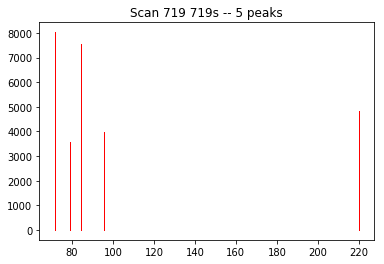

71.48430350988359 8026.581335611739
79.22511656996853 3584.3080123937953
84.43193782075079 7547.363100808625
95.61918092632828 3959.1350706697335
220.07233808672203 4837.938165930769
Scan 725 -- num_peaks=28 rt=725.00 ms_level=1
Scan 726 -- num_peaks=30 rt=726.00 ms_level=1
Scan 727 -- num_peaks=29 rt=727.00 ms_level=1
Scan 728 -- num_peaks=27 rt=728.00 ms_level=1
Scan 729 -- num_peaks=28 rt=729.00 ms_level=1
Scan 730 -- num_peaks=5 rt=730.00 ms_level=2


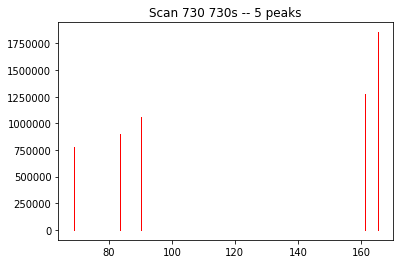

68.80769482740973 777633.9129500894
83.63590668592961 897095.4611853046
90.25274041760557 1059724.7393522798
161.39463475281346 1272945.5537023174
165.39614768887702 1854485.3899468232
Scan 731 -- num_peaks=9 rt=731.00 ms_level=2


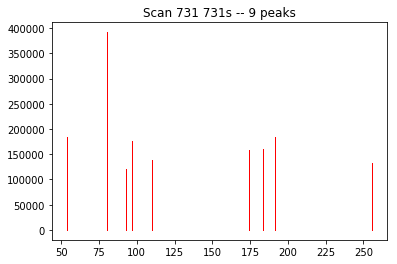

53.89041475884425 184580.9522349959
80.01763802859729 392043.20262382785
92.54139848364143 120721.05531887153
96.7871341080743 177159.19339840868
110.22906001299155 138082.7107795031
173.9936103773097 158990.42416571573
183.45833543790013 159513.31020955046
191.8226681953591 183832.04039995722
255.4592434746827 132623.3927516578
Scan 732 -- num_peaks=5 rt=732.00 ms_level=2


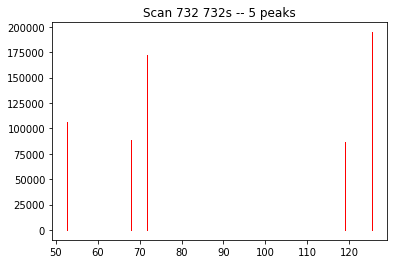

52.72098995683339 106015.07945405568
68.03136216162501 88960.43399582822
71.83996803148594 172283.39486251143
119.05864629134345 86126.5226110044
125.4193369645782 194702.2618522026
Scan 733 -- num_peaks=23 rt=733.00 ms_level=2


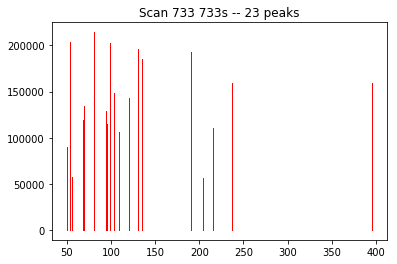

50.43541403698402 89386.97761439512
53.734256160541484 203793.09514132526
54.0114368488134 188495.10908083653
55.97059279218087 57666.4435156009
67.82037603887208 118839.80655631082
69.05608242991559 134275.5640830387
69.70508611515908 103910.04293848237
80.39685351472215 214356.09578297104
80.67027291423604 114838.43940644409
93.92248679338154 128506.79022563522
95.5633917655032 115370.75980631605
99.10859989311365 202150.88821760667
103.7138616750231 148347.93236590165
109.51161763556279 105781.59228027126
120.74997896225133 129810.2466930056
120.97211924555843 142549.96981986234
130.8129038051681 195665.10197954418
134.82646472377292 185059.00482969297
190.17457917516253 192771.89386447772
203.76137343371406 56530.49577372708
215.26084320204532 110692.24025656994
237.21592959816468 159220.07134358108
395.113533203874 159100.112115186
Scan 734 -- num_peaks=6 rt=734.00 ms_level=2


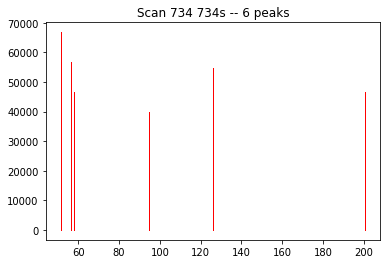

51.41350975193915 66806.89715174031
56.37537942342005 56907.71522389129
57.69128420988519 46446.453307250325
94.4684549054634 40008.72236889891
126.00752098918649 54808.380112200815
200.75663620196386 46672.69495496162
Scan 737 -- num_peaks=32 rt=737.00 ms_level=2


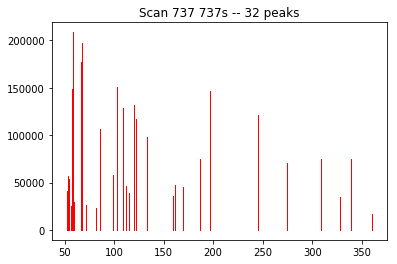

52.660489548693576 41478.39153024971
53.091456924162614 56666.87904864042
54.725107865722244 53703.74795054895
56.05476041689694 24827.88019445781
57.66431168080789 149120.42025718215
59.00085070916307 208445.22263347945
59.193285258727954 29756.41573745393
66.29899626531895 176981.6772590313
67.16472388466643 178785.29699644694
67.39982639429908 196990.1466870877
71.88153428995675 26352.364114680273
81.51281474610832 23080.74094697916
85.45097448479649 106056.0582560839
99.28968905112501 58143.45920006678
102.7738006710636 150823.2089519915
109.01887320019975 129083.80542894432
111.54657199206346 46127.89218433902
114.97888084937259 39176.40922573924
120.17806528296099 131957.43349450917
122.23611686487779 116570.80558208289
133.5729457621997 97525.91834478619
159.5289209140136 35991.39093771576
161.23093629140016 47176.702828852685
169.7334471652976 45166.61329799462
187.0560733449973 74984.4268160028
197.24798175567767 146719.54332193636
245.08368380778353 121055.49057506479
274.016

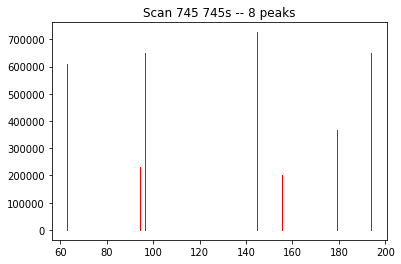

62.91508483435134 608432.7165916382
94.35720613061567 229556.51487132354
96.43577897653823 344336.4201299856
96.4807594193337 649840.2699211319
144.6670932200344 725987.2443922728
155.3220557324871 203193.18120732295
179.06170534511412 367426.84826104913
194.01365044710298 648906.3284964684
Scan 746 -- num_peaks=9 rt=746.00 ms_level=2


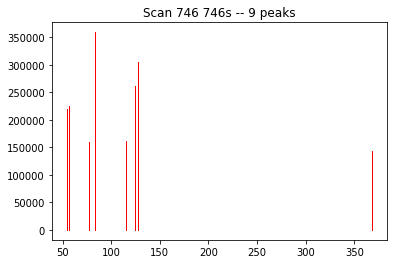

54.60050209017831 219909.9005156303
56.67893673438143 225224.12496591755
77.31967639423797 159661.30037011259
82.76639191605983 336446.6021734701
83.20032267114439 359126.73095152376
114.94941107049874 161298.93278284025
124.53523680655513 261104.8952245762
127.18054012978014 304713.94561835495
367.80665920420904 143228.19323839888
Scan 747 -- num_peaks=11 rt=747.00 ms_level=2


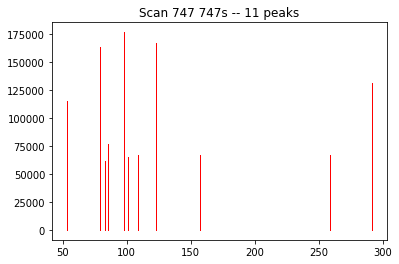

53.61016664158927 115063.39706955933
78.80134768276746 162930.60748724148
83.057469784928 61576.84528958554
85.4982774893779 76414.77991592411
98.23983032105002 176447.04239088856
101.18412343314601 65055.79102034881
108.71810619696949 67146.4131073242
122.72442776324566 166776.86616269746
157.10462144377968 67249.9222333472
258.5609407019023 66588.93607908851
291.3112703339164 130852.63464674138
Scan 748 -- num_peaks=32 rt=748.00 ms_level=2


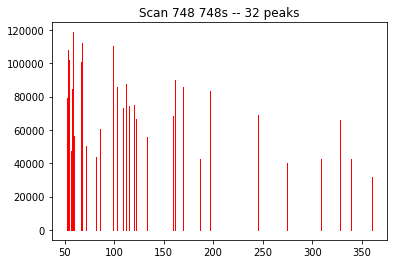

52.660489548693576 78876.50157508055
53.091456924162614 107759.36601291048
54.725107865722244 102124.5907455202
56.05476041689694 47213.41062215179
57.66431168080789 84816.53888481401
59.00085070916307 118559.23085755059
59.193285258727954 56585.655474907624
66.29899626531895 100663.43217951903
67.16472388466643 101689.29291226172
67.39982639429908 112043.82610775183
71.88153428995675 50112.413064108056
81.51281474610832 43891.000409954126
85.45097448479649 60322.44124267745
99.28968905112501 110567.27327119402
102.7738006710636 85785.04905462732
109.01887320019975 73420.1364486599
111.54657199206346 87718.1256626047
114.97888084937259 74498.98585740599
120.17806528296099 75054.595271557
122.23611686487779 66303.00697540201
133.5729457621997 55470.67820290262
159.5289209140136 68442.26353178904
161.23093629140016 89712.57413087791
169.7334471652976 85890.13010165004
187.0560733449973 42649.55491559297
197.24798175567767 83450.97089898934
245.08368380778353 68853.80088033718
274.0162785

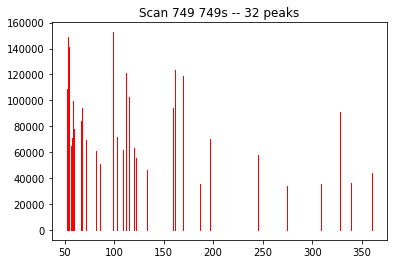

52.660489548693576 108837.18794919978
53.091456924162614 148691.00603897788
54.725107865722244 140915.90087353517
56.05476041689694 65147.093785778525
57.66431168080789 71100.65447379403
59.00085070916307 99386.73540227152
59.193285258727954 78079.32016722305
66.29899626531895 84384.90892987442
67.16472388466643 85244.87528143737
67.39982639429908 93924.95226465163
71.88153428995675 69147.26198974036
81.51281474610832 60562.68933719762
85.45097448479649 50567.555670198075
99.28968905112501 152565.47719212392
102.7738006710636 71912.54455848341
109.01887320019975 61547.19140502011
111.54657199206346 121037.24098621297
114.97888084937259 102796.9035628339
120.17806528296099 62917.33800079517
122.23611686487779 55580.98988139289
133.5729457621997 46500.38278133219
159.5289209140136 94439.57770600931
161.23093629140016 123789.26672850356
169.7334471652976 118514.89412162054
187.0560733449973 35752.59386182779
197.24798175567767 69955.91573772686
245.08368380778353 57719.28883173036
274.016

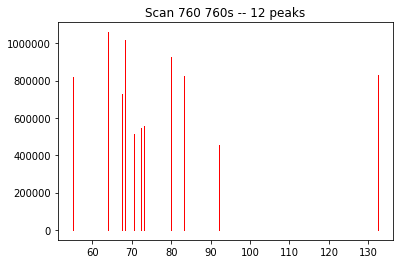

55.17775777447748 819923.0448453616
64.04840255351618 1059366.2697709945
64.05845764557397 478903.5458093751
67.48379307406819 727035.0440193998
68.30255951184631 1015679.2831199252
70.58035672349864 514284.5297456966
72.35806456232795 545104.4614135803
73.112280405169 559382.247874721
80.06768829768349 925661.0227780758
83.16740350868012 822462.0289385342
92.1082827966861 454196.26432023576
132.35567925718013 829320.8210301481
Scan 761 -- num_peaks=11 rt=761.00 ms_level=2


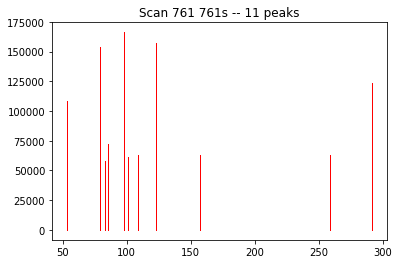

53.61016664158927 108441.02881258607
78.80134768276746 153553.28584897457
83.057469784928 58032.8464507212
85.4982774893779 72016.7973622464
98.23983032105002 166291.7947419786
101.18412343314601 61311.56465160187
108.71810619696949 63281.86290233815
122.72442776324566 157178.17663499608
157.10462144377968 63379.414655574146
258.5609407019023 62756.470953022465
291.3112703339164 123321.5313063625
Scan 762 -- num_peaks=35 rt=762.00 ms_level=2


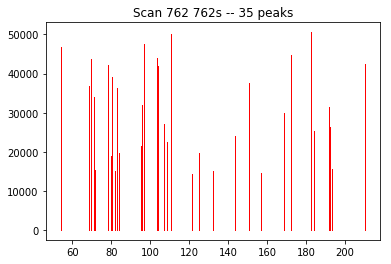

54.11771808895037 46824.451282913054
68.42124356172296 36824.576799245886
69.41758763647454 17566.6965809632
69.70598867038778 24735.01344938623
69.86635516652002 43629.00990594417
71.34690299965224 34020.135118008766
71.5524933426202 15222.499616488923
78.44113628635161 42267.21053006277
79.885909973239 18915.402846830028
80.18946997948932 39143.11920596327
81.98095921447653 14981.88001626467
82.91291234243693 36408.217669540674
83.73913646946993 19568.78797630339
95.41198899606825 21529.833483309063
95.71912443727786 32008.450614315538
96.64807011992346 47477.266956739906
103.23799642082092 44065.623215182146
104.0539539058783 41881.541081588235
107.15379747945423 27200.867542401575
108.55808781412547 22541.92557703829
110.65583709925535 50131.46806949795
121.4537142500578 14228.743517481886
125.09888567247725 19703.371686349536
132.03300570959038 15004.795877200575
143.56161988014307 23928.56601415939
150.81433278564796 37554.58037346678
156.93893764557978 14499.534886372461
168.683

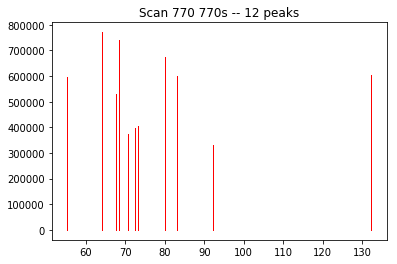

55.17775777447748 596714.5317565441
64.04840255351618 770973.8756571942
64.05845764557397 348531.12970874755
67.48379307406819 529113.5291171818
68.30255951184631 739179.8433425348
70.58035672349864 374280.3111659289
72.35806456232795 396710.1004121117
73.112280405169 407101.0300441558
80.06768829768349 673667.3487162177
83.16740350868012 598562.3255389235
92.1082827966861 330549.93745240656
132.35567925718013 603553.9414437243
Scan 771 -- num_peaks=20 rt=771.00 ms_level=2


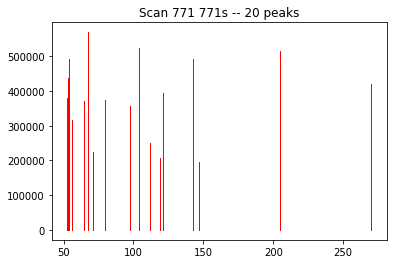

52.48460891642481 379984.56515752734
53.447545223147344 436154.6775746604
53.57456533073429 492589.2107665553
55.73342042836969 316552.7838722232
64.55740370666413 370911.8120165953
67.32436180290554 569341.8380539329
67.36544284849573 568525.1415463877
67.69914666595696 551285.9991830842
70.9077058788745 225816.10088472484
79.98753642286475 375358.45924145303
97.41986187723943 356319.2957791799
97.79506670973164 149371.00778193408
104.08188712132495 524669.1894902474
111.61313148772484 249017.32629160638
119.18844694299635 207873.04072525658
121.31350266011772 394372.42892871785
142.90924244557257 491930.0530392549
147.1780516634429 195950.3070544744
204.9614934763241 515449.25559108827
270.2187179369183 421060.44240869983
Scan 772 -- num_peaks=22 rt=772.00 ms_level=2


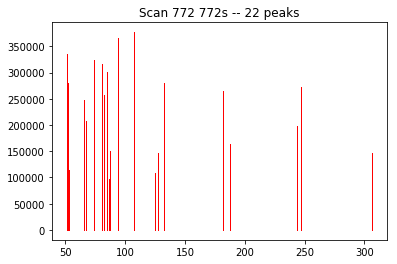

51.61179930184315 335812.9300886221
52.14758212208134 280318.5475711427
53.059899806073496 114140.15483053836
65.96974007449134 248414.1499393136
67.64566249003353 208465.69353582282
73.91422855941673 324391.5807286468
80.75286424031918 316119.9425460404
82.23548543982795 256723.86987105434
84.84424235469965 300110.371065888
86.54900115370182 97751.85697550754
87.81263020616558 151027.75642030907
93.7999828689788 366246.18261302885
107.70956837950008 376733.9375039458
125.29885661958572 108794.49164409371
127.88814614324643 147019.9803513359
132.39194062589485 279882.8613584683
181.5163698932779 264471.5447582819
187.8156308586777 163029.63629074977
243.48091414218848 99949.84007546256
243.57695096879013 198360.18362986358
247.36532323587846 271789.02614749706
305.91673169027655 147347.89004232312
Scan 773 -- num_peaks=5 rt=773.00 ms_level=2


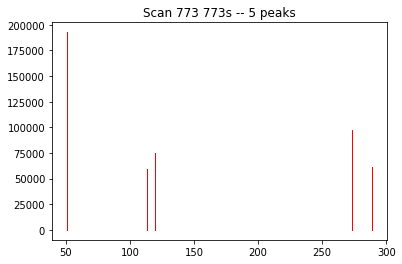

51.20412350287791 192693.03537324863
113.29119767192162 59724.97544452587
119.94767558755157 74817.33512448121
273.6044935585887 97128.69910493094
288.5683562054857 61168.74624151257
Scan 775 -- num_peaks=29 rt=775.00 ms_level=1
Scan 776 -- num_peaks=29 rt=776.00 ms_level=1
Scan 777 -- num_peaks=28 rt=777.00 ms_level=1
Scan 778 -- num_peaks=27 rt=778.00 ms_level=1
Scan 779 -- num_peaks=26 rt=779.00 ms_level=1
Scan 780 -- num_peaks=9 rt=780.00 ms_level=2


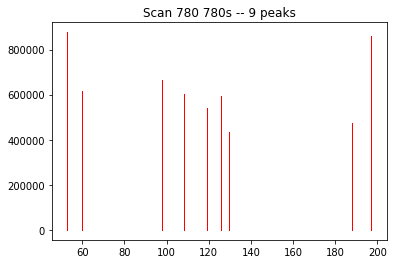

52.79416199468403 876622.7715451313
59.918000457951386 617411.0625495987
97.654762756173 663079.173037369
108.19590438858343 604124.005490417
119.19818572755185 540283.8212615476
125.79067505551757 592624.8067507821
129.38299181743534 435105.7655438942
187.87472772505768 472785.05274465814
197.14478720433587 861884.3920105121
Scan 781 -- num_peaks=22 rt=781.00 ms_level=2


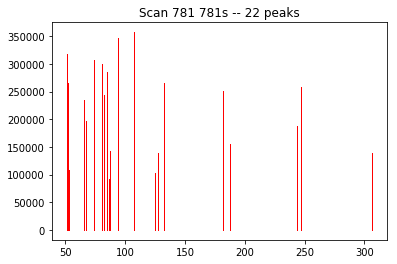

51.61179930184315 318601.1625683334
52.14758212208134 265951.09104960196
53.059899806073496 108290.011391587
65.96974007449134 235681.92251621452
67.64566249003353 197780.98567735107
73.91422855941673 307765.2034430343
80.75286424031918 299917.52008960437
82.23548543982795 243565.73577549309
84.84424235469965 284728.5037391877
86.54900115370182 92741.6799209941
87.81263020616558 143286.974575098
93.7999828689788 347474.5881164588
107.70956837950008 357424.80325587007
125.29885661958572 103218.33501078015
127.88814614324643 139484.61319922295
132.39194062589485 265537.73551312386
181.5163698932779 250916.31106638716
187.8156308586777 154673.70968002314
243.48091414218848 94827.007519209
243.57695096879013 188193.4239252328
247.36532323587846 257858.74201167823
305.91673169027655 139795.71619557982
Scan 782 -- num_peaks=36 rt=782.00 ms_level=2


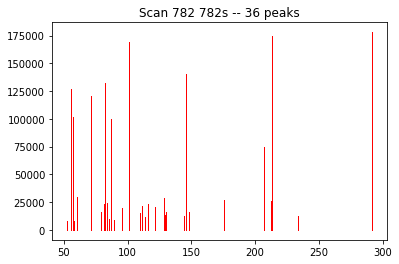

52.71050276408683 7970.900486514099
55.535769596676516 126500.9741315763
56.91519021257838 14269.117265427647
56.97418166073688 101276.16737225356
58.311008950568244 8150.197354609556
60.23343795765445 29803.81119290545
71.11800326863538 120709.73748808826
71.29302646162546 9600.486320296488
78.90611719178283 16125.917726126652
81.43334045910447 23482.9113390484
82.06977359186946 132051.0345028938
82.3829322641222 28008.10165904791
84.16364299211703 24623.21632886021
85.22765559967851 10221.52394537262
86.67627571904694 99656.060705235
89.42222738833753 8563.067974613055
95.23516703309977 19688.5136262698
101.06308825761234 169619.70757069698
110.08310520621143 15433.671809372707
111.46129054611568 21326.269658376517
113.59585321546236 11249.608420954431
116.02064881058458 23236.6123673432
121.18812192783149 20845.18261577299
128.46163622887667 29100.044540478244
128.97098330964542 13240.85652400789
129.530478396545 12424.995976368802
130.30847818457184 16538.84283306941
143.8063689510

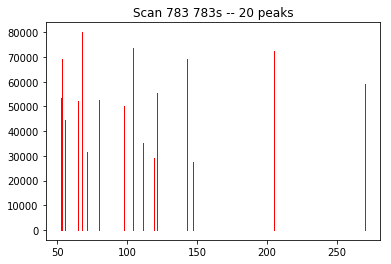

52.48460891642481 53426.68273899938
53.447545223147344 61324.32661903435
53.57456533073429 69259.14865349501
55.73342042836969 44508.0319172361
64.55740370666413 52151.03328353034
67.32436180290554 80050.7403218761
67.36544284849573 79935.91095983458
67.69914666595696 77512.0488501859
70.9077058788745 31750.250630113194
79.98753642286475 52776.24186387423
97.41986187723943 50099.29274755125
97.79506670973164 21001.898958347494
104.08188712132495 73769.66566576896
111.61313148772484 35012.39499762348
119.18844694299635 29227.416098375634
121.31350266011772 55449.64867888345
142.90924244557257 69166.46959755273
147.1780516634429 27551.052983609665
204.9614934763241 72473.32226534502
270.2187179369183 59202.043275590375
Scan 785 -- num_peaks=25 rt=785.00 ms_level=1
Scan 786 -- num_peaks=25 rt=786.00 ms_level=1
Scan 787 -- num_peaks=26 rt=787.00 ms_level=1
Scan 788 -- num_peaks=24 rt=788.00 ms_level=1
Scan 789 -- num_peaks=24 rt=789.00 ms_level=1
Scan 790 -- num_peaks=9 rt=790.00 ms_level=

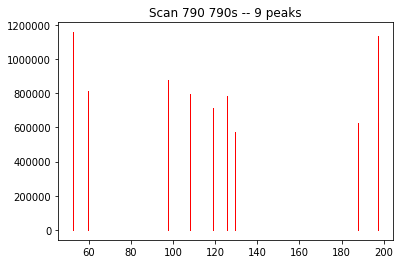

52.79416199468403 1157444.9920418342
59.918000457951386 815195.960652124
97.654762756173 875493.6479765305
108.19590438858343 797652.4537397756
119.19818572755185 713361.3493728514
125.79067505551757 782469.5376375341
129.38299181743534 574489.9695562852
187.87472772505768 624239.6494526451
197.14478720433587 1137985.2379299384
Scan 791 -- num_peaks=6 rt=791.00 ms_level=2


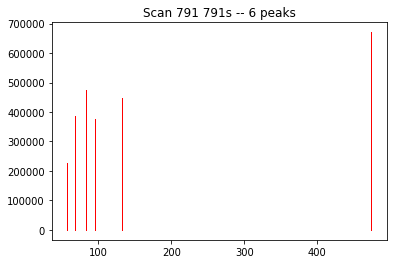

57.34538116929524 228275.36285380129
67.77052101657992 387247.6964770395
83.76114989815343 476224.0648280768
96.01551958172494 376152.0835309974
132.55449809274907 446663.86727844336
474.22492311615076 670617.9411478179
Scan 792 -- num_peaks=28 rt=792.00 ms_level=2


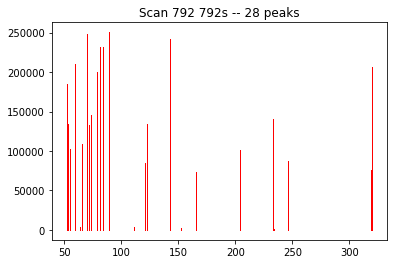

52.554108628972266 184619.70918913116
53.623952401957645 133856.51341099563
55.18750632078168 102999.80012926088
59.26934008222067 143464.12946467492
59.454415591671435 209600.4018226255
64.22655280912447 4059.639241342192
65.56265326846933 109130.06177071319
70.15805649780701 248327.722379828
71.54584353688666 133438.10382984809
73.3214722831655 145765.20547053698
79.08196870071971 200630.91612558765
81.12826028545817 231544.594105562
81.30158303430521 1685.8502417875275
83.84496873978053 231344.3239304699
89.29816353090048 250419.01600038778
111.06303381079464 4314.075104181157
120.41661873032064 84870.12714507974
122.53598583264584 124294.7904656863
122.96884190274811 133596.70671658046
143.02359001604955 241828.30256028025
152.1366560252093 2501.197581175966
165.6777922856541 72924.10881464092
204.42514747507033 100750.65102809394
232.96601523305398 140576.1124512784
234.10981419280432 1561.0916594255518
246.3316678846067 87584.21129139063
319.3932224847913 75563.69150136862
319.49

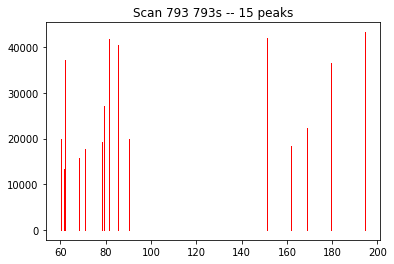

60.135067145105644 19908.77957761235
61.47216199603711 13324.985218029806
62.10010749754256 37139.47270431142
68.2767424661549 15636.503871847694
71.00677776105839 17652.59538950638
78.49756933737385 19298.90012149304
79.23381883392209 27192.6197644249
81.39931966573029 41696.82715067475
85.4867567189692 40432.034086244814
90.31156260410889 19833.904571248313
151.36510010912914 41957.11158007109
161.8372502066929 18442.59889090722
168.9588436158121 22218.71392243221
179.31554351004613 36603.16087425865
194.55275211200617 43248.154244248435
Scan 795 -- num_peaks=26 rt=795.00 ms_level=1
Scan 796 -- num_peaks=28 rt=796.00 ms_level=1
Scan 797 -- num_peaks=28 rt=797.00 ms_level=1
Scan 798 -- num_peaks=27 rt=798.00 ms_level=1
Scan 799 -- num_peaks=23 rt=799.00 ms_level=1
Scan 800 -- num_peaks=9 rt=800.00 ms_level=2


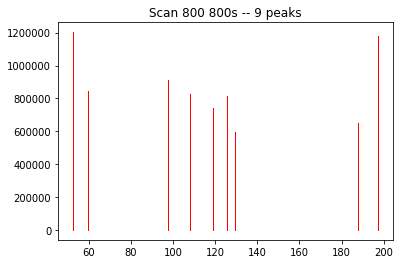

52.79416199468403 1202337.3710515895
59.918000457951386 846813.9522495111
97.654762756173 909450.3309600229
108.19590438858343 828590.0071592067
119.19818572755185 741029.6085878854
125.79067505551757 812818.2101781142
129.38299181743534 596771.99732257
187.87472772505768 648451.2561629638
197.14478720433587 1182122.855665478
Scan 801 -- num_peaks=9 rt=801.00 ms_level=2


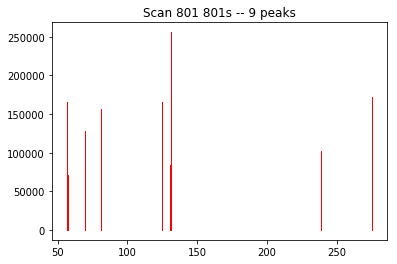

56.896114939172264 166295.66021672086
57.16374445449353 71049.71115337819
69.53716824353499 127691.83220399269
81.32150536768097 156423.6584459311
125.20211151741952 165538.01476645126
130.25557132880715 84198.77885596601
131.24909078998124 255985.96741443942
238.5513938957768 102629.76160300917
275.06132719403524 172096.238146704
Scan 802 -- num_peaks=28 rt=802.00 ms_level=2


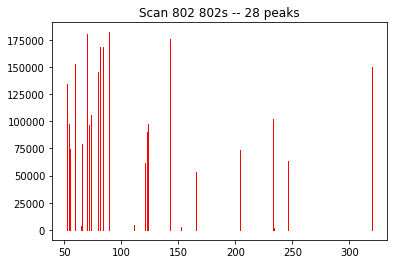

52.554108628972266 134213.22518801058
53.623952401957645 97309.84008271614
55.18750632078168 74877.89591796414
59.26934008222067 104294.30096501244
59.454415591671435 152373.47113627486
64.22655280912447 4063.929138402011
65.56265326846933 79334.42003318087
70.15805649780701 180527.12069894077
71.54584353688666 97005.66833647074
73.3214722831655 105967.11712048104
79.08196870071971 145852.91269230103
81.12826028545817 168326.26855630323
81.30158303430521 1687.6317114121903
83.84496873978053 168180.67789197963
89.29816353090048 182047.43108651106
111.06303381079464 4318.633868397642
120.41661873032064 61698.14445211065
122.53598583264584 90358.7421718777
122.96884190274811 97120.96807909288
143.02359001604955 175802.22919269995
152.1366560252093 2503.840643653106
165.6777922856541 53013.732287639126
204.42514747507033 73242.82913055475
232.96601523305398 102194.79555755503
234.10981419280432 1562.7412943122383
246.3316678846067 63671.20566159867
319.3932224847913 54932.63307614181
319.4

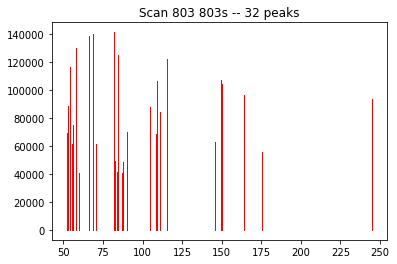

52.34490947262339 69671.18287589756
53.154178640303705 88620.43206594656
54.005280613031815 116724.35202723565
54.0910571099022 50773.56688340184
55.38348482658926 61355.19663365822
55.91853451036779 75440.16887968428
57.90727487663139 129938.62559603977
60.099323404693166 41053.13566810783
65.98861313432617 139122.22532279254
68.46239168623019 140191.33922643418
70.35192099560322 61853.45930445092
81.64782170396298 84212.6724191575
81.76335603989867 141581.05319064646
82.55613897876947 49549.987197472685
83.70609842896124 41540.50039843323
84.64095954907727 125461.92105078328
87.26223908082795 40585.24994403209
87.59174920525344 48475.08210403185
89.87911918719998 50664.18136290686
89.99169342400799 70244.56815575535
104.50176719057318 87817.35740353975
108.67802458045277 68491.53153989064
109.25798938076153 106490.17394419998
111.02094037092668 84197.82240510154
115.53434075147135 97699.6346430555
115.60042347920323 122743.81697770942
145.83801905852576 63214.76026459766
149.37771741

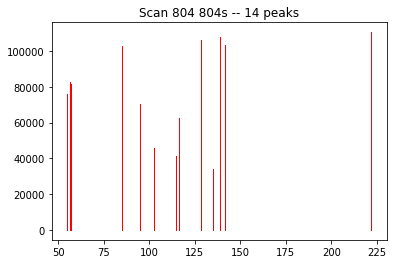

54.82950956399376 76246.23523448384
56.5852033094271 82758.43401586627
56.86157941746537 81456.74557766359
85.02758045965429 89230.05048446651
85.14579353537779 102773.91717767247
95.08043490287734 70676.42935408482
102.54049457568448 45585.19030960219
114.94581895056861 41535.70859641387
116.5049548855639 62588.32188154988
128.40399521540434 106286.0194954446
134.7969704454232 33959.056209870265
138.96691707473698 107657.6835638511
141.85590907124836 103380.80566261278
222.0139972657551 110518.11036973001
Scan 805 -- num_peaks=15 rt=805.00 ms_level=2


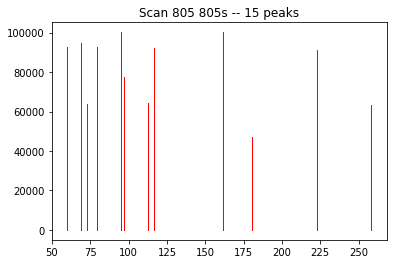

59.8584770458162 92888.8164148196
68.74521108428266 30742.401241099597
68.87387930146477 62664.60578762404
69.16552077937632 94996.95368873353
73.05466723873334 63954.9255032219
79.22501895083167 49893.18614690049
79.42501610836571 92847.24947735148
95.07485185465788 100144.0979733422
97.27274946655379 77446.21397724721
112.74228028520047 64556.45895006791
116.6275465731738 92106.49484570451
161.63936619287432 100197.09253444453
180.44366414781803 47173.77093315089
222.61750402709038 91405.31104809526
258.3272908079348 63402.045589018264
Scan 810 -- num_peaks=23 rt=810.00 ms_level=1
Scan 811 -- num_peaks=24 rt=811.00 ms_level=1
Scan 812 -- num_peaks=22 rt=812.00 ms_level=1
Scan 813 -- num_peaks=20 rt=813.00 ms_level=1
Scan 814 -- num_peaks=21 rt=814.00 ms_level=1
Scan 815 -- num_peaks=9 rt=815.00 ms_level=2


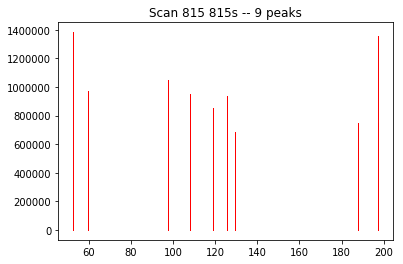

52.79416199468403 1382486.7007144697
59.918000457951386 973694.2851077486
97.654762756173 1045715.6350492052
108.19590438858343 952739.799013832
119.19818572755185 852059.9986111912
125.79067505551757 934604.8727462916
129.38299181743534 686187.8949463877
187.87472772505768 745610.3913020797
197.14478720433587 1359243.3920096552
Scan 816 -- num_peaks=41 rt=816.00 ms_level=2


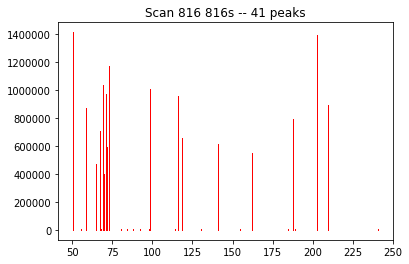

50.75097813899747 1411888.4353264929
55.29026266183535 4841.781302505483
55.427544079511065 6401.645463403063
55.73440872445502 3716.6578562357777
58.79475599956543 867370.9909348594
64.98020013565694 472667.0061438927
67.24801746666058 707401.8006911597
67.85452689130558 4807.06051295408
69.18662497323983 1035484.0090283583
69.21748729591809 4650.472406249925
69.33455355241212 5233.436689592337
70.04271926375073 401545.320801122
70.95290344186827 6463.048293448767
71.2196707720528 968691.1849319761
71.603782175588 6867.966755746209
71.89975472551131 592944.7638418031
72.768810848139 1168184.087282428
80.54742534515036 3548.3415199701208
83.9170735804387 5576.25945997081
88.10299091905853 3099.7146076476774
92.43020785111538 5584.940075142354
98.12244152703765 4380.652209570677
98.45073816264824 7173.789853372162
98.75399251183535 843781.9116275653
98.82280139846371 1004250.8824357217
114.16163024300565 5940.686738527592
116.22089946504087 959188.6963403733
116.60374377805066 2311.4029

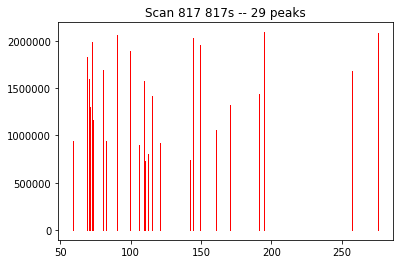

59.277994821528814 940466.7196254167
68.82656869726513 1827793.5015032315
70.22523570829533 1598272.8057230052
71.2225819500561 1296258.4063054181
72.24307753450947 1989849.8692591581
72.8805223518224 1157858.670702517
79.94707281672002 847228.309724521
80.23532781407539 1687635.872256571
82.75760999004775 944509.9136690507
89.97447012203962 2062003.9183246125
99.70870717130094 722530.8726481622
99.71833247995829 1892526.711873023
105.69740770303405 893629.0090501397
109.7474693412105 1577804.115238042
109.96756383425232 732036.4754945264
112.42626947989086 799520.9472942291
114.94684152446595 1414670.250002726
120.6875935732765 917507.6297240924
141.93479418001684 739134.1356859365
144.1849132393801 2033315.9589353397
144.47191816515024 1392739.6240014187
149.0302649389342 1959801.2126884758
160.31242626481284 1059403.343156752
170.49907179085602 1320091.1018818554
191.49534257599018 1435642.0805473973
194.81565317303767 1821275.6676368124
194.8472012272576 2091729.5259538882
257.2273

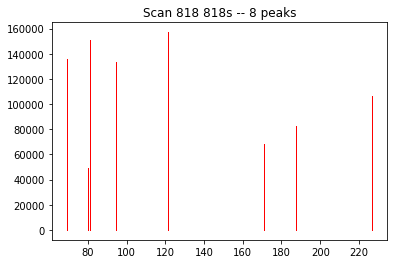

69.34857110319854 136074.9886049059
80.01222946632325 49406.17151512106
81.02655311496287 150744.60348257082
94.5549371322121 133077.05674001356
121.47393168560207 157118.25666669838
171.12316559980036 68568.48426901465
187.4872271965971 82276.63462075849
226.5064515079664 106595.60055001313
Scan 820 -- num_peaks=14 rt=820.00 ms_level=1
Scan 821 -- num_peaks=16 rt=821.00 ms_level=1
Scan 822 -- num_peaks=16 rt=822.00 ms_level=1
Scan 823 -- num_peaks=17 rt=823.00 ms_level=1
Scan 824 -- num_peaks=18 rt=824.00 ms_level=1
Scan 825 -- num_peaks=19 rt=825.00 ms_level=2


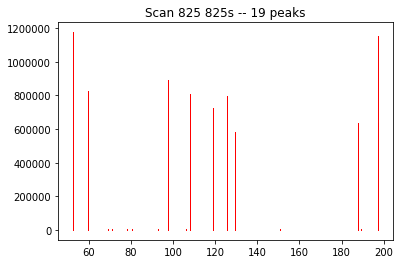

52.79416199468403 1176324.8191300603
59.918000457951386 828493.1444370586
69.06602562480427 4026.1632968910567
69.24199156625231 6340.43519746377
70.91387084570171 6822.91444878315
78.20649626981549 3459.86502097652
80.72954262950094 3931.54164241503
92.81030220426722 3494.149601614932
97.654762756173 889774.3859850627
99.54433530151638 2310.267680316002
106.2082687343476 6968.959295432177
108.19590438858343 810663.4741395786
119.19818572755185 724997.4435459526
125.79067505551757 795232.8997618456
129.38299181743534 583860.8436485468
151.00169565212695 7783.061159395909
187.87472772505768 634422.022458977
188.94865745140746 6921.669412856547
197.14478720433587 1156547.6444968109
Scan 826 -- num_peaks=2 rt=826.00 ms_level=2


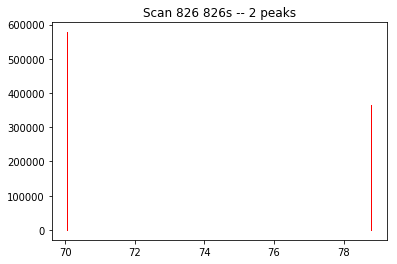

70.04918485926316 577617.4508386279
78.80067578315203 364995.4429618708
Scan 829 -- num_peaks=6 rt=829.00 ms_level=2


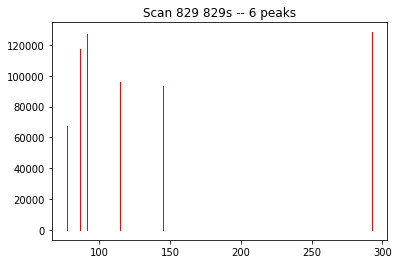

77.46102204894602 67267.43343473974
86.36141817399746 117190.74026487336
91.72636866254659 126804.3365456022
114.89955213197659 96227.92556245637
145.01272996072817 93096.88413618368
292.3088840734956 128182.60089149464
Scan 835 -- num_peaks=19 rt=835.00 ms_level=1
Scan 836 -- num_peaks=21 rt=836.00 ms_level=1
Scan 837 -- num_peaks=21 rt=837.00 ms_level=1
Scan 838 -- num_peaks=22 rt=838.00 ms_level=1
Scan 839 -- num_peaks=22 rt=839.00 ms_level=1
Scan 840 -- num_peaks=9 rt=840.00 ms_level=2


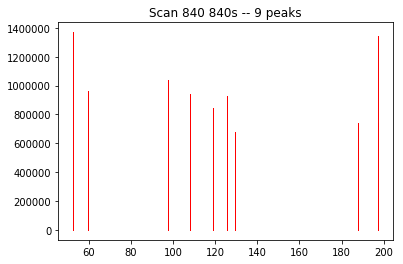

52.79416199468403 1369311.7552742423
59.918000457951386 964415.0862010783
97.654762756173 1035750.0806387026
108.19590438858343 943660.2940433657
119.19818572755185 843939.9610095989
125.79067505551757 925698.191618553
129.38299181743534 679648.6001575185
187.87472772505768 738504.8066913959
197.14478720433587 1346289.9527321113
Scan 841 -- num_peaks=4 rt=841.00 ms_level=2


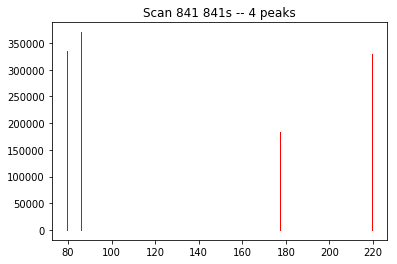

79.57218990763239 335218.05102662207
85.9725804764278 370382.46406949975
177.25891677514477 183191.20477143748
219.3075938358906 329242.9512011973
Scan 842 -- num_peaks=2 rt=842.00 ms_level=2


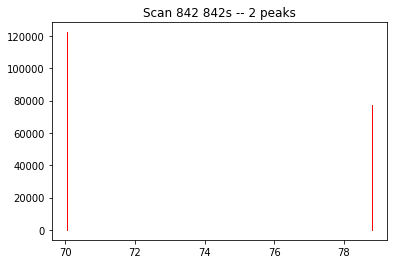

70.04918485926316 122284.47905755966
78.80067578315203 77271.34548337087
Scan 843 -- num_peaks=6 rt=843.00 ms_level=2


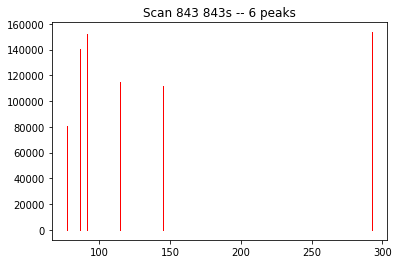

77.46102204894602 80560.81706467266
86.36141817399746 140349.96291795952
91.72636866254659 151863.39715737916
114.89955213197659 115244.47882006486
145.01272996072817 111494.68129272827
292.3088840734956 153514.03396878543
Scan 844 -- num_peaks=15 rt=844.00 ms_level=2


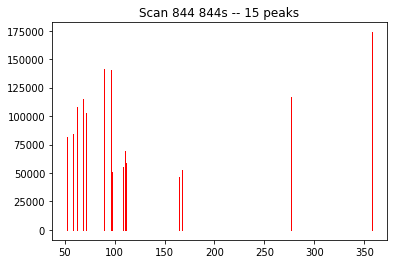

52.67611943322325 81732.2427143616
58.885193685133956 83980.38053980547
61.95951520246476 107620.28320743603
68.2065505330581 114554.80039768084
71.0081798952807 102979.78208996836
89.3971168859853 140937.6657937348
96.34801539726615 140413.3512309374
97.12315190765632 50766.629842254624
108.89594506987717 54948.30560062065
110.76182603448116 69580.84437372834
111.58523236865798 58687.77693503677
164.84953774192007 46228.958849467366
167.5504154064958 53021.61078287991
276.2549844980739 116487.31781650441
357.327631955763 173625.51561011662
Scan 848 -- num_peaks=6 rt=848.00 ms_level=2


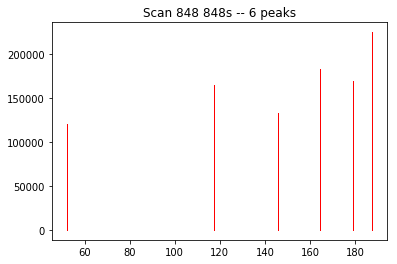

52.293122040208466 120181.8297153015
117.2528710505558 164869.6361347824
145.91344330417607 132746.8136748833
164.52199267003436 183188.25514864552
179.20227453162735 169900.61436907647
187.27734890816316 224777.71666324782
Scan 850 -- num_peaks=24 rt=850.00 ms_level=1
Scan 851 -- num_peaks=28 rt=851.00 ms_level=1
Scan 852 -- num_peaks=28 rt=852.00 ms_level=1
Scan 853 -- num_peaks=31 rt=853.00 ms_level=1
Scan 854 -- num_peaks=33 rt=854.00 ms_level=1
Scan 855 -- num_peaks=11 rt=855.00 ms_level=2


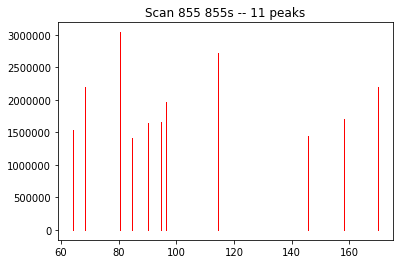

64.32110652482193 1529941.092389978
68.1996992437014 2195100.177648022
80.46884888470504 3039619.250842208
84.544457709277 1415752.6648241747
90.15910969911906 1636500.0638790228
94.84329371331012 1666700.497928751
96.55932312914247 1973443.623285531
114.41397131247277 2720356.5049611926
145.57644048837545 1441421.6542033534
158.24717712804272 1709988.8257679
169.90457477317022 2190469.985988505
Scan 856 -- num_peaks=22 rt=856.00 ms_level=2


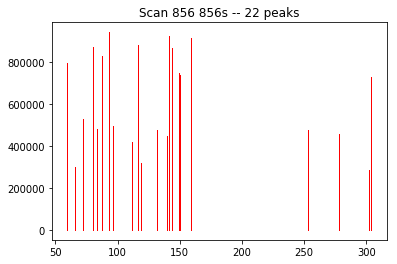

59.345517536371084 794155.1647891339
65.59804223817426 301091.89130452456
71.79935448698417 528830.2520596144
80.23219304452869 870823.3376323932
83.13019332490752 480042.56547681196
87.175455743544 827902.8183143134
93.46829180273656 941229.0890587657
96.54649709188182 495564.5682873456
111.29477360740752 420887.2575511884
116.74859839470646 880591.2314281842
118.88633519104275 319365.31541302905
131.58167798778933 475502.6414002143
139.47594841741983 448461.43209747307
141.59470419141454 923251.7961650558
143.9812120811224 866297.415049936
149.49317085821866 748008.9942478751
150.51150316595457 738468.8623624833
159.35094076539642 914220.1183689485
253.10486176314512 476093.54544933274
278.2844950002074 458611.0554105927
301.89481959383465 283566.7907117999
304.1619251426427 729037.6564745711
Scan 857 -- num_peaks=1 rt=857.00 ms_level=2


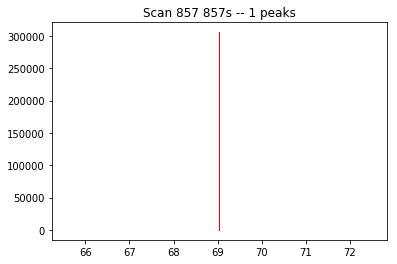

69.03853763214236 305834.185577005
Scan 859 -- num_peaks=9 rt=859.00 ms_level=2


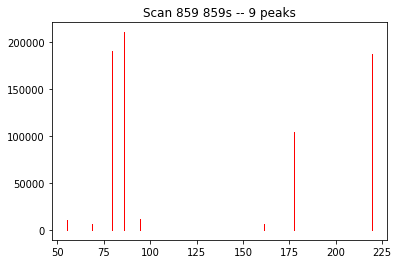

55.27210420599021 10738.468477270802
68.85487367151597 5950.171929687461
79.57218990763239 190677.49096252886
85.9725804764278 210679.582227159
94.66355135471419 11818.978972141033
161.204851775728 6603.450596996276
161.25903987558385 4115.827955648063
177.25891677514477 104202.14300883954
219.3075938358906 187278.75679689122
Scan 865 -- num_peaks=33 rt=865.00 ms_level=1
Scan 866 -- num_peaks=33 rt=866.00 ms_level=1
Scan 867 -- num_peaks=32 rt=867.00 ms_level=1
Scan 868 -- num_peaks=32 rt=868.00 ms_level=1
Scan 869 -- num_peaks=29 rt=869.00 ms_level=1
Scan 870 -- num_peaks=63 rt=870.00 ms_level=2


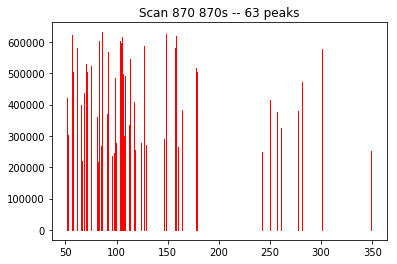

51.53756361220121 422171.7644965005
52.258774714800104 301997.0520896141
52.601889748021044 300272.2464780751
56.175386818174594 622292.0709050564
56.19269729858103 349950.17519793956
57.75821084834808 503026.12155910104
61.560010556617236 581058.715984572
65.60228373709266 397322.92169877415
66.01790526079141 220832.25966737967
67.88999192236457 436443.4040333806
68.32426885459347 369970.3118991756
69.64412895542718 529372.7235529409
70.3322014785084 475984.1951053596
70.70145457583583 504732.7066885026
71.1212707034292 239618.36692793304
75.31157835969753 523507.3545084414
80.48557174302876 360311.60428422265
81.58835154926109 218103.44821469148
83.15111062795246 601491.5064953543
84.63828856634089 268859.6813703328
85.36510735620412 631031.0297658906
90.3944769770045 369298.37637618935
91.40440761220468 568490.4038502673
95.56184286061341 237296.93547778716
97.70443354013197 245400.37296629426
97.94727755903152 485035.23895729386
98.49110400529024 306392.0246808621
99.50791557207704

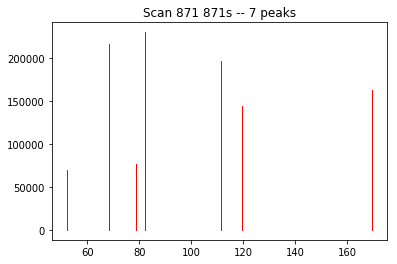

52.29159550549355 69955.63596720413
68.5400833634031 217041.88954022017
78.85669902730943 76342.72835731154
82.2187588248237 230596.33843124215
111.2558896022597 197049.1527650532
119.36680219553551 144144.8145156102
169.24709775723383 162659.03613078108
Scan 872 -- num_peaks=21 rt=872.00 ms_level=2


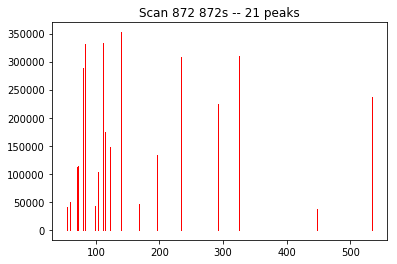

54.96934866030768 41653.433882169746
60.06003437071883 49357.30789223245
70.71676627664823 112313.59506966287
72.66909929680514 113519.42564370214
80.34941661781785 289101.8900403597
83.13266124317778 332143.2640105856
98.8469428751011 42612.686680016755
103.91716159005631 104004.51815991686
110.73006826480236 333031.2893055543
111.20521307906017 329191.55011900974
114.53171939133507 174192.0325640412
122.8694920588548 148518.66459158596
139.46709289317246 352250.98442585283
139.58469706571287 264024.72523469245
168.22656912943367 46004.31499435115
195.60255951114763 133873.84621129086
233.97659747001546 308879.9647963823
292.4200926479904 223647.34416357896
324.24805888621404 309645.175189227
447.4513092154244 37823.3177018211
533.1927490850323 236483.38169477694
Scan 873 -- num_peaks=31 rt=873.00 ms_level=2


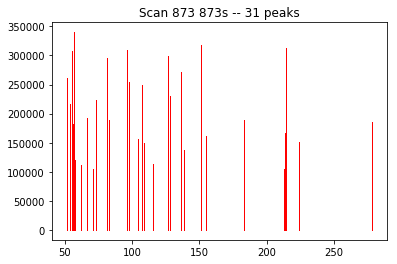

51.89903902991559 261971.62452065523
54.120663640604675 216067.41438817448
55.51121622747107 307074.22083056864
56.06034574902935 182567.43169032963
57.2780219213776 339972.86147628125
57.483070453808075 120431.24147878667
62.53335383443612 111587.34162693149
66.82226852931342 192274.06151441913
70.9238400268873 104835.60380176295
73.46640486942815 224084.52593594615
73.53543663109522 90044.53300974017
81.81019037121503 296194.3519465278
83.06002733588372 188437.48573415828
96.32697791276533 309372.54113436287
97.80991778648243 254069.96572292168
104.68914287670782 156533.64607004056
107.1356824387363 248854.4183128109
109.08735625399142 149438.59366457356
115.46433762114812 113553.148427482
126.73008831972959 298657.4470779573
128.33105375789464 231138.9457637051
136.42150973016368 271800.7763027691
138.80126778576027 136663.5540138478
150.96249661727094 318741.36831671814
155.0038501528697 162060.46323671567
183.35391956468737 189299.1287838218
213.07352075125354 104386.55894717337
2

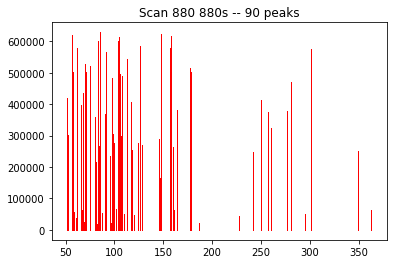

51.53756361220121 420901.34007119795
52.258774714800104 301088.26456849324
52.601889748021044 299368.6493447586
56.175386818174594 620419.4325312119
56.19269729858103 348897.08428187465
57.75821084834808 501512.385385494
58.5042884970667 58475.90299374893
60.97233658801783 37191.98272971571
61.560010556617236 579310.1594788992
65.60228373709266 396127.27389162936
66.01790526079141 220167.71807514227
66.69887797008477 61846.139174003576
67.88999192236457 435130.0325401272
68.25696646610514 43449.36834369517
68.32426885459347 368856.97519501665
68.77013538134035 23967.762588212907
69.64412895542718 527779.7036149717
70.3322014785084 474551.8351079045
70.70145457583583 503213.83495725156
71.1212707034292 238897.2930625138
75.31157835969753 521931.98498843994
80.48557174302876 359227.3331384521
81.58835154926109 217447.11832445094
81.78137564753207 18851.000248249908
82.98912441095896 45954.600620473124
83.15111062795246 599681.4624191592
84.33768904450835 22876.3169164974
84.6382885663408

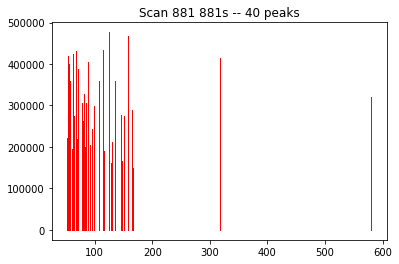

52.15180415599703 222123.81661204417
53.508721502627 419006.55185135093
54.94898811841719 399587.41679352534
56.84540366563209 358468.6856606141
57.32003564443256 167357.48948776055
60.231020528386075 195115.98749604673
62.81514718605433 423406.80061241094
63.530894630531684 274491.85315172595
68.40388429338309 430457.48950204597
68.70100935704376 218641.21114690125
71.27470940050868 345348.0799731714
71.33548901916731 388709.6940262897
77.97308292748424 306892.77846156684
79.27022052365076 261632.59536691822
81.44098132381691 328502.25871905993
83.35133800753736 200781.0627383508
85.8080113663112 305739.4170824508
88.85777636135866 403869.69250998
89.30063426697956 276255.1478876475
91.70963545388652 205504.6344624288
94.6876044275823 242502.13873694546
95.68604453366132 179043.71677963258
98.44703599524073 299283.4798480213
108.46568598390743 358321.4424171917
113.82483977402913 434616.51063727576
115.58802904563876 191191.5342904985
124.72678203599101 442938.62589724443
124.92147021

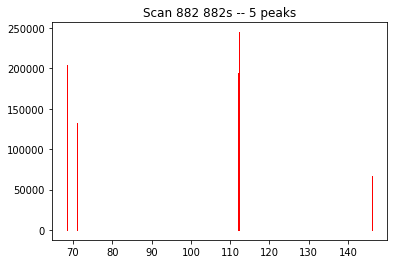

68.51768555054034 204587.40016130867
70.9835657970936 131872.30992204975
112.09108025632479 194629.8500023613
112.20676741462962 244824.91100737272
145.98598182686897 66641.61767868312
Scan 885 -- num_peaks=22 rt=885.00 ms_level=1
Scan 886 -- num_peaks=24 rt=886.00 ms_level=1
Scan 887 -- num_peaks=24 rt=887.00 ms_level=1
Scan 888 -- num_peaks=24 rt=888.00 ms_level=1
Scan 889 -- num_peaks=23 rt=889.00 ms_level=1
Scan 890 -- num_peaks=90 rt=890.00 ms_level=2


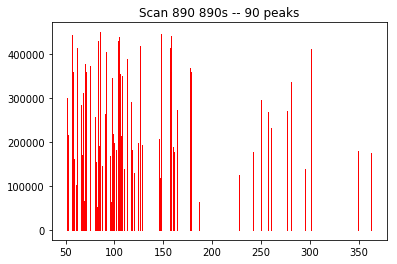

51.53756361220121 301437.70987643773
52.258774714800104 215630.95267609533
52.601889748021044 214399.41258448255
56.175386818174594 444326.96002681385
56.19269729858103 249870.28563678253
57.75821084834808 359169.07487084897
58.5042884970667 161267.73925444382
60.97233658801783 102569.8906069521
61.560010556617236 414885.65408685623
65.60228373709266 283695.21998027054
66.01790526079141 157677.93163610675
66.69887797008477 170562.34338567543
67.88999192236457 311627.8995100574
68.25696646610514 119826.81833182402
68.32426885459347 264164.99851468235
68.77013538134035 66099.48183273929
69.64412895542718 377980.98991571437
70.3322014785084 339860.6865171545
70.70145457583583 360387.6052330809
71.1212707034292 171091.5268273154
75.31157835969753 373793.01819178177
80.48557174302876 257268.51952516515
81.58835154926109 155729.51456002882
81.78137564753207 51988.22142250978
82.98912441095896 126735.871888918
83.15111062795246 429475.0086954028
84.33768904450835 63089.43894352689
84.63828856

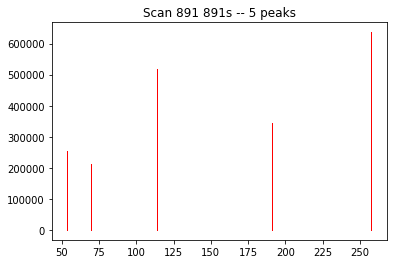

53.58268380853391 253241.43353449405
69.68204472307703 211682.61800824906
114.00853049387791 516723.0277473454
191.11874562015944 343941.24221322604
257.6379893134718 636349.9381764409
Scan 892 -- num_peaks=11 rt=892.00 ms_level=2


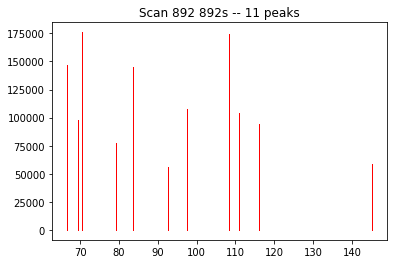

66.65693307710006 146970.7662143947
69.37954860399506 97836.65776578458
70.36086461070805 176016.0153454253
79.12321644352373 77814.52753113245
83.62414656651784 144833.2018979747
92.53073304602144 56313.85727381279
97.51987077231057 107412.09196125962
108.21465469671689 174814.3330046532
110.98661211366377 103784.8969110341
116.02128356450679 94361.24248337757
145.10700763659392 58262.838779396305
Scan 893 -- num_peaks=90 rt=893.00 ms_level=2


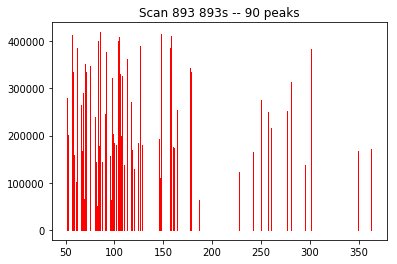

51.53756361220121 280180.53634217626
52.258774714800104 200424.8108092639
52.601889748021044 199280.11805155815
56.175386818174594 412993.3379026526
56.19269729858103 232249.61029057644
57.75821084834808 333840.7264176995
58.5042884970667 158748.7972411877
60.97233658801783 100967.787124015
61.560010556617236 385628.21197911527
65.60228373709266 263689.23425130156
66.01790526079141 146558.5957153088
66.69887797008477 167898.2231182255
67.88999192236457 289652.1210292626
68.25696646610514 117955.1680662082
68.32426885459347 245536.2701535017
68.77013538134035 65067.0325492515
69.64412895542718 351326.03855417494
70.3322014785084 315893.95191805676
70.70145457583583 334973.32688291435
71.1212707034292 159026.27368595888
75.31157835969753 347433.39962629066
80.48557174302876 239126.1259716489
81.58835154926109 144747.5796297051
81.78137564753207 51176.18477003954
82.98912441095896 124756.30478043418
83.15111062795246 399188.73564678896
84.33768904450835 62104.00540869653
84.63828856634089

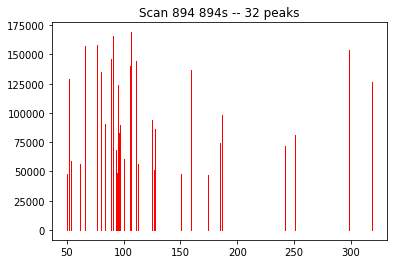

50.51976597496115 47575.05082685988
52.133326824528346 128866.5256482601
53.602703506306156 58493.87174490472
61.5331223434811 56159.42091074975
66.03072772979176 157184.8769357699
76.8759418313515 158402.52879849382
80.42315083195383 135345.11676729863
83.98242604509286 90395.75071701402
88.75304045539417 146065.6709205707
90.33530488586418 165577.09576469832
93.5234854447959 68464.07753147758
94.32216478538247 48305.20016525096
94.91592583651425 123586.00222440058
96.22992415172942 82918.77775954135
96.51554414266813 89914.06393507934
100.77386179308303 60536.31708133404
105.78800046460583 140223.5216418898
106.52476074652317 168987.09713783526
111.26845769773382 144805.6057532494
112.31639151483121 56180.09504599315
125.28737352415905 94012.67056650252
126.81319127791396 51629.94086574652
127.81000917913723 85917.40383839102
150.16110592848798 48092.76347861875
159.50974872997347 137051.49213852783
173.86728386410869 46562.27709423585
185.08686801478308 74376.85583426364
186.9350389

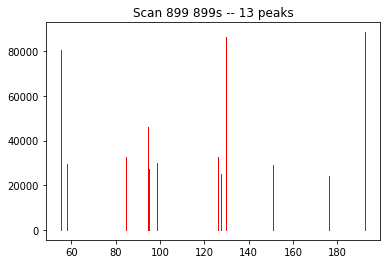

55.266758523000746 80454.06221639736
58.084833708197095 29664.519943118037
58.1732999197254 24144.892789572135
84.58251632002069 32818.396639612685
94.79770963586462 45990.81184630291
94.95310141638329 27189.821123561796
98.69319680191252 29815.32739162309
126.12579352392079 32532.86454888548
127.58989707659698 24900.666991800346
129.99580797190174 86154.91390407259
150.85618043780877 28857.560001110975
176.20649448023823 24065.184211431435
192.54619573332644 88430.30944848158
Scan 905 -- num_peaks=23 rt=905.00 ms_level=1
Scan 906 -- num_peaks=23 rt=906.00 ms_level=1
Scan 907 -- num_peaks=25 rt=907.00 ms_level=1
Scan 908 -- num_peaks=24 rt=908.00 ms_level=1
Scan 909 -- num_peaks=24 rt=909.00 ms_level=1
Scan 910 -- num_peaks=8 rt=910.00 ms_level=2


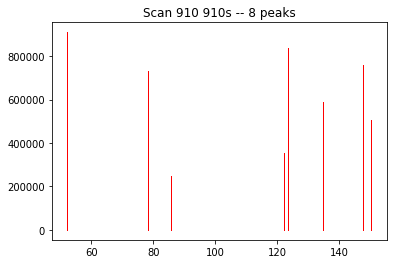

52.11133165620698 909577.0032287044
78.1829084183687 729873.9866513542
85.60171387634186 248906.01834166766
122.11362368897275 352310.60238084657
123.48989293099093 835341.7648566817
134.7615248236069 589543.8699123064
147.61194575138538 759167.4766988918
150.4735057256303 506263.7025132222
Scan 911 -- num_peaks=8 rt=911.00 ms_level=2


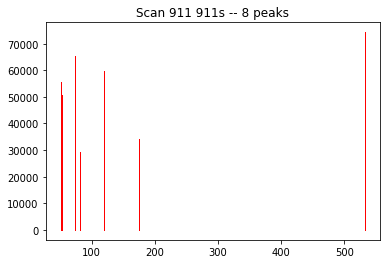

50.95718185088532 55669.03790865564
51.91151234309682 33277.76771544877
53.57700461417607 50881.26434879027
72.68308685701246 65237.53041621754
80.61509399079854 29197.84081069209
118.60056870670864 59695.57236144586
175.22539344811892 34027.368608185476
532.7558283432304 74293.78379739077
Scan 912 -- num_peaks=12 rt=912.00 ms_level=2


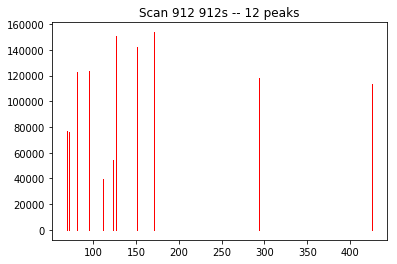

69.77029148552504 77078.63816802327
71.47093780306695 63655.217858298754
71.72158360111918 75826.60875241143
81.06073781014413 122918.25658232035
95.1547935857199 123366.70599892274
111.03846374097024 39709.671314661085
123.16122007650303 54721.88506818637
126.90763716356456 151180.22995689535
151.3622462757357 142460.3208946609
170.67518952785784 153726.75101004037
293.28193339416396 117837.46471522978
425.02609059272953 113847.5766050115
Scan 913 -- num_peaks=35 rt=913.00 ms_level=2


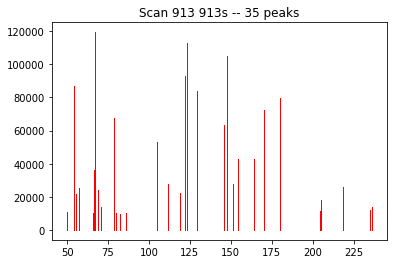

50.07544217158096 10807.885618373144
53.96408990940704 26758.816842824275
54.086044145115025 7800.0750560139095
54.516392417982736 86672.11063457413
55.4181770045487 21414.950123137012
57.33278668896764 25030.955549483697
65.98050474429854 10414.51639432515
66.63060160527272 36239.17150384872
66.9724492759263 119397.93010218095
67.12123454993574 90689.75088343162
68.89203977325137 23933.892679491135
70.75702208354441 13963.379729615363
78.57651703313921 67375.26566294295
79.69163491852869 10284.83491723041
82.05871414573122 9819.92494339436
85.70271407039984 9983.431587033043
104.97115127401884 21222.043898865162
105.16399263487497 53123.16394149789
111.47829124201715 27686.37557426955
118.96882295661366 22598.620243169844
122.12792686816276 93177.9763506004
123.025086026881 112945.40203955754
129.27456814109223 83679.37345378
145.72475276611132 63268.63096523417
147.39239088093785 104783.17940212299
151.3022064854709 27780.68261821397
154.31527707325694 42677.958641037134
163.97210451

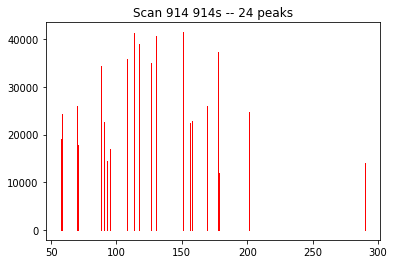

57.48554100643332 19141.298269495965
58.06039320990381 24376.733148218187
69.74418513102816 26070.44313350405
70.70586910848631 17710.92781378211
88.10121827516267 34414.58613286647
90.36856353603943 22687.784072231945
92.65209142512317 14470.410064937418
94.7330827736584 17065.849384460205
108.07803997195273 35751.1467095661
113.39032645851647 28212.712244139308
113.67046080865485 29513.36609234812
113.68627408980699 41344.947583151356
116.98474282131973 39044.187914092094
117.10824067332818 37032.159441508906
126.2745749079656 34944.0547232145
130.13770482801328 40633.99933312484
150.66401563333622 41443.08049286761
155.8900611228488 22443.721967548605
157.71460920494002 22731.06616035721
168.9046760827534 26031.474880596594
177.77236254684752 37335.912256737174
178.14200427238003 11857.738635055233
201.72219104945057 24724.58186402988
290.130415333776 13939.563297716326
Scan 915 -- num_peaks=8 rt=915.00 ms_level=2


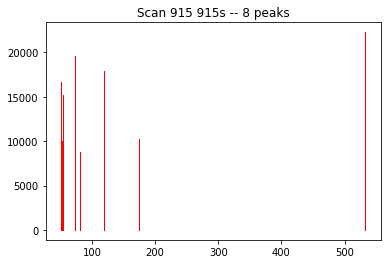

50.95718185088532 16694.817643370414
51.91151234309682 9979.80716856389
53.57700461417607 15258.992461141517
72.68308685701246 19564.352371055447
80.61509399079854 8756.261042529568
118.60056870670864 17902.3516865199
175.22539344811892 10204.608075489588
532.7558283432304 22280.26959202355
Scan 916 -- num_peaks=14 rt=916.00 ms_level=2


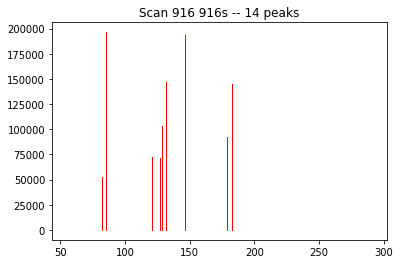

55.359362368204025 84.96397665491143
79.83252479166464 159.30144314263532
82.1915441537545 52277.78035492632
83.86545198866354 255.67652951588443
85.02603675869726 123261.32954180776
85.63133692748696 196339.8151841139
120.51211373857112 72892.28641721279
126.66232468077742 71454.78754751246
128.77752358298508 103540.74379007198
131.48345143977443 146795.7506513399
146.23189510365233 193599.1276832769
179.071749656362 92459.24771098616
182.856120676871 145408.2210823099
290.6845965362044 120.75908697373421
Scan 918 -- num_peaks=7 rt=918.00 ms_level=2


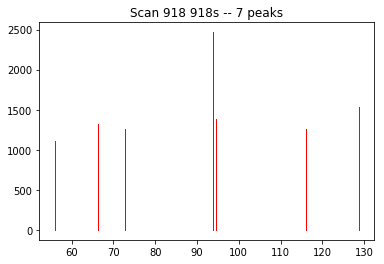

55.966456736992065 1110.4966548403916
66.38685010080941 1322.01339996067
72.7830248614561 1263.8725955630332
93.92140525752524 2466.1270494796017
94.47853030832317 1384.992690100809
116.13714995776655 1258.099347738885
128.74794755764273 1538.9815396874742
Scan 920 -- num_peaks=28 rt=920.00 ms_level=1
Scan 921 -- num_peaks=29 rt=921.00 ms_level=1
Scan 922 -- num_peaks=27 rt=922.00 ms_level=1
Scan 923 -- num_peaks=29 rt=923.00 ms_level=1
Scan 924 -- num_peaks=28 rt=924.00 ms_level=1
Scan 925 -- num_peaks=10 rt=925.00 ms_level=2


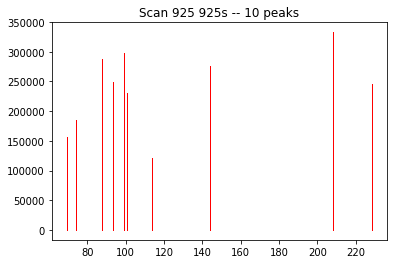

69.41348030317391 157211.28049612822
74.10374772566279 185747.08400135225
87.5893353111632 287125.00835546013
93.14569711183285 249048.01832983142
98.86174965399147 298209.3764073001
100.8023860453554 231241.58661934576
113.94444638988068 121711.77551616785
143.7387965596144 276632.8136301962
208.02518429823786 332724.8989939623
228.2860405252056 246301.98818549808
Scan 926 -- num_peaks=8 rt=926.00 ms_level=2


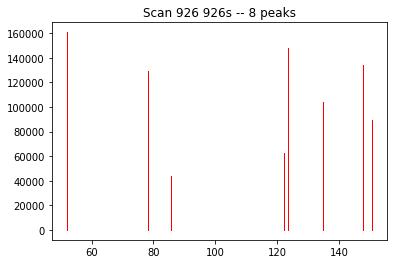

52.11133165620698 160848.4267920685
78.1829084183687 129069.97658537616
85.60171387634186 44016.21998711447
122.11362368897275 62302.15356585523
123.48989293099093 147720.7627655059
134.7615248236069 104254.17932038347
147.61194575138538 134250.19967002995
150.4735057256303 89527.02168384123
Scan 927 -- num_peaks=2 rt=927.00 ms_level=2


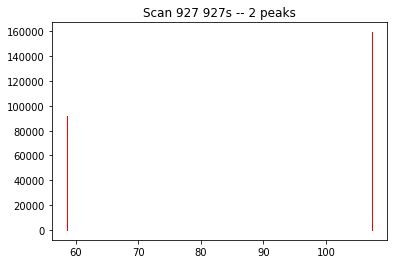

58.62103714144429 91818.33589614693
107.26733340650297 159372.5948890802
Scan 928 -- num_peaks=12 rt=928.00 ms_level=2


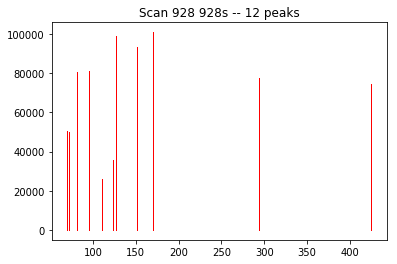

69.77029148552504 50559.096144430165
71.47093780306695 41754.11445096775
71.72158360111918 49737.83778927365
81.06073781014413 80627.21527207087
95.1547935857199 80921.37196332544
111.03846374097024 26047.230952434955
123.16122007650303 35894.36858414394
126.90763716356456 99165.42330270073
151.3622462757357 93445.67096759657
170.67518952785784 100835.7927568044
293.28193339416396 77294.51180709657
425.02609059272953 74677.37765210145
Scan 929 -- num_peaks=24 rt=929.00 ms_level=2


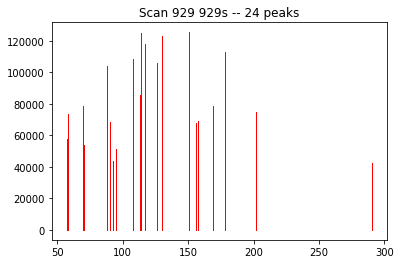

57.48554100643332 57984.40286535671
58.06039320990381 73844.01494124977
69.74418513102816 78974.74122434629
70.70586910848631 53651.40645189033
88.10121827516267 104251.50889335126
90.36856353603943 68727.71079812244
92.65209142512317 43834.96223813548
94.7330827736584 51697.28155404255
108.07803997195273 108300.32866733756
113.39032645851647 85464.27988615385
113.67046080865485 89404.32803028122
113.68627408980699 125245.53263604896
116.98474282131973 118275.88127443261
117.10824067332818 112180.87831861149
126.2745749079656 105855.41891110687
130.13770482801328 123091.86943277223
150.66401563333622 125542.804957457
155.8900611228488 67988.37769736415
157.71460920494002 68858.82447700539
168.9046760827534 78856.69537167046
177.77236254684752 113101.0314535611
178.14200427238003 35920.4419891866
201.72219104945057 74897.74702304722
290.130415333776 42226.8773330811
Scan 931 -- num_peaks=4 rt=931.00 ms_level=2


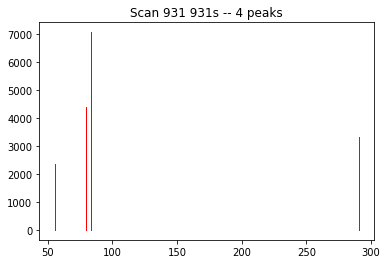

55.359362368204025 2346.4586157609046
79.83252479166464 4399.443840574699
83.86545198866354 7061.044211325935
290.6845965362044 3335.0157468713464
Scan 933 -- num_peaks=7 rt=933.00 ms_level=2


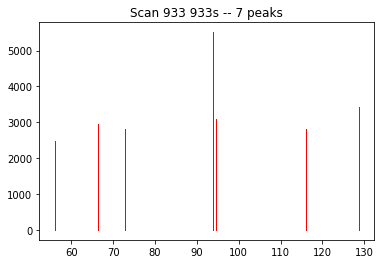

55.966456736992065 2480.620535107969
66.38685010080941 2953.1053275452537
72.7830248614561 2823.230759541982
93.92140525752524 5508.819296716909
94.47853030832317 3093.788074969293
116.13714995776655 2810.334514384983
128.74794755764273 3437.767411419645
Scan 935 -- num_peaks=24 rt=935.00 ms_level=1
Scan 936 -- num_peaks=24 rt=936.00 ms_level=1
Scan 937 -- num_peaks=23 rt=937.00 ms_level=1
Scan 938 -- num_peaks=25 rt=938.00 ms_level=1
Scan 939 -- num_peaks=24 rt=939.00 ms_level=1
Scan 940 -- num_peaks=12 rt=940.00 ms_level=2


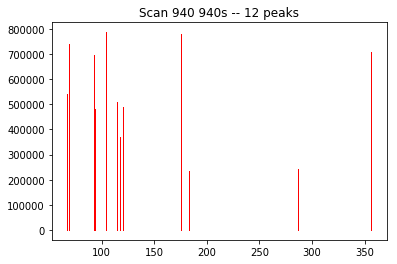

67.08092395496884 540355.8000467953
68.61900732191357 740847.5207915254
92.61118546048245 696585.0170587448
93.95788737983872 480477.02905522654
103.89886200493527 786695.1644187666
114.60626628473113 509226.093358322
117.54927507982723 369080.11600258196
119.91687644662345 490082.2275926843
175.63582548133365 780533.051980468
182.98203805524568 233762.58323890128
287.1626407230701 243853.93891017375
356.56705758315786 706245.9740920778
Scan 941 -- num_peaks=31 rt=941.00 ms_level=2


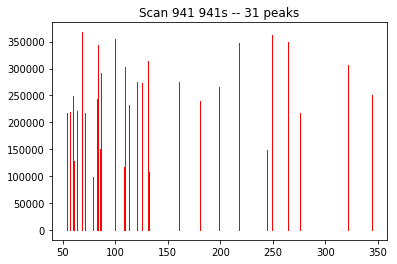

54.229624708686345 217020.22760497447
57.38179334066701 218490.44431609404
59.951052912584984 249608.03852748015
60.40566126968642 128689.87589894538
63.62161541798434 221172.73194248867
68.51988485083402 367474.5539395032
71.45470056645162 216899.44428983945
78.72992288639992 97928.61898347721
83.00705667471749 242483.66814285435
83.23481438306071 128742.67245538987
83.84837164027017 342950.5336760032
85.01663649255858 149785.91232909338
86.27080423102748 291191.93390566326
99.82676918286775 355071.657084372
108.40885175574923 116493.7906037383
109.43088886765064 302607.10214182845
113.01715730795169 232454.44459345713
120.6066573471506 274050.86053849454
125.12962867326183 272924.67451239174
131.05779171160225 313329.3024938088
132.0165937219827 108002.37336797426
160.95967815731476 275618.08871476573
180.35537732310829 239335.49809718353
198.85116433947616 266526.26696348615
217.97891611564307 347606.7503386511
244.20317083819276 149458.15118198592
249.56075853930304 361496.42795609

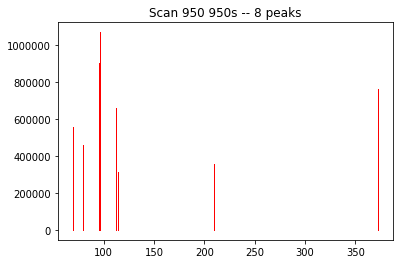

69.75656779063911 558160.4337562642
79.89510350120936 459912.04686897976
95.45771091263948 902989.5112954092
96.53302308089964 1069460.1607339804
112.42269562035412 659334.6103778045
113.8675489344597 315438.16768668575
210.00509849208842 356021.6454848027
372.21642134955135 763799.5023459035
Scan 951 -- num_peaks=10 rt=951.00 ms_level=2


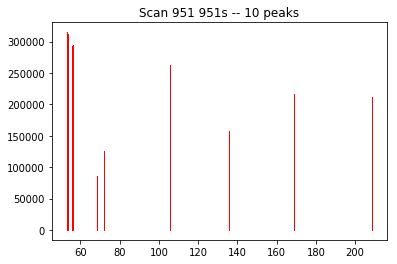

53.2826369236295 314751.16185141105
53.56103104845728 311216.1752259523
55.65948009516376 293500.0759445011
56.47763708155242 295127.5060813711
68.65394318780689 85277.27093413836
71.87126312378243 125956.61866778503
105.8811003170536 263363.28111539886
135.52256458464734 157279.11288214094
168.63359424746602 217191.62219592318
208.347350599102 211667.54747361378
Scan 952 -- num_peaks=12 rt=952.00 ms_level=2


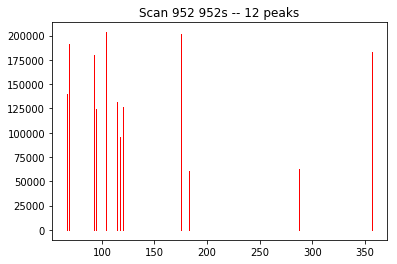

67.08092395496884 139761.46926392784
68.61900732191357 191618.0746045385
92.61118546048245 180169.7056697408
93.95788737983872 124273.99784088551
103.89886200493527 203476.43540140102
114.60626628473113 131709.8604088746
117.54927507982723 95461.50755512319
119.91687644662345 126758.35474063671
175.63582548133365 201882.62279113283
182.98203805524568 60462.01796958732
287.1626407230701 63072.118009893675
356.56705758315786 182668.48434363928
Scan 953 -- num_peaks=31 rt=953.00 ms_level=2


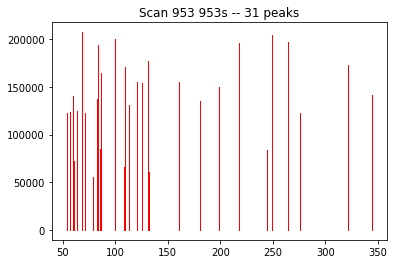

54.229624708686345 122413.5723586497
57.38179334066701 123242.87053852779
59.951052912584984 140795.2245870925
60.40566126968642 72589.48904917703
63.62161541798434 124755.85582134684
68.51988485083402 207279.63192682964
71.45470056645162 122345.44268589905
78.72992288639992 55238.13249213339
83.00705667471749 136776.6147127371
83.23481438306071 72619.26975281895
83.84837164027017 193446.48391946786
85.01663649255858 84489.03044456831
86.27080423102748 164251.25558479963
99.82676918286775 200283.5886160831
108.40885175574923 65710.10095594072
109.43088886765064 170690.1554895933
113.01715730795169 131119.47806600973
120.6066573471506 154582.57148058695
125.12962867326183 153947.32906048145
131.05779171160225 176738.17628063314
132.0165937219827 60920.3874361957
160.95967815731476 155466.59045833728
180.35537732310829 135000.84133927748
198.85116433947616 150338.20960598628
217.97891611564307 196072.89400870661
244.20317083819276 84304.15176602031
249.56075853930304 203907.57870527075
2

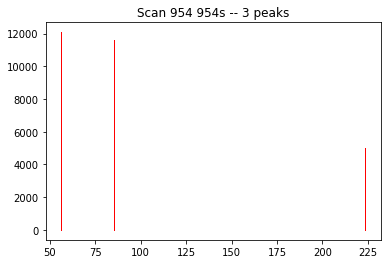

56.08180124176827 12079.811868273835
85.5594043687364 11628.443535759017
223.54635669505282 5004.528728588115
Scan 958 -- num_peaks=14 rt=958.00 ms_level=1
Scan 959 -- num_peaks=15 rt=959.00 ms_level=1
Scan 960 -- num_peaks=12 rt=960.00 ms_level=2


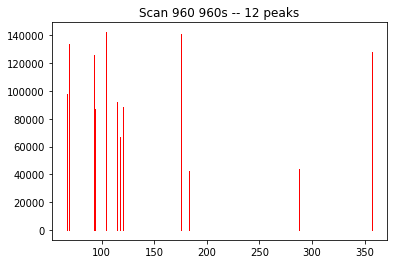

67.08092395496884 97661.10870447055
68.61900732191357 133896.94393063406
92.61118546048245 125897.16824912059
93.95788737983872 86838.92975794815
103.89886200493527 142183.2095869592
114.60626628473113 92034.88674372173
117.54927507982723 66705.62863665985
119.91687644662345 88574.9235946266
175.63582548133365 141069.50129950535
182.98203805524568 42249.03859781856
287.1626407230701 44072.89795697093
356.56705758315786 127643.23958756063
Scan 961 -- num_peaks=31 rt=961.00 ms_level=2


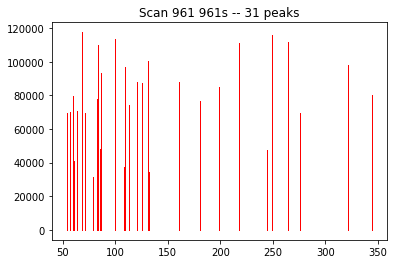

54.229624708686345 69382.66284164236
57.38179334066701 69852.69990453511
59.951052912584984 79801.18061270923
60.40566126968642 41142.921879530186
63.62161541798434 70710.24327770491
68.51988485083402 117483.8095058889
71.45470056645162 69344.04769445819
78.72992288639992 31308.364332959136
83.00705667471749 77523.47685296927
83.23481438306071 41159.801253934194
83.84837164027017 109643.33376663562
85.01663649255858 47887.45071484329
86.27080423102748 93095.80031017965
99.82676918286775 113518.52930940132
108.40885175574923 37243.76057385902
109.43088886765064 96745.29776832499
113.01715730795169 74317.0741882467
120.6066573471506 87615.69678571509
125.12962867326183 87255.64838742344
131.05779171160225 100173.24925539152
132.0165937219827 34529.003771607735
160.95967815731476 88116.74899338337
180.35537732310829 76516.98808803936
198.85116433947616 85210.03928181877
217.97891611564307 111131.9540412866
244.20317083819276 47782.66351867584
249.56075853930304 115572.566926757
264.437308

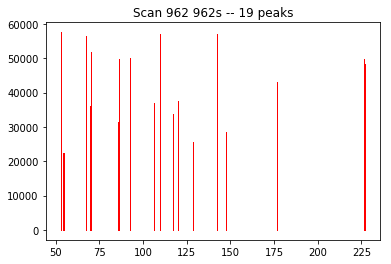

53.024250233278984 57578.713206277585
54.44008902096147 22468.590485076187
54.81050793971384 22444.329011554004
67.4889119002051 56578.01331782221
69.78080256277558 36046.01631861736
70.25130308949186 51719.45331044352
85.51957876035617 31447.529667599545
86.51604467661707 49916.78994746434
92.51596687538408 50142.86217789317
106.11252277774902 36831.640902478866
109.78235560062485 57138.660768015274
116.9836830725351 33752.04957664813
119.99963521780624 37480.1419445497
128.4273910775012 25622.789152170248
142.59459495906228 56949.384488371434
147.58805428039574 28498.66328691421
176.4775016066406 43179.70902743328
226.59438592637628 49704.556103711955
227.10324112468214 48472.695195729924
Scan 963 -- num_peaks=10 rt=963.00 ms_level=2


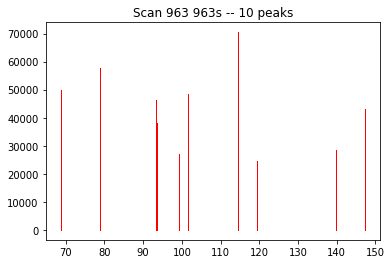

68.70999269183234 49816.66122234495
78.93551025622249 57872.30705622326
93.2651351517921 46486.770434900915
93.47516906334967 38067.83697802501
99.245323624588 27058.703793823326
101.6551694033614 48413.16783528124
114.53066392327788 70466.80004596665
119.32774804346896 24597.31585611945
139.7414583490767 28527.74204558024
147.38379041381498 43062.95430155228
Scan 965 -- num_peaks=15 rt=965.00 ms_level=1
Scan 966 -- num_peaks=14 rt=966.00 ms_level=1
Scan 967 -- num_peaks=14 rt=967.00 ms_level=1
Scan 968 -- num_peaks=16 rt=968.00 ms_level=1
Scan 969 -- num_peaks=17 rt=969.00 ms_level=1
Scan 970 -- num_peaks=8 rt=970.00 ms_level=2


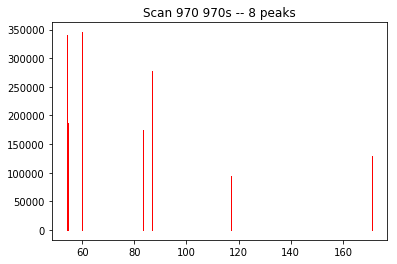

54.251440299678436 340412.9368789332
54.400428359218715 179499.15632680786
54.75031504415677 187090.79515465218
60.096682176835614 345323.49833813886
83.17752679373935 175405.74702710495
86.6385408528274 276899.95002530894
117.08119591109889 94617.02535678945
170.9742920337554 129887.74397453674
Scan 971 -- num_peaks=15 rt=971.00 ms_level=2


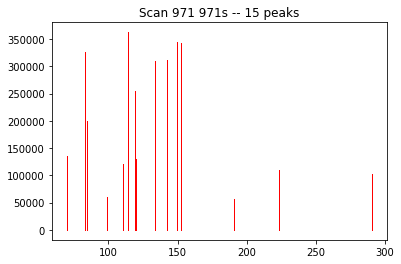

70.10399906048289 135162.2133035596
83.31027246773313 326712.06374374003
84.48192110533073 198838.11119248686
99.28820484695017 60681.09636431207
110.63907787228314 121586.74111593784
113.85696445303363 362454.8849801176
119.27114981626782 254941.35633369922
119.85023776955678 129978.15203519531
133.67735113432508 309108.43139977724
142.28419862184998 310993.81766852096
149.3354827848028 344003.5336932701
152.62122052408563 342368.94268764515
190.80197225709355 56917.619405141784
223.3540406794737 110773.77977906805
290.39056815835994 101756.38242482589
Scan 972 -- num_peaks=12 rt=972.00 ms_level=2


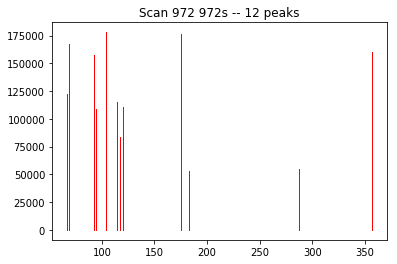

67.08092395496884 122239.47963543319
68.61900732191357 167594.78740288192
92.61118546048245 157581.70819990503
93.95788737983872 108693.68294631694
103.89886200493527 177966.45751176096
114.60626628473113 115197.306410915
117.54927507982723 83493.43399299838
119.91687644662345 110866.57434659835
175.63582548133365 176572.46226298704
182.98203805524568 52881.85401338027
287.1626407230701 55164.724051909696
356.56705758315786 159767.21330678576
Scan 973 -- num_peaks=29 rt=973.00 ms_level=2


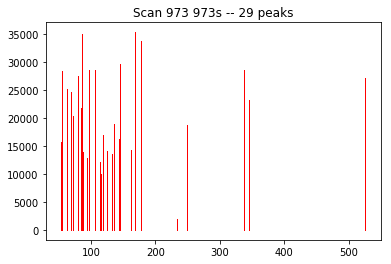

53.24391261150255 15750.048389008984
53.51474093912264 13512.573877925728
55.561730837504214 28382.348026798885
62.62694204979836 25209.096946680103
68.36739528398878 24645.206052962774
71.43399955433598 20326.76412190801
80.45060229453269 27502.945581275864
84.96604792168141 21777.657256210256
85.23332454166054 35015.313742672355
87.85530354837849 13969.636652894918
93.32792216683207 12859.098418164054
96.67727008285586 28592.233651072882
106.59569202202017 28569.80288680202
113.1508497277041 12087.27865062479
115.46039898693108 10010.473089677893
117.97879776484034 16893.952632078937
124.90409273690084 14183.168246026084
133.157952999122 13597.060886252415
135.8315973091097 18926.121595433582
143.7037116897262 16207.579407072304
144.99049074230496 29704.044654291574
162.21573785486285 14372.572073031077
168.08249865643816 35330.231071547176
177.5081487869823 33804.398766704064
233.41065811330833 1940.0105832738816
249.63901064153634 18815.67119323854
336.8968355159217 28597.106078141

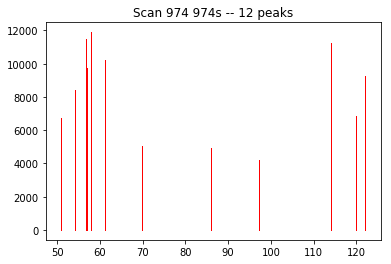

50.909396086610485 6724.062722684004
54.27054623873071 8393.172868655163
56.866163773982514 11457.876526244188
56.9315904535869 9728.309345951575
57.90851416866108 11892.681181194554
61.113703801568576 10234.976408217404
69.80283319537747 5062.520850206917
86.05216587409868 4954.992517578053
97.2866657379452 4231.223088794239
114.16161540357596 11256.34426586959
119.92485392426974 6858.951526908807
122.06613569608135 9251.769939975666
Scan 980 -- num_peaks=20 rt=980.00 ms_level=1
Scan 981 -- num_peaks=21 rt=981.00 ms_level=1
Scan 982 -- num_peaks=21 rt=982.00 ms_level=1
Scan 983 -- num_peaks=18 rt=983.00 ms_level=1
Scan 984 -- num_peaks=18 rt=984.00 ms_level=1
Scan 985 -- num_peaks=16 rt=985.00 ms_level=2


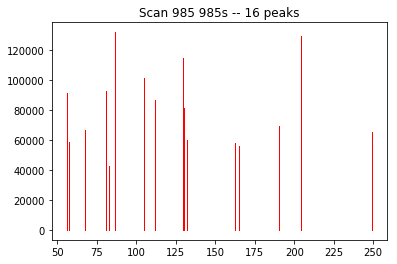

56.35226370544302 91487.5873242073
57.632209322680765 58909.220354198966
67.66670139093446 66824.35177622788
80.93161489322762 92503.34340728824
82.87658858845133 42687.327402817
86.70784448171293 131788.9300163339
104.65423543006233 101375.60795884873
111.71176113216588 86431.43135424478
129.85268801827564 114514.25997841463
130.48057067999994 80967.4718683692
132.20863766441204 59827.454967608326
162.23096804085256 57983.69962039832
165.07443968684893 56113.8015288903
190.47743406029113 68954.21418456228
204.3470412324454 129067.61315319945
248.9171364317238 65321.45306313954
Scan 986 -- num_peaks=9 rt=986.00 ms_level=2


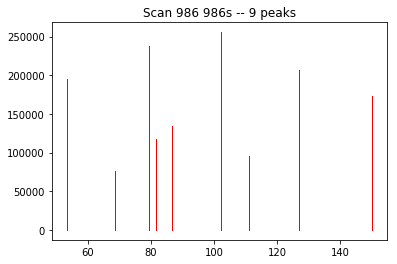

53.38503239449819 195380.33379128124
68.63633332471206 76183.86319751573
79.23538605635143 238289.02142301775
81.59321481209368 117527.23294699012
86.50562191992695 134242.87589201622
102.33264752711699 255533.00274619
110.93563904869691 96191.129399405
126.93915528751496 206829.54350674298
149.9360338938147 173619.35910755524
Scan 987 -- num_peaks=4 rt=987.00 ms_level=2


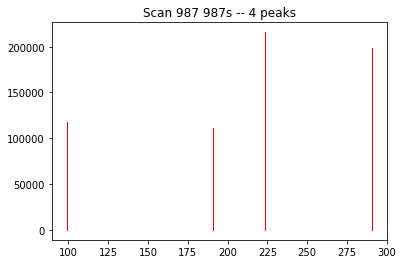

99.28820484695017 118181.87013749804
190.80197225709355 110852.16167963124
223.3540406794737 215741.85769308227
290.39056815835994 198179.66869275263
Scan 988 -- num_peaks=12 rt=988.00 ms_level=2


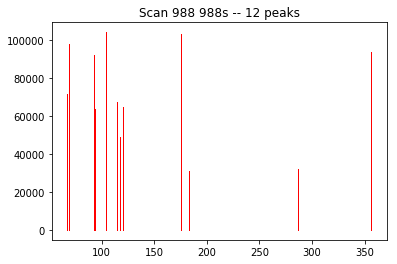

67.08092395496884 71579.23791934217
68.61900732191357 98137.7472918751
92.61118546048245 92274.4322588541
93.95788737983872 63647.284945482854
103.89886200493527 104211.04083466915
114.60626628473113 67455.58331765083
117.54927507982723 48890.8852877296
119.91687644662345 64919.65546749015
175.63582548133365 103394.76512842427
182.98203805524568 30965.796167725577
287.1626407230701 32302.566400339274
356.56705758315786 93554.18893391448
Scan 990 -- num_peaks=16 rt=990.00 ms_level=1
Scan 991 -- num_peaks=15 rt=991.00 ms_level=1
Scan 992 -- num_peaks=15 rt=992.00 ms_level=1
Scan 993 -- num_peaks=16 rt=993.00 ms_level=1
Scan 994 -- num_peaks=15 rt=994.00 ms_level=1
Scan 995 -- num_peaks=10 rt=995.00 ms_level=2


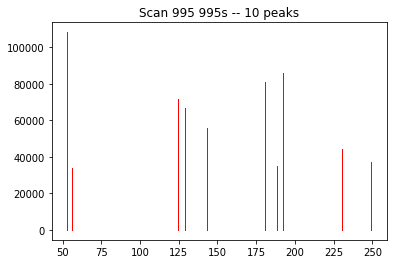

52.79058630993895 108204.73846070988
56.024619643069784 33787.976405636684
124.61375033968856 71408.6774654956
129.2690620679234 66749.09474063353
143.22941050342504 55956.836058728615
180.57161649456526 80991.19473123287
188.53994462346563 35077.94821456257
192.39415943189476 86135.86754447383
230.35137114201967 44463.722888967626
249.4506417575026 36924.41970601478
Scan 996 -- num_peaks=12 rt=996.00 ms_level=2


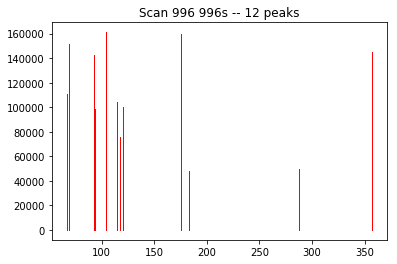

67.08092395496884 110661.51226000332
68.61900732191357 151720.97162233593
92.61118546048245 142656.28572637745
93.95788737983872 98398.7118058885
103.89886200493527 161110.2843250197
114.60626628473113 104286.3416445339
117.54927507982723 75585.31578342665
119.91687644662345 100365.79681843135
175.63582548133365 159848.32196414698
182.98203805524568 47873.125390310386
287.1626407230701 49939.77236484062
356.56705758315786 144634.78973261733
Scan 997 -- num_peaks=8 rt=997.00 ms_level=2


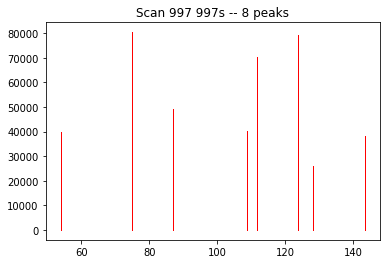

53.98066548397005 40039.8386903818
74.96001017790203 80441.49998725543
86.93538539440141 49304.272279949386
108.82612073066447 40268.09563592322
111.68356657024756 70299.28327019296
123.67012140109695 79375.47320432708
128.23603526290586 25883.154412767297
143.5823089602899 38163.658354875224
Scan 998 -- num_peaks=17 rt=998.00 ms_level=2


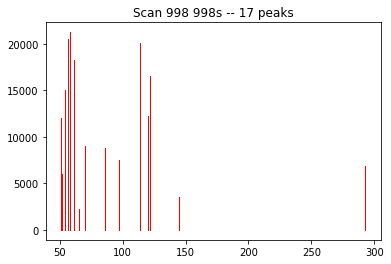

50.909396086610485 12005.731564248197
51.87524456188857 6011.034873212253
53.845836809978955 6866.072327912972
54.27054623873071 14985.907269047993
56.866163773982514 20457.898080920822
56.9315904535869 17369.777082454253
57.90851416866108 21234.236462270117
61.113703801568576 18274.424911138052
65.39759099229903 2275.5688190034093
69.80283319537747 9039.068918996178
86.05216587409868 8847.078399226304
97.2866657379452 7554.796956479851
114.16161540357596 20098.064700510622
119.92485392426974 12246.573870653541
122.06613569608135 16518.921814755417
144.45010930271468 3517.537596643661
292.83751869203905 6889.811442187526
Scan 999 -- num_peaks=22 rt=999.00 ms_level=2


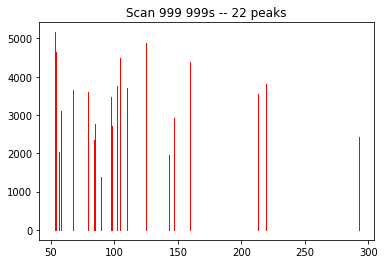

52.898778879281366 5161.75325269431
53.92096353470309 4654.812672779554
56.04156920280014 2030.712250098515
57.93077418904094 3104.3830395692385
67.30512781744875 3663.361061127009
78.95153253945685 3609.2364147781423
83.87419911122797 2351.7752707726613
84.62772312143515 2756.687319634558
89.24569567742152 1383.8332539811017
97.26046594216736 3466.646134832777
97.9098666693191 2716.9604514062326
98.16567999321231 2538.59071686012
101.69658644810222 3747.938059777077
104.27170074465919 4500.763718479295
109.56837888911811 3698.9032183294776
125.17978315552665 4893.163509295431
143.29547905297554 1958.652860018898
147.31678503073064 2924.1902978316093
159.2986685025622 4391.326646184091
213.12485769938624 3549.3808662615274
219.19915607884494 3800.0131259636146
292.4910072782518 2429.1845038071892
Scan 1003 -- num_peaks=4 rt=1003.00 ms_level=2


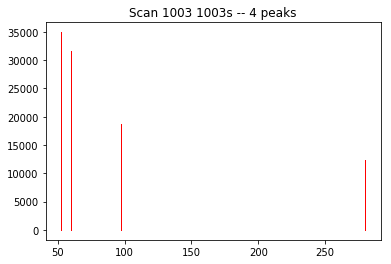

52.304556591960264 34921.76068126586
60.14891120031923 31637.048292692194
97.3368119668913 18712.88721427764
280.1662323995943 12425.014843654477
Scan 1005 -- num_peaks=18 rt=1005.00 ms_level=1
Scan 1006 -- num_peaks=19 rt=1006.00 ms_level=1
Scan 1007 -- num_peaks=21 rt=1007.00 ms_level=1
Scan 1008 -- num_peaks=19 rt=1008.00 ms_level=1
Scan 1009 -- num_peaks=20 rt=1009.00 ms_level=1
Scan 1010 -- num_peaks=7 rt=1010.00 ms_level=2


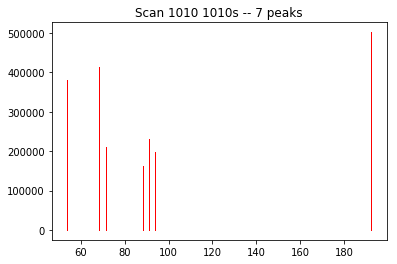

53.70212664903993 380907.3914427356
68.45213424714231 414071.9532850218
71.27876112695766 209387.20422733427
88.28793786541613 162321.8794743505
90.90995963227763 230459.49843704625
94.01459986028044 198570.24476126552
192.48579024654373 501702.72561907355
Scan 1011 -- num_peaks=5 rt=1011.00 ms_level=2


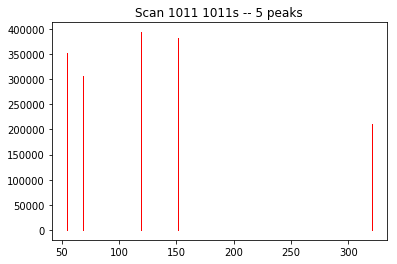

54.813689937458236 351547.7159452558
69.02023947320997 305364.3255351354
119.05436346758984 393331.4972266856
151.45528235266727 381483.1065897542
320.2733003627768 210223.6198344649
Scan 1012 -- num_peaks=3 rt=1012.00 ms_level=2


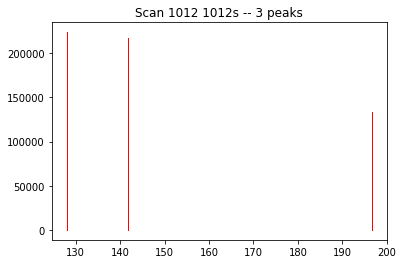

128.09493934000372 223696.3926064356
141.81367347141725 217250.75698679508
196.56859807146884 133729.64542980146
Scan 1013 -- num_peaks=9 rt=1013.00 ms_level=2


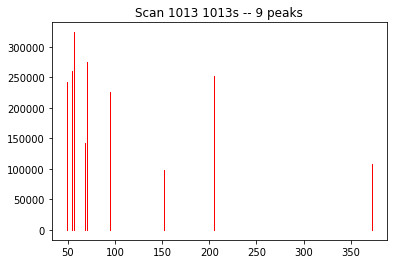

49.16546724338456 241993.12752285515
53.85346923225908 260483.7024226948
56.75246906267035 323753.27100975555
67.93159976445003 142946.7530508304
70.53676143069534 275178.44525544456
94.80199604901118 225743.03436137052
151.86581251989537 97337.67840465344
204.7553595523871 252070.3358893091
372.0212544653704 108448.64116197519
Scan 1014 -- num_peaks=12 rt=1014.00 ms_level=2


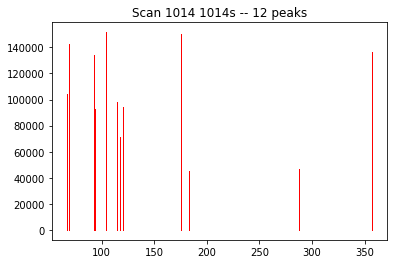

67.08092395496884 104151.06584185873
68.61900732191357 142794.91200067406
92.61118546048245 134263.5203875941
93.95788737983872 92609.7113870118
103.89886200493527 151631.83195175327
114.60626628473113 98150.95974386153
117.54927507982723 71138.47479637829
119.91687644662345 94461.0687060454
175.63582548133365 150444.11345547618
182.98203805524568 45056.65007420916
287.1626407230701 47001.71191838904
356.56705758315786 136125.62489722812
Scan 1020 -- num_peaks=19 rt=1020.00 ms_level=1
Scan 1021 -- num_peaks=17 rt=1021.00 ms_level=1
Scan 1022 -- num_peaks=17 rt=1022.00 ms_level=1
Scan 1023 -- num_peaks=17 rt=1023.00 ms_level=1
Scan 1024 -- num_peaks=17 rt=1024.00 ms_level=1
Scan 1026 -- num_peaks=10 rt=1026.00 ms_level=2


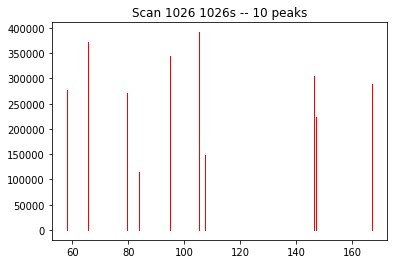

58.117559664687704 277958.997621401
65.39142573109874 371779.4182674605
79.42180461644614 272140.71686601307
83.74676710649177 114747.78770235382
94.88994128013931 343545.1074865289
105.10781398743472 391473.327138628
107.37175765792523 149093.28158111856
146.35184504661333 305632.06151603756
146.8468969708538 223944.376496123
166.86496885110986 289767.02266787
Scan 1027 -- num_peaks=3 rt=1027.00 ms_level=2


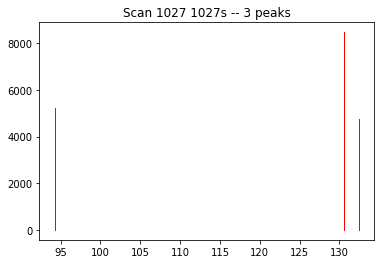

94.24138686004153 5218.22160398133
130.52560867024687 8469.145997090116
132.43825412682227 4771.14363269023
Scan 1028 -- num_peaks=14 rt=1028.00 ms_level=2


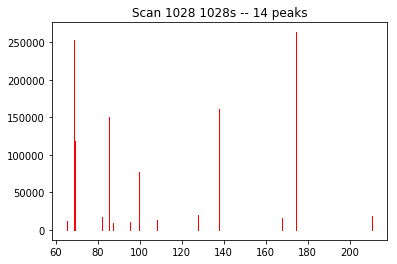

65.5080526341776 11887.775446935062
68.66300616887705 253377.1381017905
69.43957604327095 118568.93327109564
82.22774635723732 17058.036430124892
85.31492543774418 150272.12125602574
87.31547351906771 9073.960223172151
95.28727554538926 10818.790720122151
99.85140372632598 77364.41142093284
108.37558773731622 13822.099295330327
127.93875765849354 20311.496123556033
137.93283603161956 160711.55379718926
167.78360906706 15659.94674371432
174.52713067476225 263267.00453185814
210.39607972377092 18931.468693817118
Scan 1029 -- num_peaks=3 rt=1029.00 ms_level=2


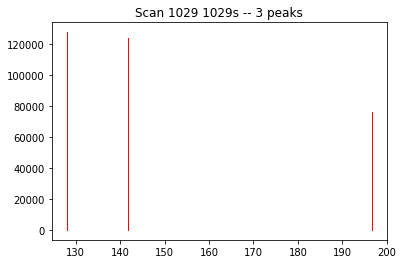

128.09493934000372 127883.66424221221
141.81367347141725 124198.79703534587
196.56859807146884 76451.10802239557
Scan 1033 -- num_peaks=15 rt=1033.00 ms_level=1
Scan 1034 -- num_peaks=15 rt=1034.00 ms_level=1
Scan 1035 -- num_peaks=12 rt=1035.00 ms_level=2


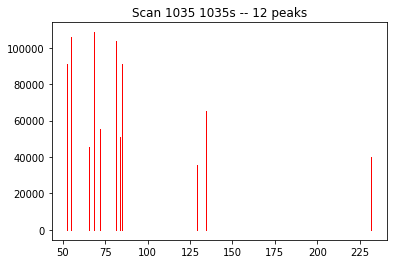

52.527042601314555 90963.86701450933
54.87743305294191 106117.57013189066
65.60045755903471 45491.586909023994
68.19426011876557 108551.44913266474
68.42097175398263 92603.45793560923
71.83994017427946 55574.61937877307
81.1335129469316 103900.59576666834
84.00464592438699 50884.70881463954
85.20007544995623 91257.97825223385
129.15120621414047 35863.04856312846
134.43167389665095 65443.66688831749
231.89614994958657 39947.5650950719
Scan 1036 -- num_peaks=10 rt=1036.00 ms_level=2


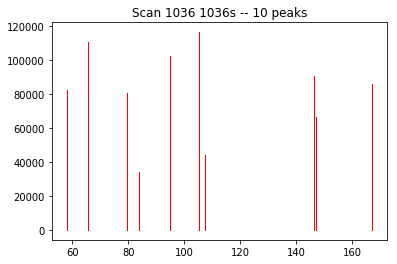

58.117559664687704 82713.06769005377
65.39142573109874 110631.48324779267
79.42180461644614 80981.70495641911
83.74676710649177 34145.83306432947
94.88994128013931 102229.71723629588
105.10781398743472 116491.85701328366
107.37175765792523 44366.12161175036
146.35184504661333 90947.82183255476
146.8468969708538 66639.77971729651
166.86496885110986 86226.8160605409
Scan 1037 -- num_peaks=17 rt=1037.00 ms_level=2


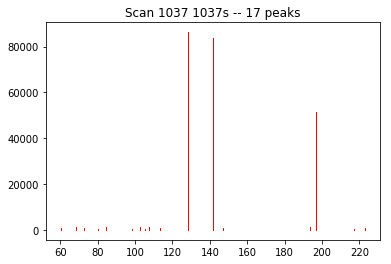

60.31235349526506 958.1430322977756
68.58458180665187 1277.3379080847403
72.66406403697113 929.6459392097886
79.97672558614977 542.2188508316852
84.55290601800661 1141.2053024304307
98.38254101235295 383.1656649385011
102.68701491738496 1159.9584453406753
105.42242855325688 380.1170192279118
107.23425754661649 1273.487186005909
113.2981618726836 798.5959934791701
128.09493934000372 86291.57247881219
141.81367347141725 83805.14868465296
146.79803319670998 645.2529797306202
193.43800048313207 1421.5027343303934
196.56859807146884 51586.62263934772
217.2747424187074 408.49938630430375
223.0475422219576 737.5720504050246
Scan 1038 -- num_peaks=9 rt=1038.00 ms_level=2


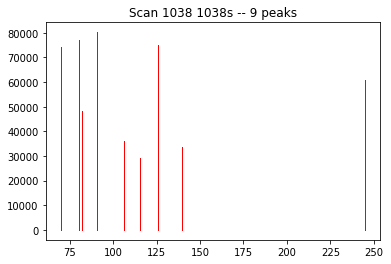

69.90768890857284 74204.72067145449
80.13059448802927 77121.2950037877
82.37608537815446 48167.452723462426
90.45915674683545 80238.50829186721
106.32126502567726 36199.535155607766
115.51553389445846 29207.732202124986
125.66214476914571 75111.36028929765
139.80481670789942 33528.38684652238
244.99925019787892 60657.44301677437
Scan 1040 -- num_peaks=19 rt=1040.00 ms_level=1
Scan 1041 -- num_peaks=19 rt=1041.00 ms_level=1
Scan 1042 -- num_peaks=20 rt=1042.00 ms_level=1
Scan 1043 -- num_peaks=20 rt=1043.00 ms_level=1
Scan 1044 -- num_peaks=19 rt=1044.00 ms_level=1
Scan 1045 -- num_peaks=6 rt=1045.00 ms_level=2


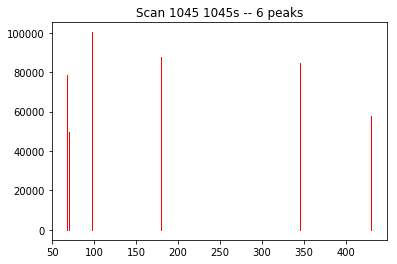

67.37280243034901 78479.05325659046
70.27889647487787 49901.876643165735
97.37697533644912 100282.80739333057
179.7462656707199 87627.40392346776
344.96731119500095 84801.28797110102
430.74825488998226 57567.932039580985
Scan 1046 -- num_peaks=29 rt=1046.00 ms_level=2


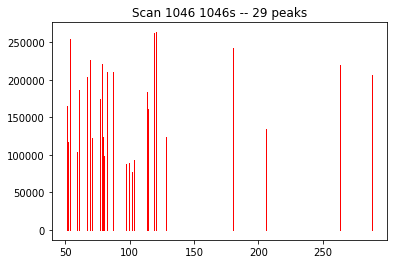

51.634308707990265 165589.55420471315
52.08660536923687 116790.89461199722
53.5615157266302 253888.0491145645
53.6712747830364 250419.55538919455
59.52511468158049 104092.74603357232
60.632311157525564 186244.37727569175
67.0450273157134 204111.6355956736
69.2081360583733 226627.44282403687
71.0652515495406 122480.80236498275
77.2492360017439 174326.7453561773
79.03032323028582 220795.34691384528
79.41664119001759 124277.91086925639
80.31802030624574 98635.37442060086
82.2043221770817 210416.80588722718
87.17487488083741 210433.18485659864
96.99521398982472 88163.83893387152
99.83305612853773 89540.27212332116
101.67844328980101 77210.0651618316
103.63473564630515 92707.19425035837
113.83658206575433 183516.1153809301
114.65580532129412 161299.59109561637
119.21585539680468 262161.7772603248
120.55286457966334 263475.4334821605
128.2330031563265 124062.04761925779
180.43442713534563 242282.52336603805
205.8493926174734 134344.5547068715
262.9414736060799 117866.68758524218
263.46450799

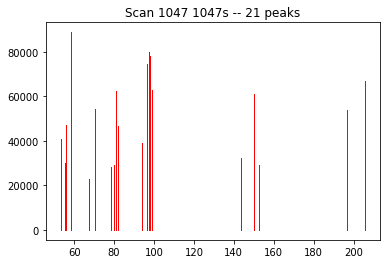

53.284881720237266 40718.523029127944
55.45982864571538 30158.547241541113
56.08328603019983 47332.9174487356
58.5171569549616 88805.41153947098
67.64195522705273 22920.63212386849
70.26834871867987 54120.8808869408
78.31194181541068 28050.09495648425
79.70952806915543 29368.108732855897
80.99552884795486 39257.562857071025
81.11273585788679 62611.23780575471
81.94569281823438 46521.14936809736
93.7554084576693 39064.37254249165
96.71959418989002 74402.13572411564
97.54686877260231 80083.79481109952
98.09626228793546 78309.54225768047
98.85917982572286 62761.223582691455
143.728541189993 32444.780352255628
150.10027544149847 61000.2058651418
152.70629208191303 29166.984130792185
196.8450363307971 53940.16451742807
205.83596973603207 66713.16188659615
Scan 1048 -- num_peaks=10 rt=1048.00 ms_level=2


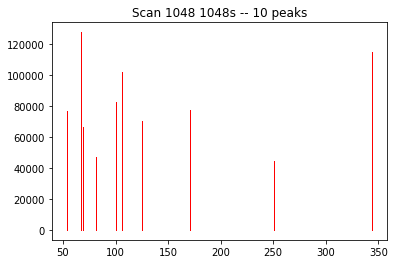

53.99197352819477 76909.62839565992
66.8571435291924 127419.4203088256
68.78664581522297 66333.00255262663
81.43940517864654 47264.78312512205
100.61085731316486 82602.91433105279
105.75031806762546 101715.803091361
125.16193734395993 69948.85481392578
170.7719636568187 77485.0118356781
250.69940245649457 44428.21799671142
343.58009567262343 114979.35737387091
Scan 1049 -- num_peaks=11 rt=1049.00 ms_level=2


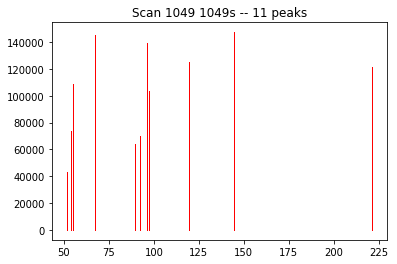

51.774092585017975 43145.64100091894
53.79783517908343 73442.75793514025
54.941333041489266 108410.5089741546
67.44875842658197 145632.04372108408
89.56697002535361 63745.19539095343
92.4514241044687 69751.86143970935
96.46043869198337 139661.84320390585
97.05910033768575 103179.61144603817
119.30140457467691 125332.61306808922
144.61821178744836 147344.72138999705
221.0985884558111 121116.800298868
Scan 1052 -- num_peaks=6 rt=1052.00 ms_level=2


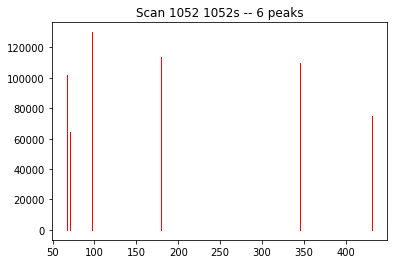

67.37280243034901 101713.5142066228
70.27889647487787 64675.79600236237
97.37697533644912 129972.47458034247
179.7462656707199 113570.32002817429
344.96731119500095 109907.5058995332
430.74825488998226 74611.45911392722
Scan 1054 -- num_peaks=7 rt=1054.00 ms_level=2


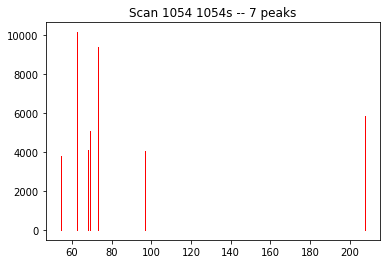

54.42350959403292 3783.821898173422
62.3530700060577 10128.68446777454
68.06635210117969 4109.117289882579
68.95122617762372 5067.446660475088
72.96431643613778 9379.879318550255
96.64882660272366 4045.322226977004
207.7028810099845 5813.892798414764
Scan 1060 -- num_peaks=21 rt=1060.00 ms_level=1
Scan 1061 -- num_peaks=22 rt=1061.00 ms_level=1
Scan 1062 -- num_peaks=24 rt=1062.00 ms_level=1
Scan 1063 -- num_peaks=23 rt=1063.00 ms_level=1
Scan 1064 -- num_peaks=23 rt=1064.00 ms_level=1
Scan 1065 -- num_peaks=3 rt=1065.00 ms_level=2


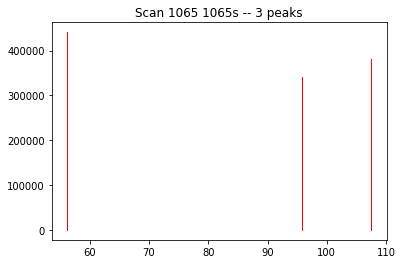

56.169620661318945 441014.91733907117
95.84201635012779 341872.28482235665
107.534133840092 381231.8328710113
Scan 1066 -- num_peaks=11 rt=1066.00 ms_level=2


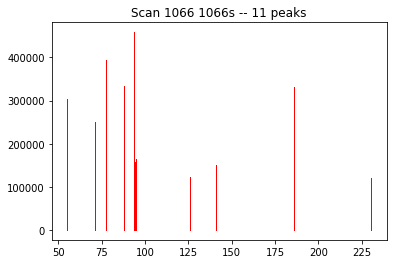

55.01788013208944 304042.0064303111
71.02471417220967 249541.16971268045
77.28837991220074 393148.3566870733
87.60312191404684 333089.59935924143
93.66086819856562 458585.26735518716
94.23547495838193 156772.67931480374
95.03919479789559 164176.04127162186
125.89348732887913 121627.89029839032
140.72040689816208 150383.12813903313
186.02516288221636 331604.624514654
230.53400120976752 120469.98238697245
Scan 1067 -- num_peaks=31 rt=1067.00 ms_level=2


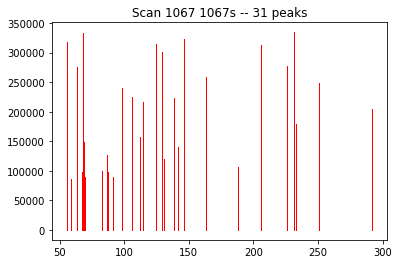

55.85951986539075 317738.03606384393
58.78036436732532 86459.41810213777
63.33567800013237 275482.1797924115
67.64937652366605 98109.70930314733
68.36736165451025 333931.34819909715
68.9231113881985 148737.11773128633
69.69855960495576 90009.16470010542
82.50680112226703 99365.94769367705
86.7681489762131 126331.65143293884
86.82167275114382 125602.09378610787
87.3111785296839 97808.39151371062
91.02919859047307 89609.65651192669
98.04201170064817 240088.62346009523
105.8122171295034 225195.3577960347
111.848319580234 156384.72243106403
114.58723695947394 215890.2420255334
124.96663866801498 314746.68230453914
129.59437673911668 301366.86217754043
130.80721472987304 119745.89764557846
138.44236887718623 222888.83226172553
141.73727914424757 140613.8054667173
146.06889494100906 323203.79252989875
163.0616612229705 258161.0593967261
187.90679477807126 107150.00227958587
205.83861691403357 312442.9792369875
225.73694014951832 277950.8298902493
231.51581895402 334490.39288828213
232.918902

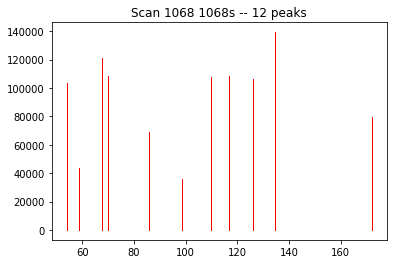

54.1719888767937 103455.03441255733
58.79221112052653 43944.4475073913
67.81555701047124 121132.28090445347
70.00924304989637 108222.02570859801
85.76935818430562 69201.97667015757
98.49482700699276 35658.998736380636
109.6876144769437 107542.9744510259
109.95425094738395 96561.53258626096
116.66225650889747 108151.84137643689
125.9130221460376 106434.35187723789
134.72085967517933 139225.05207923066
171.87536471598284 79773.91708762244
Scan 1070 -- num_peaks=21 rt=1070.00 ms_level=1
Scan 1071 -- num_peaks=21 rt=1071.00 ms_level=1
Scan 1072 -- num_peaks=22 rt=1072.00 ms_level=1
Scan 1073 -- num_peaks=22 rt=1073.00 ms_level=1
Scan 1074 -- num_peaks=22 rt=1074.00 ms_level=1
Scan 1075 -- num_peaks=11 rt=1075.00 ms_level=2


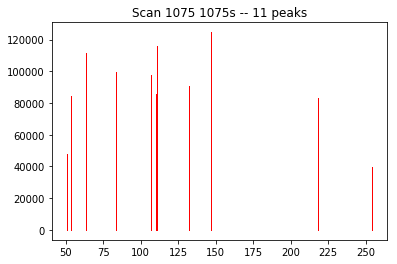

50.965470313635954 48121.50177498771
53.3485977842973 84291.89723159201
63.37028398909761 111365.58976402733
83.73832290939022 99809.61393891978
107.03871604340954 97546.43252716943
110.17909177618043 85869.31384621908
111.04825968603978 116220.07832346651
131.9400433039822 90609.19965360135
147.0856678200338 124608.11623493394
218.39605430339938 83087.27463515845
253.81951962351366 39798.25031666716
Scan 1076 -- num_peaks=24 rt=1076.00 ms_level=2


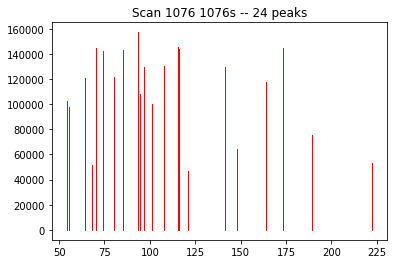

54.47202000778025 102176.32087924429
55.52116040775767 97415.82920772626
64.55570785057508 120803.02562590135
68.1815562650185 51544.8030201038
70.11276272256768 144514.702669684
70.5662296002112 50634.36919794152
73.99465179271432 142034.19867147974
80.23070395981185 121555.18800540929
85.00464945899192 142745.46828400792
93.36979386081968 157195.5400261711
94.8361481926186 107707.97522599915
96.71468898637326 73725.27258073131
96.77868447442414 129591.7636420236
100.96578031066173 100009.16721710177
107.98904500997159 130617.63033944137
115.33551992122142 145659.24968667582
116.3341066954538 143540.39958193505
120.94278510434896 46545.861854985196
141.63912100723797 129520.79742706048
147.87021268332558 64051.304116256935
164.06435402203826 117989.58313005875
173.2942988334693 144640.62506803073
189.56387290095887 75426.34934972097
222.09752465416992 52996.70351931208
Scan 1077 -- num_peaks=12 rt=1077.00 ms_level=2


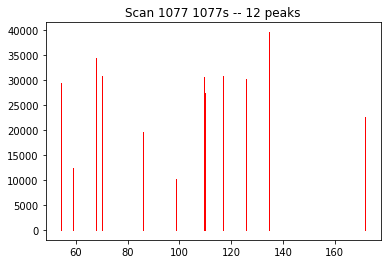

54.1719888767937 29353.260895904703
58.79221112052653 12468.342791970274
67.81555701047124 34368.819888699945
70.00924304989637 30705.797676697697
85.76935818430562 19634.652747888766
98.49482700699276 10117.515296758414
109.6876144769437 30513.130699799116
109.95425094738395 27397.370022708954
116.66225650889747 30685.884300568367
125.9130221460376 30198.581602906263
134.72085967517933 39502.27555510371
171.87536471598284 22634.2257219048
Scan 1078 -- num_peaks=42 rt=1078.00 ms_level=2


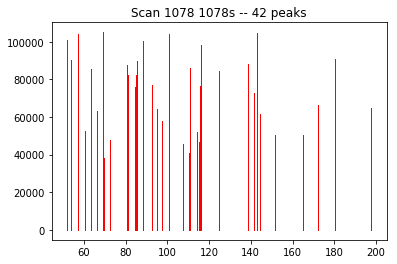

52.00068916277423 100991.70643638138
53.765037576829265 90204.40931939213
53.78943775342321 44542.76858349199
54.10947928961055 65102.20466550918
57.19572252290078 104293.9528353291
60.62981221373921 52772.06403054129
63.458411300751145 85709.74471507172
66.49754646973484 63243.62987716746
69.12205323126895 36144.76199377314
69.24938801155974 31625.61143122822
69.33734359726625 103048.09402852059
69.42777213282749 105041.95946768424
69.44142664180015 81961.57951033526
69.61273128645125 38143.0243683433
72.66359658284651 47526.222753606526
80.53047453994024 87760.67593028341
81.22101388226994 82561.55969394612
84.38971952712998 75813.1842763886
84.89154314974448 82490.77916724168
85.62119259328585 89851.01562151746
88.55059191209814 100233.13802829353
92.86977584175658 76890.08327685227
94.91320237124569 64366.22858221047
97.46235796870292 57667.44288087445
100.96600425521532 104313.38109305475
107.43767833372405 45795.66330303775
110.57010005112693 40801.35351641252
110.85634455297647 

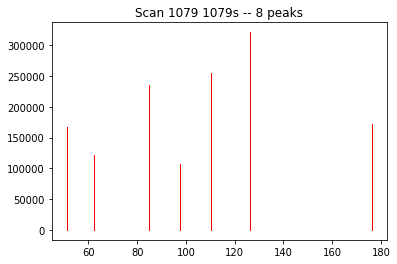

51.283837972043074 158942.17743478538
51.39430561374457 167485.48501066898
62.48033166303904 122039.44932471683
85.0326326653165 235531.76468501042
97.4542398060443 106583.04621549774
110.13063802717899 254106.24176044625
126.41751766255904 321095.95545977604
176.1297721643867 171590.5187399601
Scan 1085 -- num_peaks=25 rt=1085.00 ms_level=1
Scan 1086 -- num_peaks=25 rt=1086.00 ms_level=1
Scan 1087 -- num_peaks=25 rt=1087.00 ms_level=1
Scan 1088 -- num_peaks=23 rt=1088.00 ms_level=1
Scan 1089 -- num_peaks=23 rt=1089.00 ms_level=1
Scan 1090 -- num_peaks=6 rt=1090.00 ms_level=2


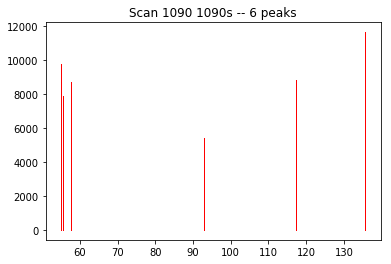

54.98503510393231 9735.347598493077
55.569671385509615 7894.385477451364
57.62007787394753 8665.752056380918
93.01345873278743 5398.927330540812
117.20219020252921 8785.590891344074
135.65829165448207 11619.870340799269
Scan 1091 -- num_peaks=2 rt=1091.00 ms_level=2


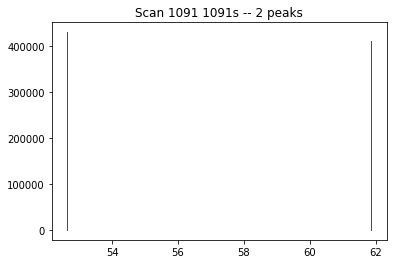

52.63365056987959 429318.13177215256
61.869477371898626 410302.6895662411
Scan 1093 -- num_peaks=11 rt=1093.00 ms_level=2


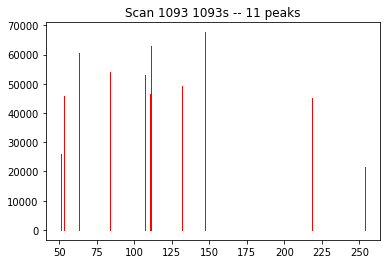

50.965470313635954 26131.950560169946
53.3485977842973 45773.95986888755
63.37028398909761 60476.08612519187
83.73832290939022 54200.716949303205
107.03871604340954 52971.71655282564
110.17909177618043 46630.56183403342
111.04825968603978 63112.27266033679
131.9400433039822 49204.51437106221
147.0856678200338 67667.32152444415
218.39605430339938 45119.80035655854
253.81951962351366 21612.08339921307
Scan 1094 -- num_peaks=6 rt=1094.00 ms_level=2


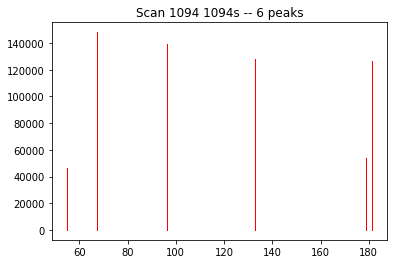

54.9830158256996 46163.08296300799
67.20404864641952 148034.10527208957
96.56000693999505 139374.8337642201
132.68264795101186 128302.03116690886
178.9419706093347 53825.238640958756
181.14849854550187 126158.80065995497
Scan 1100 -- num_peaks=17 rt=1100.00 ms_level=1
Scan 1101 -- num_peaks=17 rt=1101.00 ms_level=1
Scan 1102 -- num_peaks=18 rt=1102.00 ms_level=1
Scan 1103 -- num_peaks=20 rt=1103.00 ms_level=1
Scan 1104 -- num_peaks=20 rt=1104.00 ms_level=1
Scan 1105 -- num_peaks=2 rt=1105.00 ms_level=2


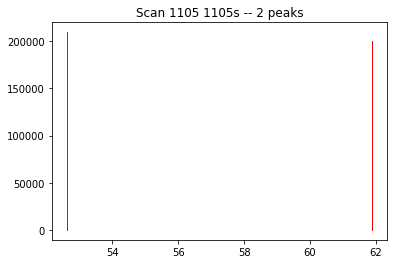

52.63365056987959 209511.15454405398
61.869477371898626 200231.44573166076
Scan 1106 -- num_peaks=7 rt=1106.00 ms_level=2


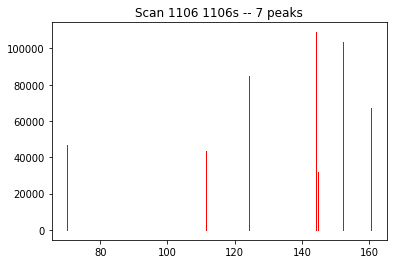

70.16203618656864 47001.126773799515
111.38524643685331 43422.452760788445
124.11254720577747 84867.78984577915
144.0317925644615 108931.13071000775
144.61582800898688 31642.265001647153
152.24444190672688 103755.62930536381
160.6053530193241 67342.31025323077
Scan 1107 -- num_peaks=9 rt=1107.00 ms_level=2


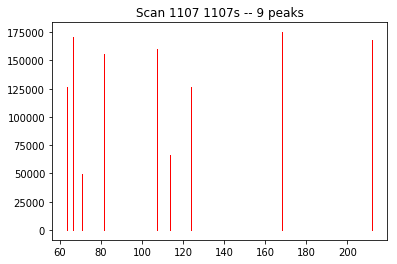

63.553114476743055 126214.89325537694
66.37054401341734 170786.58460066543
70.51375336849857 49549.85739806354
81.67550354095309 155792.46444443168
107.39344568518138 160281.40070391522
113.78700887947596 66338.05210137961
123.90497611730413 126301.21197630776
168.38847194823674 175017.0533346502
211.82153529421808 168288.11081684413
Scan 1108 -- num_peaks=34 rt=1108.00 ms_level=2


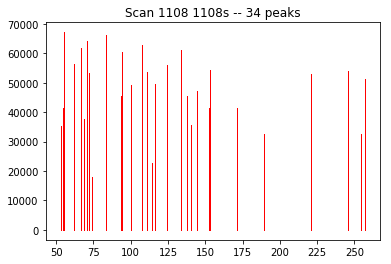

53.08084852026474 35202.04409599091
54.59493058430186 41528.63142038147
54.975767930282714 67189.46759071549
62.16785593571582 56317.89669739106
66.7803755622907 61900.65065762523
68.66509018711918 37831.27147681279
70.54236812894005 64331.259710215134
72.02304815108697 53372.35089450526
73.68581634229676 18045.899117950034
83.20513345992408 66176.16908294245
83.26214845497513 29913.43274602768
93.5574126994547 45478.54840828744
94.06276486829668 35550.026484911534
94.22907792438382 60598.20535599943
100.30479846153456 49205.61464756992
107.26263385783234 62941.80941775752
110.95808909285364 53832.60309559099
114.29230469361269 22714.718376117668
116.21516095834365 40625.56223418909
116.58501401702134 49485.694144993104
124.24673907300503 56184.97487061349
133.6273692481899 61056.51812810115
137.5161154629854 45372.17861693333
140.5877059361398 35592.00690277942
144.20123348905904 47130.06042448319
152.33781897808794 41327.520263259634
152.53613637563555 38927.14365795968
153.334252148

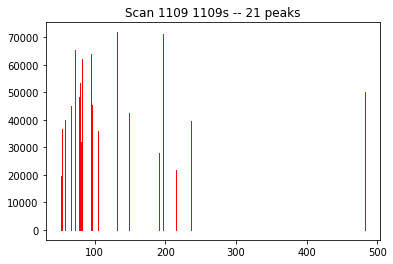

52.24430661835961 19469.660716234608
54.229924557619576 36571.32854603022
58.200072973457225 39873.60557927848
67.1430848449471 45108.65596722564
72.16917054226464 65395.940438496116
78.13347465360326 48249.08630108936
79.4609217537165 34691.109753550256
80.02825357974241 53296.95888504453
80.4869422841814 31882.935006855732
82.13139490838837 62323.22913218821
95.62563679546132 64039.784762702184
95.91320503056399 45388.62224403661
104.40602235944539 35996.311550494254
132.09707116221006 71882.28579607434
148.99220080994382 42688.39418256147
191.869200206777 28062.896237371024
196.2928389293453 19032.45952448612
197.3614530267577 71179.84197807964
215.83785111687644 21788.448680186808
236.87223643224453 39774.57554256588
482.79387284106497 50139.615761097855
Scan 1115 -- num_peaks=14 rt=1115.00 ms_level=1
Scan 1116 -- num_peaks=14 rt=1116.00 ms_level=1
Scan 1117 -- num_peaks=16 rt=1117.00 ms_level=1
Scan 1118 -- num_peaks=16 rt=1118.00 ms_level=1
Scan 1119 -- num_peaks=16 rt=1119.00 ms

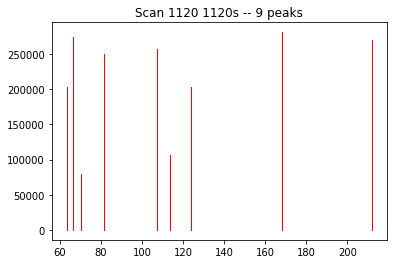

63.553114476743055 202473.53865813056
66.37054401341734 273975.30709364027
70.51375336849857 79487.7269126421
81.67550354095309 249921.78623889346
107.39344568518138 257122.92380535655
113.78700887947596 106419.29656808986
123.90497611730413 202612.01088140413
168.38847194823674 280761.81186070736
211.82153529421808 269967.2632312467
Scan 1121 -- num_peaks=9 rt=1121.00 ms_level=2


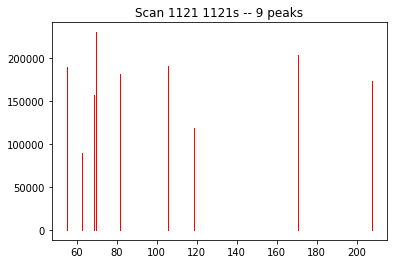

55.26790324858404 190035.6381098598
62.660303256152204 89540.71029559113
68.79163232429714 157490.5374089202
69.44416314399848 229971.0182542681
81.75758904498583 181786.9965624326
105.52803507340387 191082.57274389267
118.87393397607296 118532.29649294865
170.47061589279878 204024.69156018682
207.3648875304316 173819.36826116592
Scan 1123 -- num_peaks=6 rt=1123.00 ms_level=2


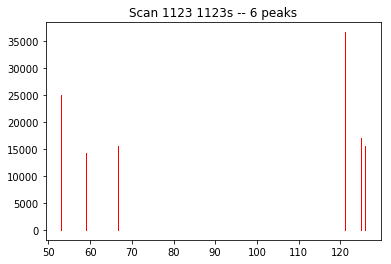

52.98775674442078 25056.69711842088
59.087449525583594 14351.808258185862
66.59534466821454 15655.561371530313
121.19954042830598 36690.24549534159
124.91389300878981 17044.419991988583
126.01391546374377 15575.615634894406
Scan 1124 -- num_peaks=11 rt=1124.00 ms_level=2


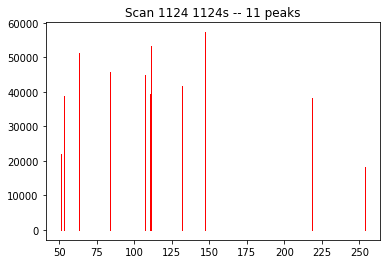

50.965470313635954 22102.556846532418
53.3485977842973 38715.883369036994
63.37028398909761 51151.02787142081
83.73832290939022 45843.283865718295
107.03871604340954 44803.788131750414
110.17909177618043 39440.40232853425
111.04825968603978 53380.72988378851
131.9400433039822 41617.46646077196
147.0856678200338 57233.416893349844
218.39605430339938 38162.59142189894
253.81951962351366 18279.62672756564
Scan 1130 -- num_peaks=20 rt=1130.00 ms_level=1
Scan 1131 -- num_peaks=20 rt=1131.00 ms_level=1
Scan 1132 -- num_peaks=21 rt=1132.00 ms_level=1
Scan 1133 -- num_peaks=21 rt=1133.00 ms_level=1
Scan 1134 -- num_peaks=21 rt=1134.00 ms_level=1
Scan 1135 -- num_peaks=11 rt=1135.00 ms_level=2


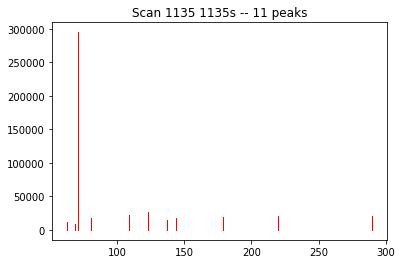

62.82173747474639 12152.267614952018
68.96897918200774 8146.3520646418
71.23222510075735 294976.2941834124
80.55930999905613 17180.418919269647
108.82021129385411 22906.163956062035
123.32984832638348 26019.393645283435
137.12054239051307 14521.529760112777
143.86779446483595 17145.22663679156
179.0151760388086 19675.59743993982
219.55381245932105 20678.53610870743
289.39249417133215 20896.913180220174
Scan 1136 -- num_peaks=41 rt=1136.00 ms_level=2


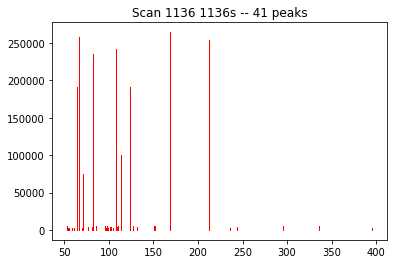

53.03495894402825 5814.966563951305
53.89574627866069 3186.7086972459438
54.658804362641604 2725.638383489731
55.41104142370308 2076.6249547912967
57.97917835892637 2229.3168136105382
60.92167855816878 2501.6106394350168
63.553114476743055 190502.60828020173
66.37054401341734 257776.94681295505
70.18028254375427 1909.6443989822444
70.51375336849857 74788.13974151203
70.81374544490576 5596.153130902857
76.69023747510981 3268.2357986539537
80.64831216807225 3304.652234080037
81.67550354095309 235145.5526489578
82.16550391231034 5822.659871013638
85.08817551730021 4857.347239963657
95.01833433844212 3835.7023693751753
95.77090015876385 4922.2263662054065
96.91666373743323 2605.822387168114
97.95404152175242 5538.667297077295
98.53447040774988 2440.2915387519506
101.13529243444081 4347.3694471656645
102.11336562959806 3778.6143237715414
104.4417304805369 2865.2433823759948
107.33844407497578 4901.822299431259
107.39344568518138 241920.93425233886
108.7409636112591 3528.291671394967
110.399

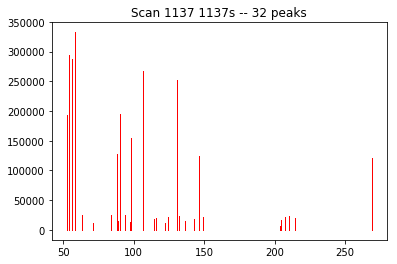

52.73745809131088 192772.93914891675
54.03143027599168 294435.50673455076
55.926816763001426 288198.6510264491
56.319611122676605 25368.123531761663
58.47434921030172 332637.2794045303
63.35001643563246 24857.540500364365
70.77539733575637 11190.821914427783
83.70488387473118 24921.535647590554
87.92531132388056 128251.17581031374
88.50235224466645 15220.07185667498
90.10218646506196 194677.7405364923
93.89038374572392 24673.9479486216
97.18376312595441 12807.88580151111
97.92159795267676 154960.85567978228
106.30684453537998 268258.0485238203
106.89645677666805 14881.036699552546
114.67317160818037 17970.267325909503
116.11230802715342 19980.081509139323
122.37633697673861 11820.532145360881
123.99694818688884 21679.716167775954
130.42659377509514 252857.18976049873
132.30642532209097 23397.06195384821
136.30510763629363 14956.022938177124
143.09640646649896 17728.67504670443
146.2425693163477 124722.31550643723
149.15626135510124 21100.15533290056
203.609759069281 7171.160103115913
2

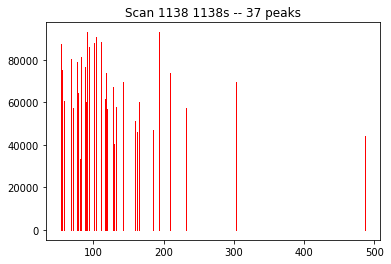

53.872745069668156 87527.50384993476
54.60511102625649 51785.20073009669
54.91716657580983 75188.2475618608
58.959368421932425 60652.54251555032
68.12688742117477 80492.07667767126
70.64563519067411 48177.42384423572
71.9424798431125 57291.47905057196
76.97093864393813 78891.23344443462
78.07483871666716 64489.73167111076
80.90899194784095 33575.38144779659
82.06317493127912 71100.60982404629
82.4661657949176 81381.56589191739
88.48999238622267 76764.29262788869
90.04348038091636 60199.19647096732
90.50015661857044 92986.08038723795
94.30628173391561 86081.89596466422
101.1168981041687 87741.65516305988
103.3890259766389 90954.59598579453
111.26267647711231 88269.96315901044
117.03687693572965 61648.50201153186
117.70081526116262 35792.12071325126
118.21424415208952 73804.13517239431
119.18816858178604 56912.08546275864
127.84177287454331 67262.6299472736
130.09621996378962 40583.99031599739
132.3110156805411 58015.084140185536
142.20209862763144 69494.58653105215
143.00789635829494 37

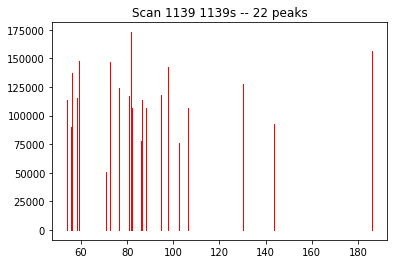

54.047426383655335 113970.04478656057
55.45382527165465 90265.63713583682
55.873040042762284 137238.34534334074
58.428266207089884 115050.9553295757
58.919884162850444 147369.5167411208
70.61682426479474 50669.0106496108
72.73343501204505 146869.9772049614
76.55331847182883 123705.14762323268
80.66737515768682 117225.95012206641
81.5500757703796 172911.09548491132
82.17773947550926 106352.59729128983
85.98197998861987 77684.66096268885
86.31106822577746 113570.39329841881
88.10812416414667 106471.51937289735
94.77546680595084 118324.75152086724
97.62318108045397 142758.22461910977
102.66705899638761 76190.90547104536
106.23470508727907 106299.0108621598
130.1590156661334 101113.33236896106
130.28039560247169 127697.46777867404
143.68117008229925 92447.15910330626
185.93633865479035 156910.14035891238
Scan 1141 -- num_peaks=47 rt=1141.00 ms_level=2


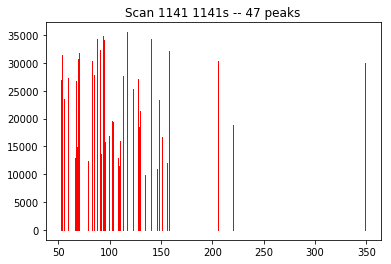

52.4741077187265 26954.62634906448
53.83281193442121 10121.120407989301
53.995517697554014 31475.02117311575
55.521069146795114 23606.967629383053
59.09077093487086 26975.107169395607
59.45544461396644 27387.869059161065
66.59769543457706 12856.50085648596
66.74200596044653 26830.417064602883
68.3486365627953 14814.949865163564
68.80003425039172 30654.640130470973
70.14203981655501 23748.007761999324
70.27937155124157 31840.97881098403
79.29614778210595 12348.397790483861
82.54102067021373 30429.785295106205
84.25344183591939 27751.398051899287
87.34541090480093 34267.33779443298
90.62003761215165 32314.337022782907
91.21460506684751 13730.018378675833
93.86790199183386 34893.7774190497
94.55254437416087 27545.276036977215
94.85259441090757 34207.248282789966
95.46556272680215 15800.709805947276
99.33538856253547 16849.100642581703
101.92395695198208 19495.713124301816
102.13595309010047 10799.327172999709
102.25553626373652 19430.030840688905
103.14084279213644 19447.808381315313
107.

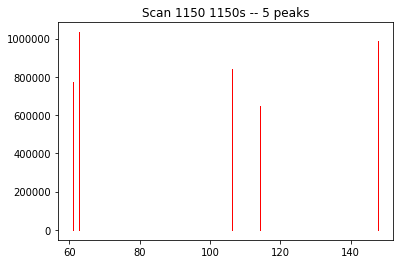

61.13752150500691 773020.5707963394
62.75856929603386 1033046.3935964024
106.24706495796642 839741.3556192921
114.15213318887415 648955.894323786
147.67638737738568 986260.3137987764
Scan 1151 -- num_peaks=22 rt=1151.00 ms_level=2


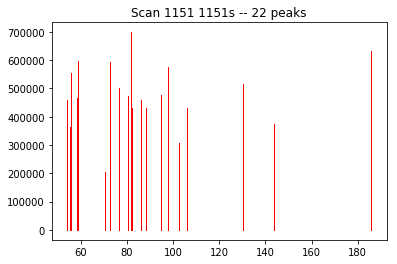

54.047426383655335 460401.6398138758
55.45382527165465 364643.5994125726
55.873040042762284 554397.9504416924
58.428266207089884 464768.16425833193
58.919884162850444 595324.5635136511
70.61682426479474 204686.20183940136
72.73343501204505 593306.587456606
76.55331847182883 499728.26566678664
80.66737515768682 473554.4306051137
81.5500757703796 698504.1732005561
82.17773947550926 429629.64771203266
85.98197998861987 313820.5777016989
86.31106822577746 458787.1787435208
88.10812416414667 430110.05395811883
94.77546680595084 477993.2282451873
97.62318108045397 576696.4541836015
102.66705899638761 307786.29492922476
106.23470508727907 429413.1760953948
130.1590156661334 408464.73401758855
130.28039560247169 515855.9310517522
143.68117008229925 373456.233407706
185.93633865479035 633865.5570414189
Scan 1153 -- num_peaks=16 rt=1153.00 ms_level=2


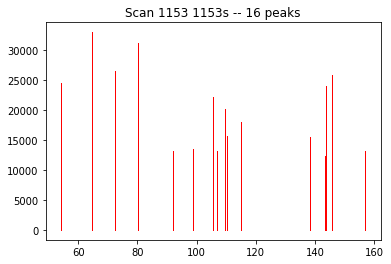

54.11022751458878 24460.071601048443
64.7464989192232 32973.13557121129
72.52858671855 26573.339921780615
80.24040685139312 31171.400704561616
91.91771189890096 13187.952430931642
98.8851143957747 13530.923900598173
105.39668682494954 22253.969741678746
106.8312683171628 13098.648313346075
109.67739982939388 20250.85802996609
110.29407412488125 15650.65309936994
115.16014472268608 17956.52566391574
138.30722886427904 15561.312490341294
143.45221360516996 12398.126763379341
143.77790095326833 24030.81844856366
145.70075580557955 25775.967704400846
157.01779007613885 13231.834688114448
Scan 1154 -- num_peaks=9 rt=1154.00 ms_level=2


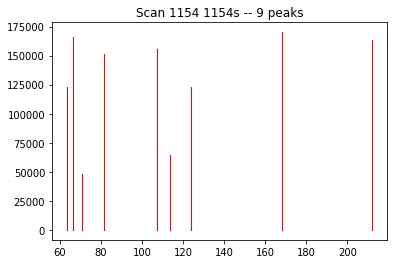

63.553114476743055 122641.83617193514
66.37054401341734 165951.7334977173
70.51375336849857 48147.134911094756
81.67550354095309 151382.08660174932
107.39344568518138 155743.94415375724
113.78700887947596 64460.06733390076
123.90497611730413 122725.71126906453
168.38847194823674 170062.44056264407
211.82153529421808 163523.989793531
Scan 1160 -- num_peaks=16 rt=1160.00 ms_level=1
Scan 1161 -- num_peaks=17 rt=1161.00 ms_level=1
Scan 1162 -- num_peaks=17 rt=1162.00 ms_level=1
Scan 1163 -- num_peaks=19 rt=1163.00 ms_level=1
Scan 1164 -- num_peaks=18 rt=1164.00 ms_level=1
Scan 1165 -- num_peaks=5 rt=1165.00 ms_level=2


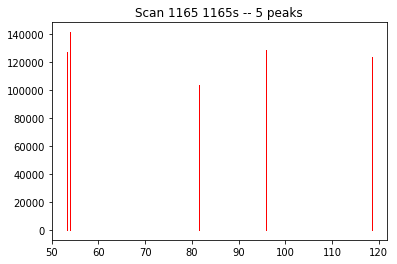

53.31078418106968 127195.29159245933
53.880725189869935 141357.91381367712
81.59144809527953 103544.45182720493
95.91755413722981 128853.67095374592
118.44401755136548 123785.4684478431
Scan 1166 -- num_peaks=10 rt=1166.00 ms_level=2


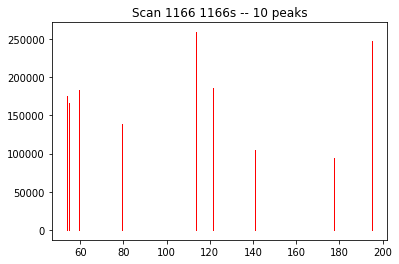

54.00855430908587 175468.52142646338
55.041008762277926 166453.2529523851
59.37915263605174 183417.1385370675
79.57066464039374 139271.9212211921
113.52051178023508 258744.92005145014
121.65457170222862 177856.93211064252
121.68864490011113 185155.63452053766
140.98589195913593 104034.98627201159
177.54863390192622 93798.15896964127
194.8317419723435 247890.36581373806
Scan 1167 -- num_peaks=33 rt=1167.00 ms_level=2


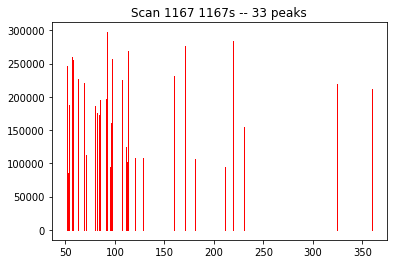

51.886089621622304 246549.6382758938
52.377975690654324 85903.45310701104
53.75852842008421 187310.56773616897
56.92050195395312 260593.79023808602
58.02468853390628 255139.22392250304
62.862721128829236 227331.56170541953
69.35053764038608 221000.77032785458
70.90151328465615 113267.15822895797
71.09592803356578 85365.50793901901
79.58326421795614 186720.89970268856
82.1275289805145 175895.69069989462
83.76408245045236 138341.84478914997
84.1475741482221 173331.281405775
85.01512948422052 195257.71497864072
90.89767721346708 196305.5905644513
91.73949418902595 297102.16510907805
95.4057867481944 94053.87568132888
96.21053205373332 160366.3621362171
97.57505730144523 256526.9197579595
106.84734402662995 224622.37812959813
110.88629648442611 125166.367880782
112.75553959880664 102343.62241247078
113.40108574444386 268168.7962743911
120.30234148607717 108734.01318795855
128.87485592221236 108629.45479611761
160.08307218990873 231957.50446649865
171.15537211228764 277085.73091938585
180.6

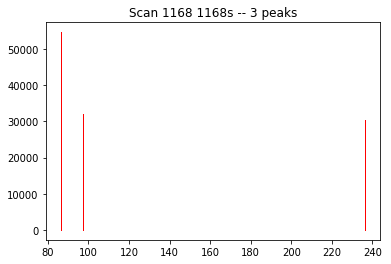

86.43495349422845 54624.58699727664
97.23847889022615 31988.205948844312
236.4006645536469 30246.13822668753
Scan 1169 -- num_peaks=22 rt=1169.00 ms_level=2


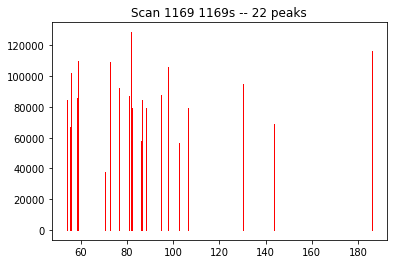

54.047426383655335 84748.24760167304
55.45382527165465 67121.62463599163
55.873040042762284 102050.58086432249
58.428266207089884 85552.01384135701
58.919884162850444 109584.13078721678
70.61682426479474 37677.53069069066
72.73343501204505 109212.67265208536
76.55331847182883 91987.28051751628
80.66737515768682 87169.34230298527
81.5500757703796 128576.87614912473
82.17773947550926 79083.90547009854
85.98197998861987 57766.39725330991
86.31106822577746 84451.0663262349
88.10812416414667 79172.33605759419
94.77546680595084 87986.41220222968
97.62318108045397 106155.16901702785
102.66705899638761 56655.63906681238
106.23470508727907 79044.05854389521
130.1590156661334 75187.98245173154
130.28039560247169 94955.97406916074
143.68117008229925 68743.80671193822
185.93633865479035 116678.54874720967
Scan 1175 -- num_peaks=17 rt=1175.00 ms_level=1
Scan 1176 -- num_peaks=16 rt=1176.00 ms_level=1
Scan 1177 -- num_peaks=17 rt=1177.00 ms_level=1
Scan 1178 -- num_peaks=17 rt=1178.00 ms_level=1
Sca

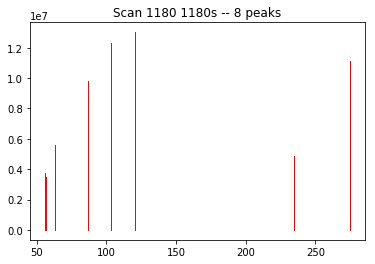

56.308667275554036 3738042.735406042
56.64989821520876 3510681.746018483
63.36178038898391 5571445.5432873415
87.15238144132523 9779194.73249427
103.33375323769202 12332886.121276343
120.58233572610811 13020193.764336413
234.82258597722054 4889272.079666477
274.658133316669 11132351.131341387
Scan 1181 -- num_peaks=13 rt=1181.00 ms_level=2


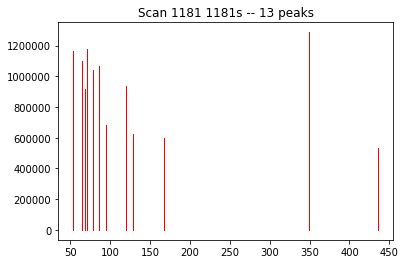

54.05753682529342 1166707.6430158115
64.71856253145774 1101584.7847909622
68.63777544981579 919822.0415140837
70.60708164645933 1177269.0346277992
71.29305818510674 1149219.92752841
78.64981979306357 1044330.1361311179
86.68658704222814 1066145.88752237
95.35417222082499 685050.5869925934
119.62253459193207 936765.9880647402
129.28023613802745 625236.0612861176
167.04105564098813 596178.2666105817
349.3805857364544 1287312.2789988494
435.5212710367293 532002.1081281936
Scan 1182 -- num_peaks=8 rt=1182.00 ms_level=2


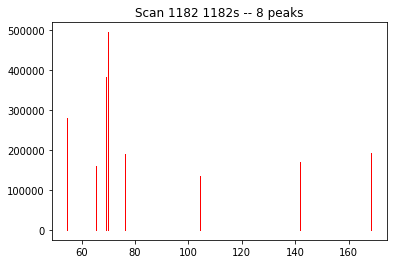

54.495902076133156 278928.21416462545
65.18544945735137 159657.36606195735
69.23138301606488 383212.50230252946
69.7844782382008 493817.0677159732
76.25084126941265 190773.6059088317
104.31890766940548 135011.1327453878
141.62184141152554 170550.6589476962
168.55730747279472 191363.3357270123
Scan 1184 -- num_peaks=3 rt=1184.00 ms_level=2


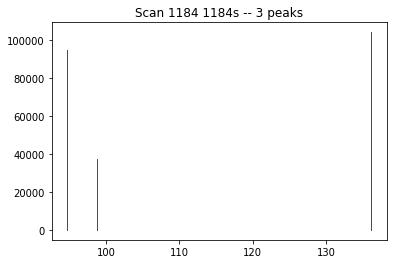

94.69927272078732 94855.60130051196
98.81059736678706 37353.77914566684
136.16647321062067 103942.80894446229
Scan 1188 -- num_peaks=19 rt=1188.00 ms_level=1
Scan 1189 -- num_peaks=18 rt=1189.00 ms_level=1
Scan 1190 -- num_peaks=8 rt=1190.00 ms_level=2


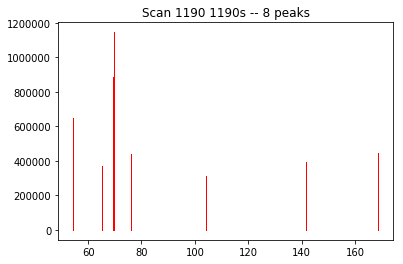

54.495902076133156 646978.2547700474
65.18544945735137 370327.7001407337
69.23138301606488 888867.2545668797
69.7844782382008 1145416.234077984
76.25084126941265 442502.29392082075
104.31890766940548 313160.38536920474
141.62184141152554 395594.85943841125
168.55730747279472 443870.1812451456
Scan 1192 -- num_peaks=36 rt=1192.00 ms_level=2


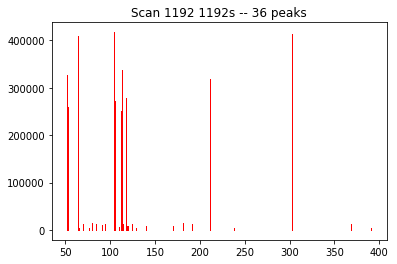

51.98494151154064 11385.776329582488
52.46330591776227 327336.65783530957
53.030654416999774 259094.1880109699
64.44434504850466 410063.06682434847
65.11249504003334 3715.094548162396
70.00918552661592 12962.870202531723
76.80833896595382 3799.795377086571
79.85630616156219 6030.851661426443
80.06609045659523 13996.855689834001
84.0145467760601 12996.242197327841
90.70195970063727 10049.08052982577
94.12426917479625 12497.10692929845
94.40510467889193 6754.585433767028
104.050425475675 417385.2721423073
105.36183214860743 273220.9266048172
109.55820571706421 6041.706445067914
111.86489064198213 250260.38924453827
113.17632604493404 338198.6823181553
113.24843548060205 9066.838024535991
114.71854488039565 12190.852794568564
117.25056367636824 277624.19942645286
117.86767882962248 14120.359856984644
118.51301918602458 5485.258249723137
118.60472528381558 8899.531800002085
119.56188434828042 8263.12269104877
124.30133445846461 13190.83992070766
128.8180415375402 4102.690442539384
140.1773

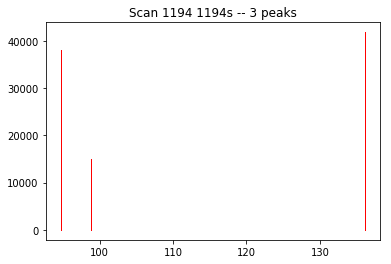

94.69927272078732 38165.79089310741
98.81059736678706 15029.544954591338
136.16647321062067 41822.090173130884
Scan 1198 -- num_peaks=18 rt=1198.00 ms_level=1
Scan 1199 -- num_peaks=17 rt=1199.00 ms_level=1
Scan 1200 -- num_peaks=8 rt=1200.00 ms_level=2


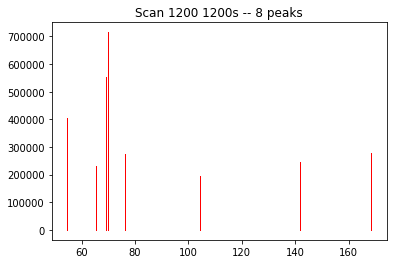

54.495902076133156 404070.86663946806
65.18544945735137 231288.50719975543
69.23138301606488 555142.8648988216
69.7844782382008 715370.7670303512
76.25084126941265 276365.21641378745
104.31890766940548 195584.60795295128
141.62184141152554 247069.1348787473
168.55730747279472 277219.5317057311
Scan 1201 -- num_peaks=1 rt=1201.00 ms_level=2


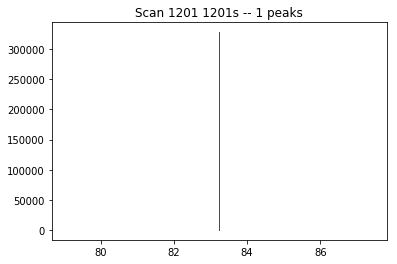

83.24175415025051 328119.9588341057
Scan 1202 -- num_peaks=8 rt=1202.00 ms_level=2


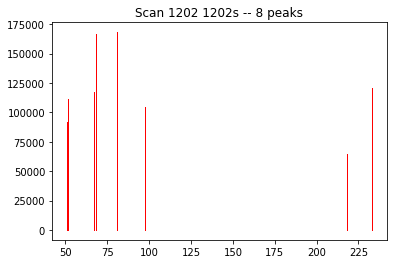

51.10074296907209 91573.704671966
51.66855978939381 111516.76864288493
67.03652955678578 117684.5625186859
68.01949117013253 166333.03477640182
80.73772673035435 168137.2381344631
97.51538107429703 104623.48981258285
217.92534942798437 64188.883923060304
232.86260270732183 120421.52238072241
Scan 1203 -- num_peaks=40 rt=1203.00 ms_level=2


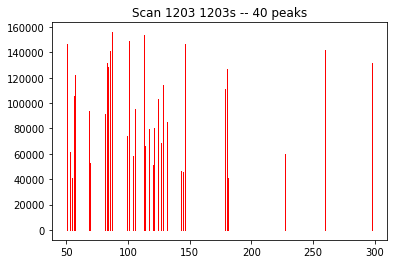

50.765514415195554 146276.1306693164
52.99632101516034 61416.11964954919
55.05750651422175 40712.05395149215
56.161735581363956 105814.40556032327
56.41562537779469 93926.2668549086
56.83927093163374 121754.64664991788
68.17388421925146 64872.45565396681
68.54373528483183 94061.95581076588
69.59504277868493 52819.12180571335
81.21693159841428 91118.8766229669
81.31458745222211 73650.80749121208
81.39222941226998 63827.77572397068
82.78061485728114 131348.79034805764
83.70283770672106 128779.4703083606
83.8463076333791 104279.75459958825
85.50598616693719 141435.41953907508
87.28883594169795 155846.29157867745
99.50793906925921 73937.34571564192
101.19794326755421 149153.72083816546
104.10995452414859 58569.50268138052
105.89603868174324 95190.85620227946
113.26154882756714 153678.05393801926
113.95563422196689 65998.62979762336
116.71585427525312 79509.84300591052
120.73305504595052 51318.487820976916
121.35377999979539 80352.06214912514
121.47115789823586 73957.70325552401
124.4851134

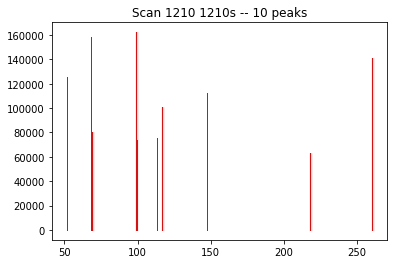

51.82745530779208 125695.62130332264
68.22346352435267 158136.8937893934
68.60581445037504 80716.27266248244
98.7232838037577 162210.296741382
99.28660349857749 73384.88388311195
113.2103284707108 75306.71163877669
116.43751163229865 101222.3009497125
147.30233754863227 112198.69380545424
218.14268428929452 63205.7124859876
260.0524168444706 140824.46676363572
Scan 1211 -- num_peaks=8 rt=1211.00 ms_level=2


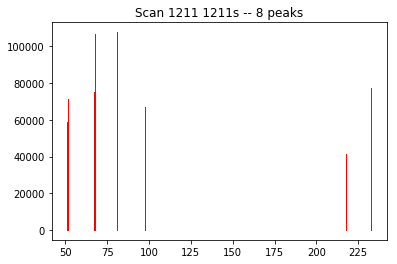

51.10074296907209 58689.59897280231
51.66855978939381 71471.11120860127
67.03652955678578 75424.05108817002
68.01949117013253 106602.86314641924
80.73772673035435 107759.17730810255
97.51538107429703 67053.20792940819
217.92534942798437 41138.663871370576
232.86260270732183 77178.1690119014
Scan 1212 -- num_peaks=6 rt=1212.00 ms_level=2


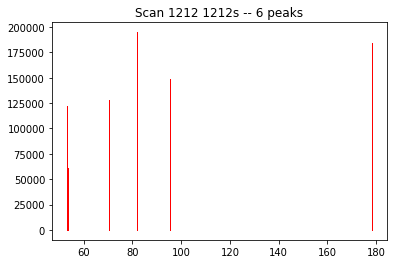

53.276560729125244 122496.64733619447
53.763421486043086 61176.7575975918
70.33408398862953 127637.16109669449
81.83932978331042 194862.60225475958
95.4586294133914 149150.02536574687
178.1687011105346 184656.2506937234
Scan 1213 -- num_peaks=40 rt=1213.00 ms_level=2


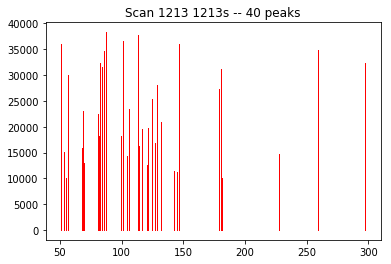

50.765514415195554 35950.36299876409
52.99632101516034 15094.27262858251
55.05750651422175 10005.823310230788
56.161735581363956 26006.063142262363
56.41562537779469 23084.30892382811
56.83927093163374 29923.704734479765
68.17388421925146 15943.73818004296
68.54373528483183 23117.657271201482
69.59504277868493 12981.383862853614
81.21693159841428 22394.33512252726
81.31458745222211 18101.198413888436
81.39222941226998 15686.986633983895
82.78061485728114 32281.66257101953
83.70283770672106 31650.19940840743
83.8463076333791 25628.891153487584
85.50598616693719 34760.65883098193
87.28883594169795 38302.426572457465
99.50793906925921 18171.621066813004
101.19794326755421 36657.58987616671
104.10995452414859 14394.658051304308
105.89603868174324 23395.107725206915
113.26154882756714 37769.537645928074
113.95563422196689 16220.518602652044
116.71585427525312 19541.176711183136
120.73305504595052 12612.572244493838
121.35377999979539 19748.16936121107
121.47115789823586 18176.624350295922
1

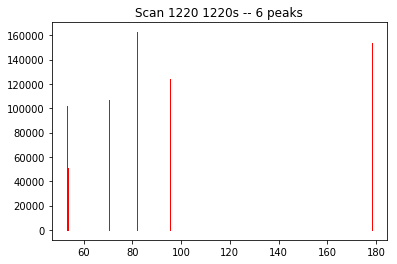

53.276560729125244 102115.70817106533
53.763421486043086 50998.1951468629
70.33408398862953 106400.9454769966
81.83932978331042 162441.44683151605
95.4586294133914 124334.50870010366
178.1687011105346 153933.22362571966
Scan 1221 -- num_peaks=9 rt=1221.00 ms_level=2


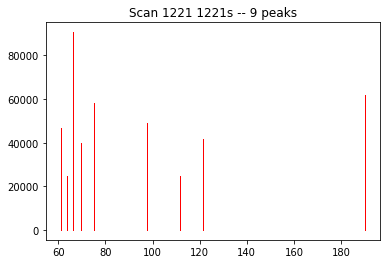

61.07892920047031 46919.41548501993
63.59556388505795 24939.60036271793
66.15974992139333 90660.17773997872
69.68889628552245 39854.00318748812
75.22566729522364 58072.8457974192
97.71364044993645 48841.47041295252
111.72815035743712 24707.24461054604
121.29836012032675 41847.27944172157
190.25055041082763 61806.04626291861
Scan 1222 -- num_peaks=17 rt=1222.00 ms_level=2


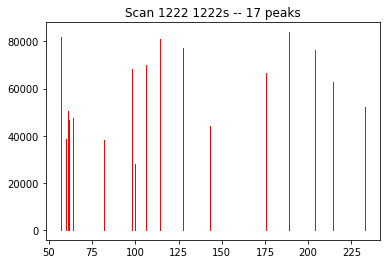

56.912861971153 81822.19511146496
59.660576463575 38396.25085314262
60.89123888826824 50531.20825652348
61.56819814042396 46555.02088131211
63.97362427598133 47483.45622988805
81.96524786925157 38216.22232147708
98.21304997718747 68330.89730941084
99.72231538338781 28157.41785928423
106.0804868595466 69949.4092371695
114.58122932913543 81018.31432121742
127.71886496500873 77052.21706931238
143.27120252643573 44076.966484689976
175.65909576480314 66552.50481603024
189.03183126877173 83888.29606676601
204.1029856710161 76518.77977928222
214.657185694005 62763.31134662448
232.96930074034503 51971.19461631423
Scan 1223 -- num_peaks=4 rt=1223.00 ms_level=2


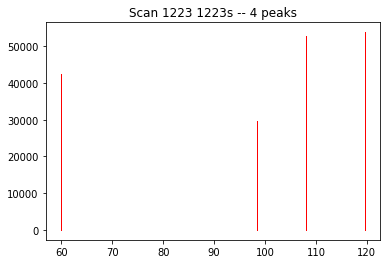

59.902320196864785 42484.741235932765
98.52460722430186 29767.673292817737
108.0119499814306 52771.63801570971
119.66899957025407 53795.96317962735
Scan 1225 -- num_peaks=19 rt=1225.00 ms_level=1
Scan 1226 -- num_peaks=18 rt=1226.00 ms_level=1
Scan 1227 -- num_peaks=19 rt=1227.00 ms_level=1
Scan 1228 -- num_peaks=19 rt=1228.00 ms_level=1
Scan 1229 -- num_peaks=19 rt=1229.00 ms_level=1
Scan 1230 -- num_peaks=6 rt=1230.00 ms_level=2


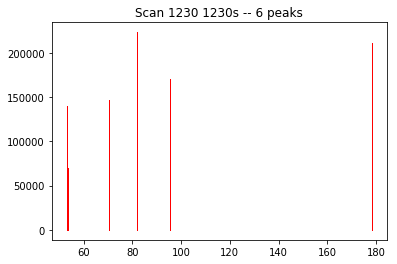

53.276560729125244 140363.97669340525
53.763421486043086 70099.98366762848
70.33408398862953 146254.28446395724
81.83932978331042 223285.21111468558
95.4586294133914 170905.00956161827
178.1687011105346 211590.16374978775
Scan 1231 -- num_peaks=1 rt=1231.00 ms_level=2


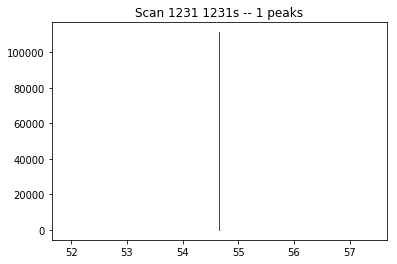

54.658623894186725 111254.938959115
Scan 1232 -- num_peaks=17 rt=1232.00 ms_level=2


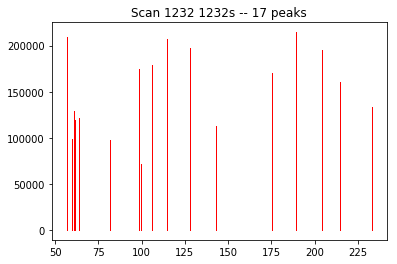

56.912861971153 209249.45778732587
59.660576463575 98193.3405861469
60.89123888826824 129226.89148844898
61.56819814042396 119058.31740912552
63.97362427598133 121432.66819518601
81.96524786925157 97732.94139267689
98.21304997718747 174747.24544651326
99.72231538338781 72008.87744113836
106.0804868595466 178886.37594581663
114.58122932913543 207193.63883434137
127.71886496500873 197050.86891277708
143.27120252643573 112721.02056498324
175.65909576480314 170199.24151596607
189.03183126877173 214533.23811174353
204.1029856710161 195686.673494281
214.657185694005 160508.87965456286
232.96930074034503 132909.46642544353
Scan 1233 -- num_peaks=8 rt=1233.00 ms_level=2


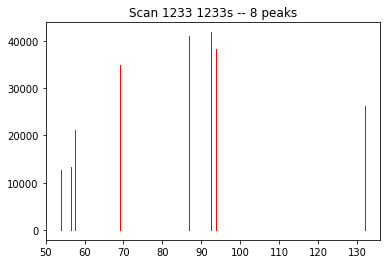

53.8983867747651 12671.481503671608
56.615007201791826 13326.25534445259
57.634090341649866 21231.208232830613
69.04098074630735 34911.55661226769
86.85985209673643 41123.147863237704
92.50896338300687 41861.25836101059
93.81028240943422 38278.58098068515
132.1138488102806 26142.876677427714
Scan 1234 -- num_peaks=9 rt=1234.00 ms_level=2


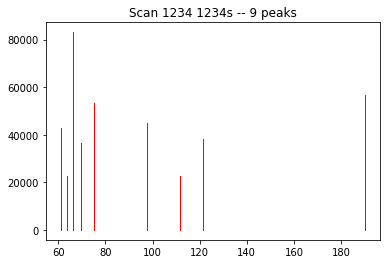

61.07892920047031 42983.51785266836
63.59556388505795 22847.50878389689
66.15974992139333 83055.02803325912
69.68889628552245 36510.79707198466
75.22566729522364 53201.32781461408
97.71364044993645 44744.33864411614
111.72815035743712 22634.644503333988
121.29836012032675 38336.86469395873
190.25055041082763 56621.36378900971
Scan 1240 -- num_peaks=18 rt=1240.00 ms_level=1
Scan 1241 -- num_peaks=19 rt=1241.00 ms_level=1
Scan 1242 -- num_peaks=19 rt=1242.00 ms_level=1
Scan 1243 -- num_peaks=18 rt=1243.00 ms_level=1
Scan 1244 -- num_peaks=17 rt=1244.00 ms_level=1
Scan 1245 -- num_peaks=14 rt=1245.00 ms_level=2


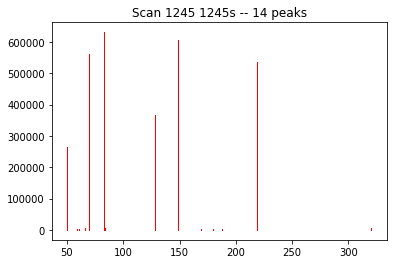

50.07957834425579 266104.1097593867
59.13932037449488 2579.3715218656594
61.03012275976252 2899.1968034831016
66.45622195417218 6486.226206610662
69.2473643626975 562349.4240996579
82.96272312818323 630630.5092061848
83.70685243587498 6503.66558133331
128.22682346101743 366685.5439337078
148.65347236363843 604678.4349536898
168.82286021855816 2421.6606587933525
179.4616502833295 4369.853407658718
188.19123681931262 1853.873220288552
218.82059370872855 537106.8125006194
320.48657149234725 5497.75667667262
Scan 1246 -- num_peaks=8 rt=1246.00 ms_level=2


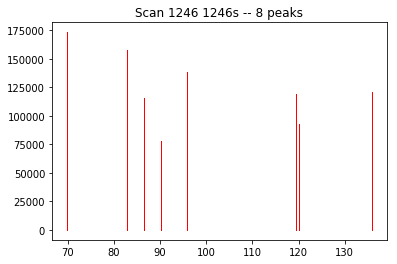

69.90313971717801 173271.1956159738
82.78269648545621 157966.17311103616
86.4535780082428 115921.18087731667
90.2957300806147 77912.06333748136
95.8856965849809 138499.59653115078
119.47144044806923 118811.4202195796
120.2005373135264 92901.62329426195
135.8387558495221 120668.00111400172
Scan 1247 -- num_peaks=9 rt=1247.00 ms_level=2


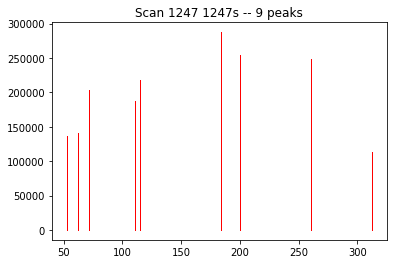

53.0722778746189 136987.86246442367
62.297444199863094 141540.0778505131
71.61588729411149 202813.75672306522
110.8435832784386 187185.29422297486
114.95688536875711 218224.44051778747
184.2383830057514 287338.126384773
200.40626367210595 254405.58872970231
260.7185404990229 248226.1329107402
311.97148219549683 113180.68042875732
Scan 1248 -- num_peaks=5 rt=1248.00 ms_level=2


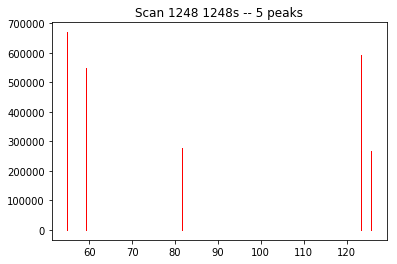

54.817916487659225 670277.1849103905
59.306745339540036 548847.2425295028
81.6782389402029 278852.8627121145
123.3740807614106 594207.2188510341
125.78961208182075 266595.15816239116
Scan 1250 -- num_peaks=12 rt=1250.00 ms_level=1
Scan 1251 -- num_peaks=12 rt=1251.00 ms_level=1
Scan 1252 -- num_peaks=14 rt=1252.00 ms_level=1
Scan 1253 -- num_peaks=16 rt=1253.00 ms_level=1
Scan 1254 -- num_peaks=16 rt=1254.00 ms_level=1
Scan 1255 -- num_peaks=37 rt=1255.00 ms_level=2


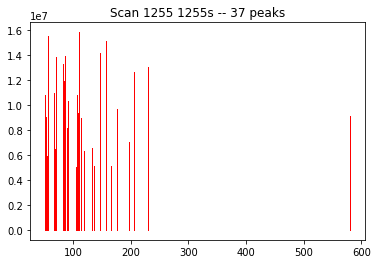

52.19476231981997 10772288.216229986
52.96207406849851 6458331.860148353
52.98022161235777 4678653.047492303
53.24875926355206 9034851.082599888
54.47594261896873 5916564.457264442
57.11837448161054 15544933.248032365
57.50203793597956 10561740.193025317
67.34644363603702 11001475.669918155
69.61292003853 6445196.051016805
70.81350608110752 13877692.853436435
82.71210386909581 5863126.773981597
82.7683317088419 13259125.314445904
83.86732103077497 9048598.904775571
84.26524740729674 11959985.905776046
84.30187969404696 6383120.998161117
85.09767161197009 8178031.079538333
85.34942079429617 13969697.52631668
89.48679172162866 8147317.546163742
90.62491011490874 4477803.821185257
92.18874562821601 10339977.762121115
106.07365707981127 5034830.091641429
107.34632949502257 10826565.80462035
108.99810659296564 9391397.684607657
111.12029468202961 15840802.365849443
114.62877770102025 8958516.251371438
119.07342192493464 6323112.0875326935
132.15951392349643 6580544.718057985
136.13767126286

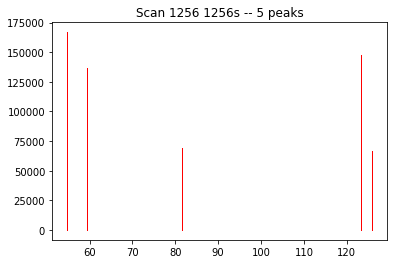

54.817916487659225 166838.0717935684
59.306745339540036 136613.057574205
81.6782389402029 69409.00716354465
123.3740807614106 147903.5671670355
125.78961208182075 66357.95330443933
Scan 1257 -- num_peaks=28 rt=1257.00 ms_level=2


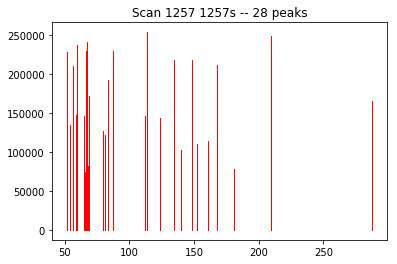

51.881136139586786 228280.64259742445
53.82987127938395 134889.78686453652
56.39055547825124 210548.57883881018
58.77119292100551 147539.2429423357
59.2006533664526 238280.5047784271
64.98371714943733 146065.8166162984
65.32119118171377 74908.89164717727
66.68125721332684 157748.2376463111
66.8252011190993 229553.75461166963
67.51808736310426 241585.1377662967
67.94879300366965 82202.9928705244
68.83331643283952 172634.259213874
79.34319579922787 126796.10452784158
81.43483035960489 121922.60597213138
83.4782344796298 192711.4500695365
87.58950702124372 229834.01601701393
112.04132299561691 146003.87200944131
114.014577354693 254034.72822272705
123.8881160408845 144104.81845497608
134.448143635097 218499.46613578408
140.27723711827042 103046.8509009633
148.64693379455903 217944.5375248182
152.19585447529496 110882.23464958376
161.0306631487038 113800.77546488024
167.62720409941076 211573.8376993565
181.12801384906425 77916.25298745582
209.892168977214 249210.52655654796
287.33946358425

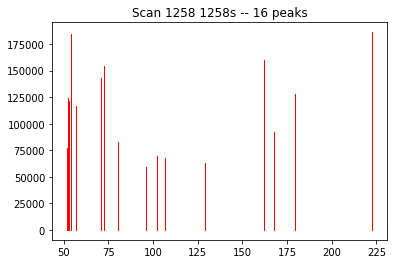

52.08861259074112 76872.23809677536
52.67739599533312 124451.80436774904
52.82540027931004 121197.70548582348
54.26577004015597 184774.7217478815
57.11317004269723 116499.0081987036
70.98986046884393 142984.42940698584
72.51984796286332 154464.24459490553
80.4072336104322 82407.86030374878
96.05573242827283 59630.0444417534
102.28643050546714 69833.7199907807
106.52004693837853 67760.96842781539
129.30843701434245 62565.21105136556
162.014288651698 159985.33082099058
167.94584566978585 92332.85139803331
179.2157332032095 127530.05495182879
222.32560405950932 186123.56858881714
Scan 1259 -- num_peaks=29 rt=1259.00 ms_level=2


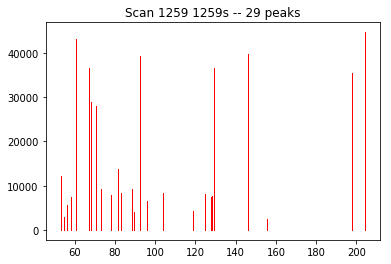

52.99254740355456 12172.570133490117
54.371757696098655 2939.9298895577717
56.11330154442901 5569.3124310581625
57.86184379027734 7371.616085960963
60.33507429076308 43244.27475951354
66.93457993448853 36650.71987304656
67.82223010018369 28823.06723104039
70.4000404098217 28115.787370491427
70.69925952929826 25445.25332102748
73.13286554775551 9269.310074254096
77.91169966768327 7885.120655743979
81.45761430501503 13795.204642292789
83.02079972818161 8368.769116213025
88.27617359656742 9174.487997993036
89.63606859505792 4033.6161029112905
92.40263424718069 39265.72016976227
95.99508423615406 6497.370228887245
103.87403856984437 8306.871634598441
118.99172449520371 4314.905664026434
124.96457107616808 8206.331139713711
127.94793806685645 7488.820950737011
128.03705174852595 7770.805198763677
129.17048310759932 36507.05400733563
129.40720080132502 22311.700477896236
146.24340590066893 39871.38047579958
155.65965908670512 2552.3154342733756
198.00641874114382 35411.90855581438
204.121235

In [44]:
mass_spec = IndependentMassSpectrometer(sampled_chemicals, initial_scan_parameters)
controller = TopNController(sampled_chemicals, mass_spec, plot_peaks=25)
controller.run(max_rt)